# Costa Rican Household Poverty Level Prediction

Welcome to another Kaggle challenge! The objective of the Costa Rican Household Poverty Level Prediction contest is to develop a machine learning model that can predict the poverty level of households using both individual and household characteristics. This "data science for good" project offers the opportunity to put our skills towards a task more beneficial to society than getting people to click on ads!

In this notebook, we will walk through a complete machine learning solution: first, get introduced to the problem, then perform a thorough Exploratory Data Analysis of the dataset, work on feature engineering, try out multiple machine learning models, select a model, work to optimize the model, and finally, inspect the outputs of the model and draw conclusions. __While this notebook may not get us to the top of the leaderboard, it is meant to be used as a teaching tool to give you a solid foundation to build on for future machine learning projects. Kaggle projects can teach us a lot about machine learning, but several of the strategies used to get to the very top of the leaderboard are not best practices, so here we'll stick to building a very good - although not quite first place - machine learning solution. While Kaggle projects are competitions, I think they are best described as "a machine learning education" disguised as a contest!"

If you are looking to follow-up on this work, I have additional work including a kernel on using Automated Feature Engineering with Featuretools for this problem (with slightly higher leaderboard score). (If you enjoy my writing style and explanations, I write for Towards Data Science)

# Problem and Data Explanation

The data for this competition is provided in two files: train.csv and test.csv. The training set has 9557 rows and 143 columns while the testing set has 23856 rows and 142 columns. Each row represents one individual and each column is a feature, either unique to the individual, or for the household of the individual. The training set has one additional column, Target, which represents the poverty level on a 1-4 scale and is the label for the competition. A value of 1 is the most extreme poverty.

This is a supervised multi-class classification machine learning problem:

Supervised: provided with the labels for the training data
Multi-class classification: Labels are discrete values with 4 classes

# Objective
The objective is to predict poverty on a household level. We are given data on the individual level with each individual having unique features but also information about their household. In order to create a dataset for the task, we'll have to perform some aggregations of the individual data for each household. Moreover, we have to make a prediction for every individual in the test set, but "ONLY the heads of household are used in scoring" which means we want to predict poverty on a household basis.

## Important note: 

while all members of a household should have the same label in the training data, there are errors where individuals in same household have different labels. In these cases, we are told to use the label for the head of each household, which can be identified by the row where parentesco1 == 1.0.
we will cover how to correct this in notebook.

The Target values represent poverty levels as follow:

1 - extremely poverty
2 - moderate poverty
3 - vulnerable household
4 - not vulnerable household

# Explanation of columns

### Id: 

A unique identifier for each individual, this should not be a feature that we use!

### idhoger:

A unique identifier for each household. This variable is not a feature, but it will be used to group individuals by household as individuas in a household will have the same identifer.

### parentesco1: 

Indicates if this person is the head of household.

When we make a model, we'll train on a household basis with the label for each household the poverty level of the head of household. The raw data contains a mix of both household a individual charecteristics and for the individual data, we will have to find a way to aggregate this for each household. some of the individuals belongs to a household with no head of household which means that unfortunately we can't use this data for training. These issues with the data are completely typical of real-world data and hence this problem is great preperation for the datasets you will encounter in a data science job! 



# Metric


Ultimately we want to build a machine learning model that can predict the integer poverty level of a household. Our predictions will be assessed by the Macro F1 Score. You may be familiar with the standard F1 Score for binary classification problems which is the harmonic mean of precision and recall.

F1 = 2 / ((1/recall + 1/precision) * ((precision*recall) / (precision + recall) )) = 2

For multiclass problems, we have to average the F1 score for each class. the macro F1 score averages the F1 score for each class without taking into account label imbalances.

Macro F1 = (F1 Class 1 + F1 Class 2 + F1 Class 3 + F1 Class 4) / 4

In other words, the number of occurences of each label does not figure into the calculation when using macro ( while it does when using the "weighted" score).

If we want to assess our performance, we can use the code

from sklearn.metrics import f1_score

f1_score(y_true, y_pred, average = 'macro

For this problem, the labels are imbalanced, which makes it a little  strange to use macro averaging for the evalution metric, but that's a decision made by the organizers and not something we can change!

In your own work, you want to be aware of label imbalances and choose a metric accordungly.

# Roadmap

The end objective is a machine learning model that can predict the povery level of a household. However, before we get carried away with modelling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as best and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:

1. Underatand the problem (we're almost there already)

2. Exploratory data analysis

3. Feature Engineering to create a dataset for machine learning.

4. Compare several baseline machine learning models

5. Try more complex machine learning models

6. Optimize selected models

7. Investigate model predictions in context of problem

8. Draw conclusions and lay out next steps

The steps laid out are iterative meaning that while we will go through them one at time, we mighlt go back to an earlier step and revisit some of our decisions. In general, data science is a non-linear practice where we are constantly evaluating out past decisions and making improvments, In particulat, feature engineering, modelling and optimization are steps that we often repaeat becuase we never know if we got them right the first time!


# Getting started

We have a pretty good grasp of the problem, so we'll move into the exploratory data analysis (EDA) and feature engineering. For the EDA we'll examine any interesting anomilies, trends, correlation, or patterns that can be used for feature engineering and for modelling. We'll make sure to investigate our data both quantitavily (with statistics) and visually (with figures).

Once we have a good grasp of the data and any potentially useful relationships, we can do some feature engineering (the most important part of machine learning pipeline) and establish a baseline model. This won't get us to the yop of the leaderboard, but it will provide a strong foundation to build on!

With all that info in mind (don't worry if you haven't got all the details), let's get started!

#### Imports

We'll use a familiar stack of data science libraries: Pandas, numpy, matplotlib, seaborm, and eventually sklearn for modelling.

In [1]:
# Data manipulation

import pandas as pd
import numpy as np

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

## Read in Data and Look at Summary Information


In [2]:
pd.options.display.max_columns = 150

# Read in Data

train = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Costa Rican Household Poverty Level Prediction\\train.csv')
test = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Costa Rican Household Poverty Level Prediction\\test.csv')

train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [3]:
test.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     1     1     2     0     1     1     1     2     3       3       3   
1     1     1     2     0     1     1     1     2     3       3       3   
2     1     1     2     0     1     1     1     2     3       3       3   
3     0     1     1     0     0     0     0     1     1       1       1   
4     0     0     0     0     1     1     0     1     1       1       1   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0         0      NaN       3            1            0          0         0   
1        16      NaN       3            1            0          0         0   
2        17      NaN       3            1            0          0         0   
3        16      NaN       1            1            0          0         0   
4        11      NaN       1            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         0          0            0           0           1            0   
2         0          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          1               0   
1          0          0            0           0          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              0   
2           0           0           0              0              0   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              1              0          1          0          0          0   
2              1              0          1          0          0          0   
3              0              0          1          0

That gives us a look at all of the columns which don't appear to be in any order to get a quick overview of the data we use df.info()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


This tells us there are 130 integers column, 8 float (numeric) columns and 5 object columns. The integer columns probably repsents Boolean variable (that take on either 0 or 1) or ordinal variables with discrete ordered values. The object columns might pose an issue becuase they cannot be fed directly into a machine learning model.

Let's glance at the test data which has many more rows (individuals) than the train. It does have one fewer column Target.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Integer columns

Let's look at the distribution of unique values in the integer columns. For each column, we'll count the number of unique values and show the result in a bar plot.

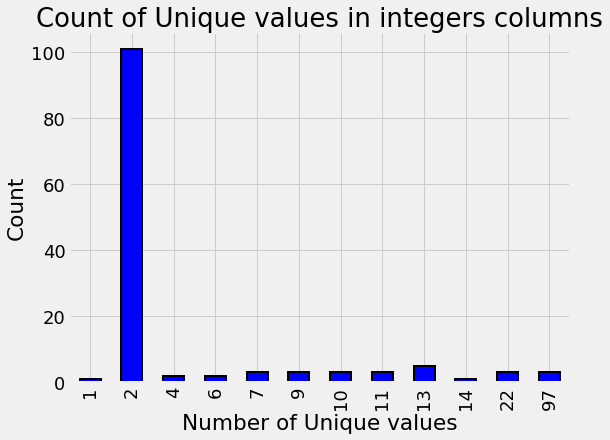

In [6]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue', figsize=(8,6), edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique values')
plt.ylabel('Count')
plt.title('Count of Unique values in integers columns')
plt.show()

In [7]:
# train.select_dtypes(np.int64).nunique()
# train.select_dtypes(np.int64).nunique().value_counts()

The columns with only 2 unique values represents Boolean (0 or 1). In a lot of cases, this boolean information is already on a household level. When it comes time to make features from the Boolean columns that are on the household level, we will not need to aggregate these. However, the Boolean columns that are on the individual level will need to be aggregated.

### Float Columns

Another column type is floats which can represent continuous variables. We can make a quick distrubution plot to show the distribution of all float columns. We'll use an OrderedDict to map the poverty levels to colors because this keeps the keys and values in the same order as we specify (unlike a regular python dict).

The following graphs shows the distributions of the float columns colored by the value of the Target. With these plots, we can see if there is a significant difference in the variable distribution depending on the household poverty.

In [8]:
from collections import OrderedDict

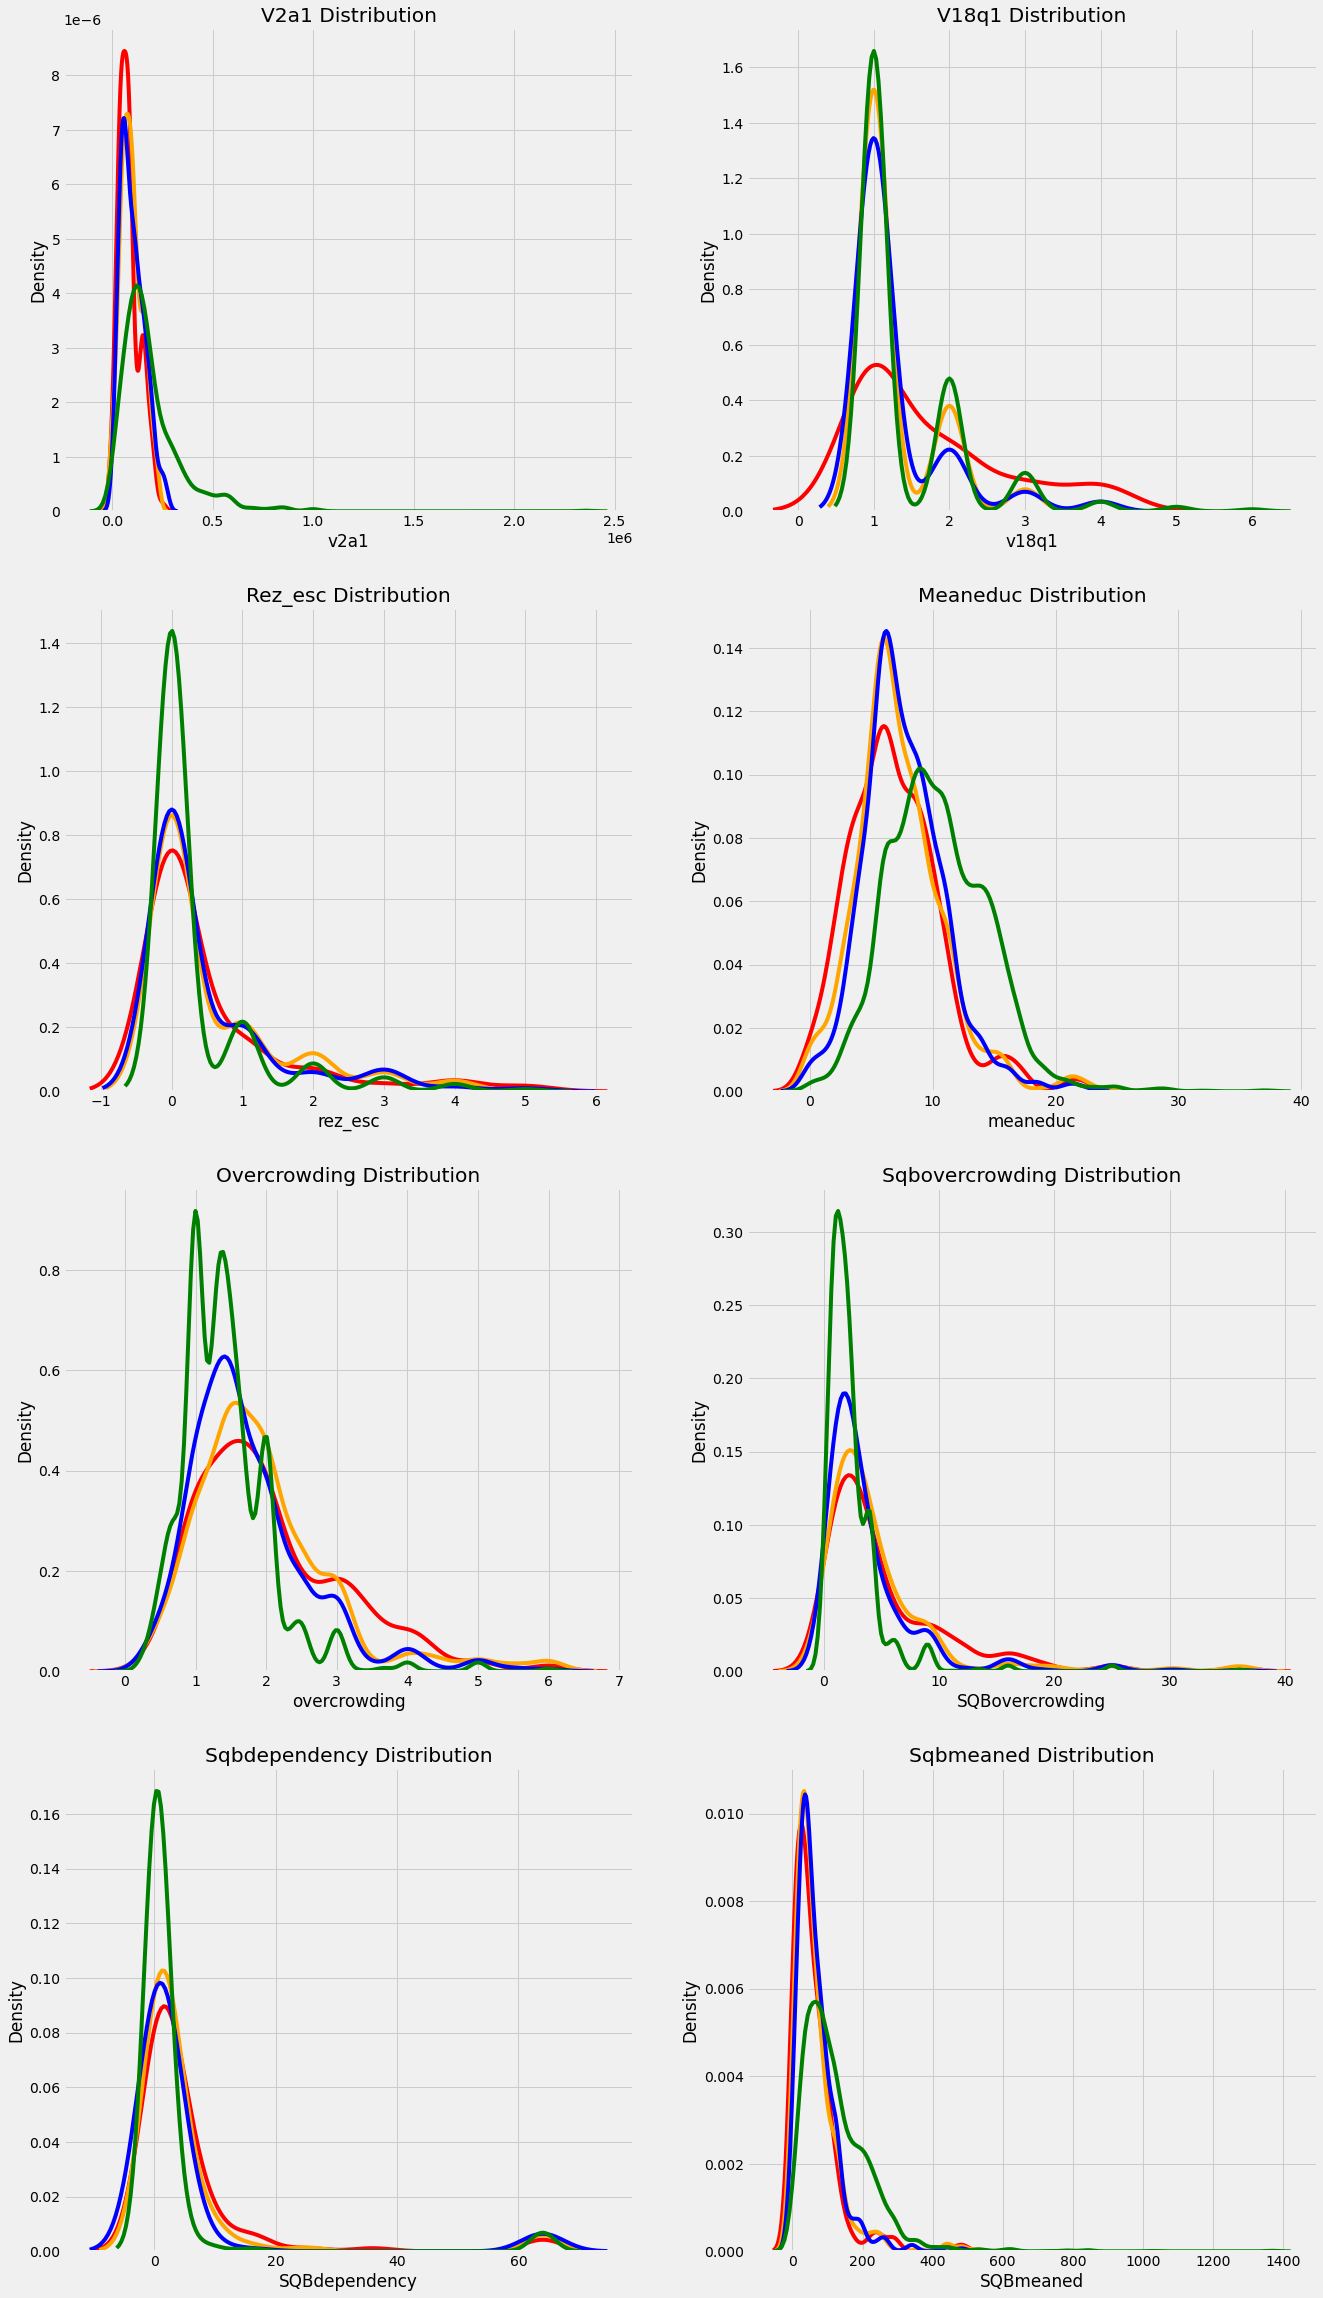

In [9]:
plt.figure(figsize=(20,16))
plt.style.use('fivethirtyeight')

# Color mapping

colors = OrderedDict({1:'red', 2:'orange', 3:'blue', 4:'green'})

poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

# Iterate through the float columns

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    
    #Iterate through the poverty levels
    for poverty_level, color in colors.items():
        
        #Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax, color = color, label = poverty_mapping[poverty_level])
        plt.title(f'{col.capitalize()} Distribution')
        plt.xlabel(f'{col}')
        plt.ylabel('Density')
        plt.subplots_adjust(top=2)

Later on we'll calculate correlation between the variables and the Target to gauge the relationships between the features, but these plots can already give us a sense of which variables may be most "relevant" to a model. For example, the meaneduc, represnting the average edication of the adults in the household appears to be related to the poverty level: a higher average adult education leads to higher values of the target which are less severe levels of poverty. The theme of the importance of education is one we will come back to again and again in this notebook!

In [10]:
# train[['meaneduc','Target']] # Higer value indicate lower poverty

### Object Columns

The last column type is object which we can view as follows

In [11]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

The Id and idhoger object types make sense because these are identifying variables. However, the other columns seem to be a mix of strings and numbers which we will need to be addressed before doing any machine learning. According to the documentation for these columns:

dependency: Dependency rate, calculated = (number of members of the household younger thsn 19 or older than 64) / (number of member of household between 19 and 64)

edjefe: years of education of male head of household, based on interaction of escolari (years of education), head of household and gender, yes=1, no=0

edjefa: years of education of female head of household, based on interaction of escolari (years of education), head of household and gender, yes = 1 and no=0

These explantion clear up the issue. For these three variables, "yes"=1 and "no"=0. We can correct the variables using a mapping and convert to floats.

In [12]:
mapping = {"yes":1, "no":0}

In [13]:
# Apply same operation to both train and test

for df in [train, test]:
    # Fill in the values with correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

In [14]:
train.select_dtypes('float64')

v2a1  v18q1  rez_esc  dependency  edjefe  edjefa  meaneduc  \
0     190000.0    NaN      NaN        0.00    10.0     0.0     10.00   
1     135000.0    1.0      NaN        8.00    12.0     0.0     12.00   
2          NaN    NaN      NaN        8.00     0.0    11.0     11.00   
3     180000.0    1.0      1.0        1.00    11.0     0.0     11.00   
4     180000.0    1.0      NaN        1.00    11.0     0.0     11.00   
...        ...    ...      ...         ...     ...     ...       ...   
9552   80000.0    NaN      NaN        0.25     9.0     0.0      8.25   
9553   80000.0    NaN      NaN        0.25     9.0     0.0      8.25   
9554   80000.0    NaN      NaN        0.25     9.0     0.0      8.25   
9555   80000.0    NaN      NaN        0.25     9.0     0.0      8.25   
9556   80000.0    NaN      NaN        0.25     9.0     0.0      8.25   

      overcrowding  SQBovercrowding  SQBdependency  SQBmeaned  
0         1.000000         1.000000         0.0000   100.0000  
1         1.000000         1.000000        64.0000   144.0000  
2         0.500000         0.250000        64.0000   121.0000  
3         1.333333         1.777778         1.0000   121.0000  
4         1.333333         1.777778         1.0000   121.0000  
...            ...              ...            ...        ...  
9552      1.250000         1.562500         0.0625    68.0625  
9553      1.250000         1.562500         0.0625    68.0625  
9554      1.250000         1.562500         0.0625    68.0625  
9555      1.250000         1.562500         0.0625    68.0625  
9556      1.250000         1.562500         0.0625    68.0625  

[9557 rows x 11 columns]

In [15]:
train[['dependency', 'edjefa', 'edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

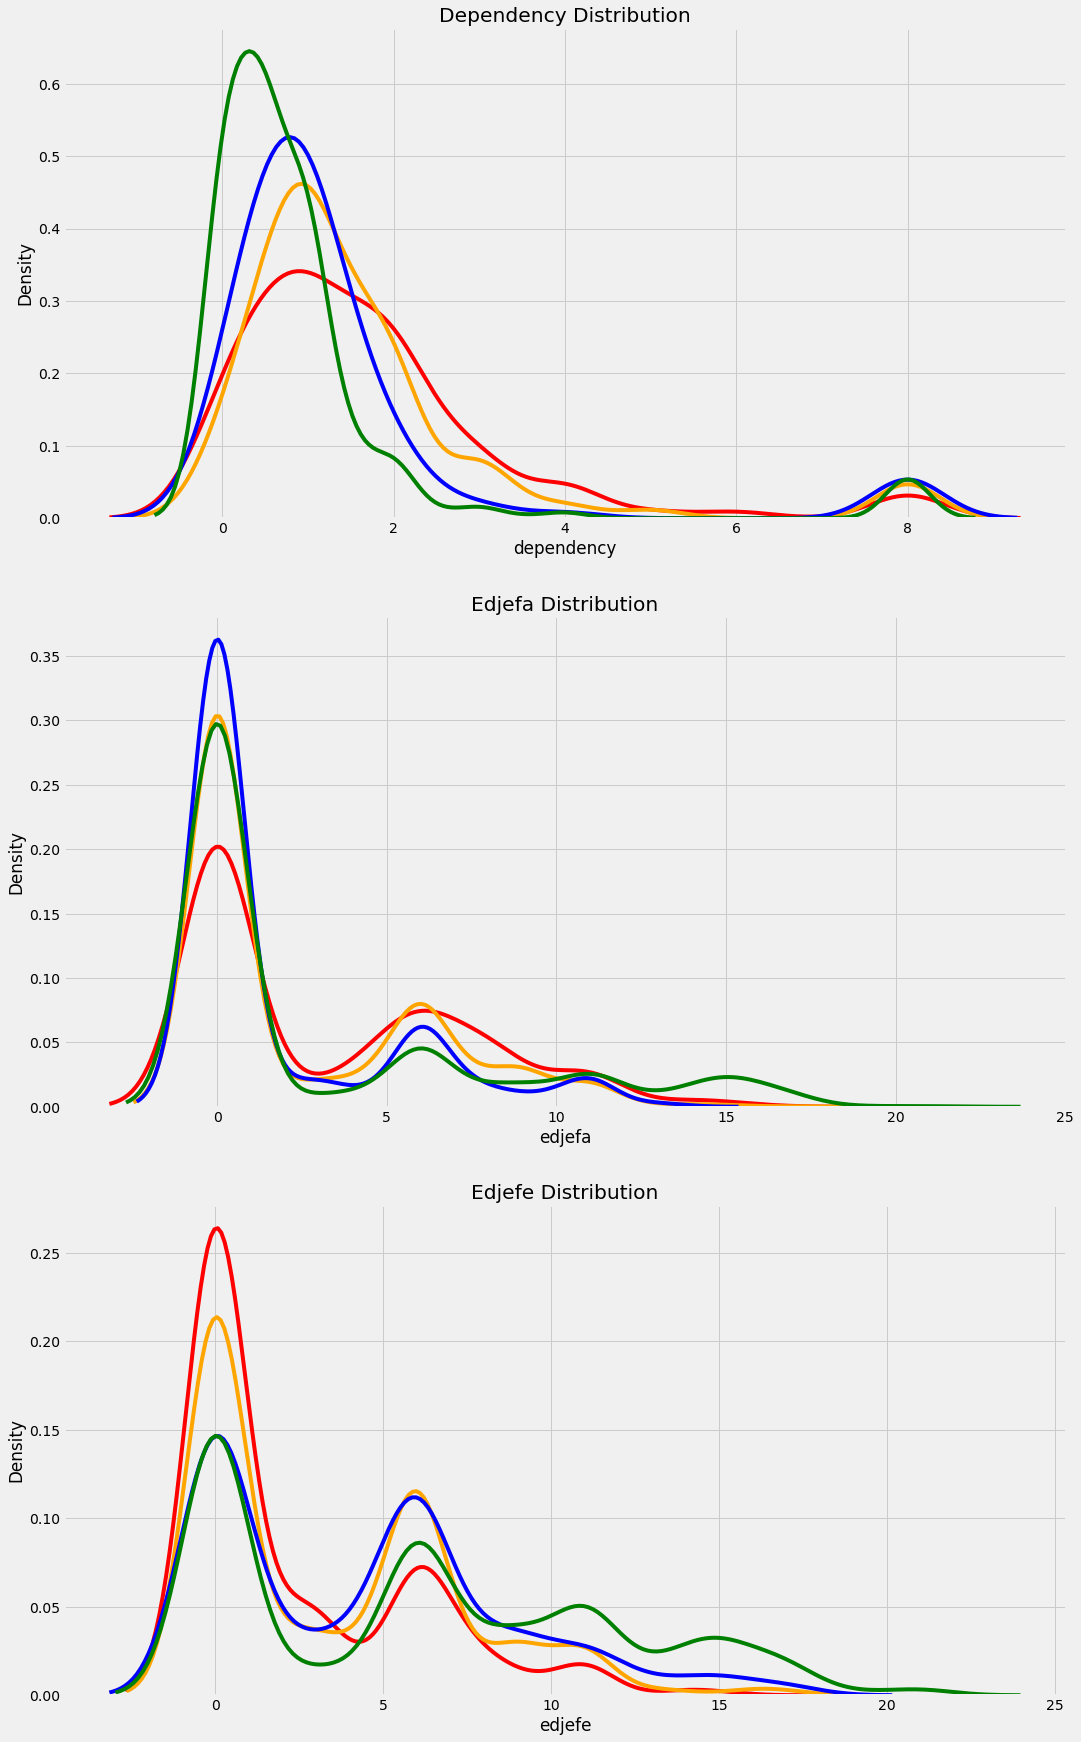

In [16]:
plt.figure(figsize=(16,12))

# Iterate through the float columns

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    # Iterate thrugh the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax=ax, color=color, label=poverty_mapping[poverty_level])
        plt.title(f'{col.capitalize()} Distribution')
        plt.xlabel(f'{col}')
        plt.ylabel('Density')
        plt.subplots_adjust(top=2)

These variables are now correctly represented as numbers and can be fed into a machine learning model.

To make operations like that above a little easier, we'll join together the training and testing dataframes. This is important once we start feature engineering becuase we want to apply the same operations to both dataframes so we end up with the same features. Later we can separate out thr sets based on target.

In [17]:
# Add null Target to test

test['Target'] = np.nan
data = train.append(test, ignore_index=True)

In [18]:
data

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0      ID_279628684  190000.0       0      3       0     1       1     0   
1      ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2      ID_68de51c94       NaN       0      8       0     1       1     0   
3      ID_d671db89c  180000.0       0      5       0     1       1     1   
4      ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...             ...       ...     ...    ...     ...   ...     ...   ...   
33408  ID_a065a7cad       NaN       1      2       1     1       1     0   
33409  ID_1a7c6953b       NaN       0      3       0     1       1     0   
33410  ID_07dbb4be2       NaN       0      3       0     1       1     0   
33411  ID_34d2ed046       NaN       0      3       0     1       1     0   
33412  ID_34754556f       NaN       0      3       0     1       1     0   

       v18q1  r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  \
0        NaN     0     1     1     0     0     0     0     1     1       1   
1        1.0     0     1     1     0     0     0     0     1     1       1   
2        NaN     0     0     0     0     1     1     0     1     1       1   
3        1.0     0     2     2     1     1     2     1     3     4       4   
4        1.0     0     2     2     1     1     2     1     3     4       4   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...     ...   
33408    NaN     0     2     2     1     3     4     1     5     6       6   
33409    NaN     0     1     1     0     3     3     0     4     4       4   
33410    NaN     0     1     1     0     3     3     0     4     4       4   
33411    NaN     0     1     1     0     3     3     0     4     4       4   
33412    NaN     0     1     1     0     3     3     0     4     4       4   

       tamviv  escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  \
0           1        10      NaN       1            1            0          0   
1           1        12      NaN       1            0            0          0   
2           1        11      NaN       1            0            0          0   
3           4         9      1.0       4            1            0          0   
4           4        11      NaN       4            1            0          0   
...       ...       ...      ...     ...          ...          ...        ...   
33408       6         3      0.0       6            0            0          0   
33409       4         6      NaN       4            0            0          1   
33410       4         4      1.0       4            0            0          1   
33411       4         5      0.0       4            0            0          1   
33412       4         6      NaN       4            0            0          1   

       pareddes  paredmad  paredzinc  paredfibras  paredother  pisomoscer  \
0             0         0          0            0           0           1   
1             0         1          0            0           0           0   
2             0         1          0            0           0           1   
3             0         0          0            0           0           1   
4             0         0          0            0           0           1   
...         ...       ...        ...          ...         ...         ...   
33408         0         1          0            0           0           0   
33409         0         0          0            0           0           0   
33410         0         0          0            0           0           0   
33411         0         0          0            0           0           0   
33412         0         0          0            0           0           0   

       pisocemento  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  \
0                0          0          0            0           0          0   
1                0          0          0            0           1          1   
2                0          0

## Exploring label distribution

Next, we can get an idea of how imbalanced the problem is by looking at the distribution of labels. There are 4 possible integer levels indicating 4 different level of poverty. To look at the correct labels, we'll subset only to the columns where parentesco1 == 1 because this is the head of household, the correct label for each household.

The bar plot below showsthe distribution of training labels (since there are no testing labels)

In [19]:
# Heads of household

heads = data.loc[data['parentesco1'] == 1].copy()

In [20]:
# Labels for training

In [21]:
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]


In [22]:
# Value counts of target

label_counts = train_labels['Target'].value_counts().sort_index()

In [23]:
label_counts

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

Text(0.5, 1.0, 'Poverty Level Breakdown')

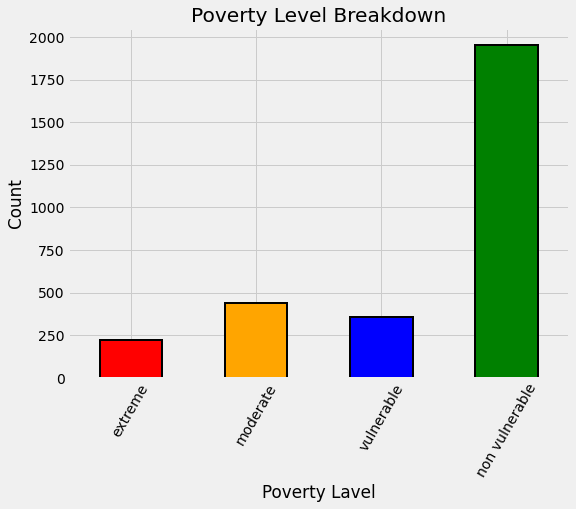

In [24]:
# Bar plot of occurences of each labels

label_counts.plot.bar(figsize=(8,6), color=colors.values(), edgecolor='k', linewidth=2)

# Formatting

plt.xlabel('Poverty Lavel')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()], list(poverty_mapping.values()), rotation=60)
plt.title('Poverty Level Breakdown')

We are dealing with an imbalanced class problem (which makes it intriguing why the contest organizers choose the macro F1 score as the metric instead of weighted F1!). There are many more households that classify  as non vulnerable than in any other category. The extreme poverty class is the smmalest (I guess this should make us optimistic!).

One problem with imbalanced classification problem is that the machine learning model can have a difficult time predicting the minority classes because it seems far less examples. This about this in juman terms: if we are classifying poverty and we see fat more cases of no poverty than extreme poverty, it will make it more diffcult for us to identify the high poverty household because of less exposurte. one potential method to address class imbalanced is through oversampling (Which is covered in more advanced notebooks).

## Addressing wrong labels

As with any realistic dataset, the Costa Rican Poverty data has some issues. Typically, 80% of a data science project will be spent cleaning data and fixing anomilies / errors. These can be either human entry errors, measurement errors, or sometimes just extreme values that are correct but stand out. For this problem some of the labels are not correct becuase individual in the same household have a different poverty level. We're not told why this may be the case, but we are told to use the head of household as the true label.

That information makes our job much easier, but in a real-world problem, we would have to figure out the reason why the labels are wrong and how to address the issue on our own. This section fixes the issue with labels although it is not strictly necessary: I kept it in notebook just to show how we may deal with this issue.

## Identifying errors

First we need to find the errors before we can correct them. To find the households with different labels for family members, we can group the data by the household and then check if there is only one unique value of Target.

In [25]:
# Groupby the threshold and figure out the number of unique values

all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)

In [26]:
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [27]:
# Household where targets are not equal

not_equal = all_equal[all_equal != True]

In [28]:
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


Lets look at one example

In [29]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

The organizer tell us that the correct label is that for the head of household, where parentesco == 1. For this household, the correct label is 3 for all members. We can correct this (as shown later) by reassigning all the individuals in this household the correct poverty level. In real world, you might have to make the tough decision of how to address the problem by yourself (or with the help of your team).

## Families without Heads of Household

We can correct all the label discrepencies by assigning the individuals in the same household the label of the head of household. But wait, you may ask: "What if there are households without a head of household? And what if the members of those households have differring values of labels?"

Well, since you asked, let's investigate exactly that question!

In [30]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

In [31]:
households_leader

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [32]:
# Find households without a head 

households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader==0].index), :]

In [33]:
households_no_head

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
4935  ID_717302050       NaN       0      8       0     1       1     0   
4975  ID_ff6f13458       NaN       0      4       0     1       1     0   
5391  ID_64c9eabac       NaN       0      5       0     1       1     0   
5396  ID_8948b1f91   90000.0       0      5       0     1       1     0   
6443  ID_8ddb34d2c       NaN       0      3       0     1       1     0   
6444  ID_03e2f23b0       NaN       0      3       0     1       1     0   
7086  ID_ba2ac56bb       NaN       0      4       0     1       1     0   
7438  ID_7ba374a80       NaN       0      4       0     1       1     0   
7439  ID_1bca5b5e5       NaN       0      4       0     1       1     0   
7440  ID_622be4200       NaN       0      4       0     1       1     0   
7461  ID_1f91daf92  150000.0       1      3       0     0       1     0   
7462  ID_686d2639f  150000.0       1      3       0     0       1     0   
7463  ID_b84170356  150000.0       1      3       0     0       1     0   
7705  ID_c7c038825   58731.0       0      3       0     1       1     0   
7706  ID_ebef0991f   58731.0       0      3       0     1       1     0   
7756  ID_f81c03ca9       NaN       0      5       0     1       0     0   
7757  ID_c792d2a9b       NaN       0      4       0     1       1     0   
8431  ID_0f75a20b2       NaN       0      4       0     1       1     0   
8432  ID_dfab56985       NaN       0      4       0     1       1     0   
8433  ID_82ebed6d4       NaN       0      4       0     1       1     0   
8636  ID_a6e897e47       NaN       0      4       0     1       1     0   
9489  ID_7788ff3e2       NaN       0      4       0     1       1     0   
9497  ID_60c0ce2d4       NaN       0      4       0     1       1     0   

      v18q1  r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  \
4935    NaN     0     2     2     0     2     2     0     4     4       4   
4975    NaN     1     1     2     0     2     2     1     3     4       4   
5391    NaN     0     1     1     0     2     2     0     3     3       3   
5396    NaN     2     1     3     1     1     2     3     2     5       5   
6443    NaN     1     1     2     0     2     2     1     3     4       4   
6444    NaN     1     1     2     0     2     2     1     3     4       4   
7086    NaN     0     1     1     2     2     4     2     3     5       5   
7438    NaN     0     3     3     0     1     1     0     4     4       4   
7439    NaN     0     3     3     0     1     1     0     4     4       4   
7440    NaN     0     3     3     0     1     1     0     4     4       4   
7461    NaN     2     2     4     1     1     2     3     3     6       6   
7462    NaN     2     2     4     1     1     2     3     3     6       6   
7463    NaN     2     2     4     1     1     2     3     3     6       6   
7705    NaN     1     1     2     2     1     3     3     2     5       5   
7706    NaN     1     1     2     2     1     3     3     2     5       5   
7756    NaN     1     2     3     0     2     2     1     4     5       5   
7757    NaN     1     1     2     0     1     1     1     2     3       3   
8431    NaN     1     2     3     1     1     2     2     3     5       5   
8432    NaN     1     2     3     1     1     2     2     3     5       5   
8433    NaN     1     2     3     1     1     2     2     3     5       5   
8636    NaN     0     1     1     0     2     2     0     3     3       3   
9489    NaN     0     3     3     1     1     2     1     4     5       5   
9497    NaN     0     3     3     0     1     1     0     4     4       4   

      tamviv  escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  \
4935       4         6      NaN       4            0            0          0   
4975       4         9      0.0       4            1            0          0   
5391       3        14      NaN       3            1            0          0   
5396       5         3      0.0       5       

In [34]:
print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [35]:
# Find households without a head and where labels are different

households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal==False)))

0 Households with no head have different labels.


Well that's a relief! This means that we don't have to worry about a household both where there is no head AND the members have different values of the label! For this problem, according to the organizers, if a household does not have a head, then there is no true label.
Therefore, actually won't use any of the households without a head for training Nonetheless, it's still a good exercise to go through this process of investigating the data!

### Correct Errors

Now we can correct labels for the households that do have a head AND the members have different poverty levels

In [36]:
# Iterate through each household 
for household in not_equal.index:
    
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
#Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique() == 1)

#Households where targets are not equal
not_equal = all_equal[all_equal != True]

print('There are {} households where the family members do not all have the same target'. format(len(not_equal)))

There are 0 households where the family members do not all have the same target


Since we are only going to use the heads of household for the labels, this step is not completely necessary bit it shows a workflow for correcting data errors like you may encounter in real life. Don't consider it extra work, Just practice for your carrier

## Missing variables

One of the most important steps of exploratory data analysis is finding missing values in the data and determining how to handle them. Missing values have to be filled in before we use a machine learning model and we need to think of the best stratehy for filling then in based on the feature: this is where we'll have to start digging into the data defintions.

First we can look at the % of missing values in each column.

In [37]:
# Number of missing in each column

missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0:'total'})

In [38]:
missing

total
Id                   0
v2a1             24263
hacdor               0
rooms                0
hacapo               0
...                ...
SQBovercrowding      0
SQBdependency        0
SQBmeaned           36
agesq                0
Target           23856

[143 rows x 1 columns]

In [39]:
# Create a % missing

missing['percent'] = missing['total'] / len(data)

In [40]:
missing

total   percent
Id                   0  0.000000
v2a1             24263  0.726154
hacdor               0  0.000000
rooms                0  0.000000
hacapo               0  0.000000
...                ...       ...
SQBovercrowding      0  0.000000
SQBdependency        0  0.000000
SQBmeaned           36  0.001077
agesq                0  0.000000
Target           23856  0.713974

[143 rows x 2 columns]

In [41]:
missing.sort_values('percent', ascending=False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

We don't have to worry about the Target because we made that NaN for the test data. However, we need to address the other 3 columns with a high % of missing values.

### v18q1: number of tablets

Let's start with v18q1 which indicates the number of tablets owned by a family. we can look at the value counts of this variable. Since this a household variable, it only makes sense to look at it on a household level, so we'll only select the rows for the head of household.

## Function to Plot Value Counts

Since we might want to plot value counts for different columns, we can write a simple function that will do it for us!

In [42]:
def plot_value_counts(df, col, heads_only = False):
    """ Plot value counts of a column, optionally with only the heads of household """
    # Select heads of household
    if heads_only:
        df = df.loc[df['parentesco1'] ==1].copy()
    plt.figure(figsize = (8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue', edgecolor = 'k', linewidth = 2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value counts')
    plt.ylabel('Count')
    plt.show()

In [43]:
heads.parentesco1.unique()

array([1], dtype=int64)

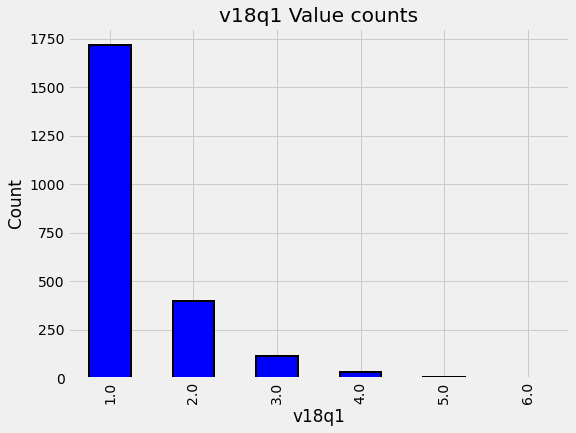

In [44]:
plot_value_counts(heads, 'v18q1')

It seems like the most common number of tablets to own is 1 if we go only by the data that is present. However, we also need to think about the data that is missing. In this case, it could be that familiies with a nan in this category just do not own a tablet! if we look at the data defintions, we see that v18q indicates whether or not a family owns a tablet. we should investigate this column combined with the number of tablets to see if our hypothesis holds.

We can groupby the value of v18q (which is 1 for owns a tablet and 0 for does not) and then calculate the number of null values for v18q1. This will tell us if null values repesent that the family does not own a tablet.

In [45]:
heads.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

Well, that solves the issue! Every family that has nan for v18q1 does not own a tablet. Therefore, we can fill in this missing value with zero.

In [46]:
data['v18q1'] = data['v18q1'].fillna(0)

### v2a1 : Monthly rent payment

The next missing column is v2a1 which represents the monthly rent payment

In addition to looking at the missing values of the monthly rent payment, it will be intersting to also look at the distribution of tipovivi_, the columns showing the ownership / renting status of the home. For this plot, we show the ownership status of those homes with nan for the monthly rent payment.

In [47]:
# Variables indicating home ownership 

own_variables = [x for x in data if x.startswith('tipo')]
own_variables

['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']

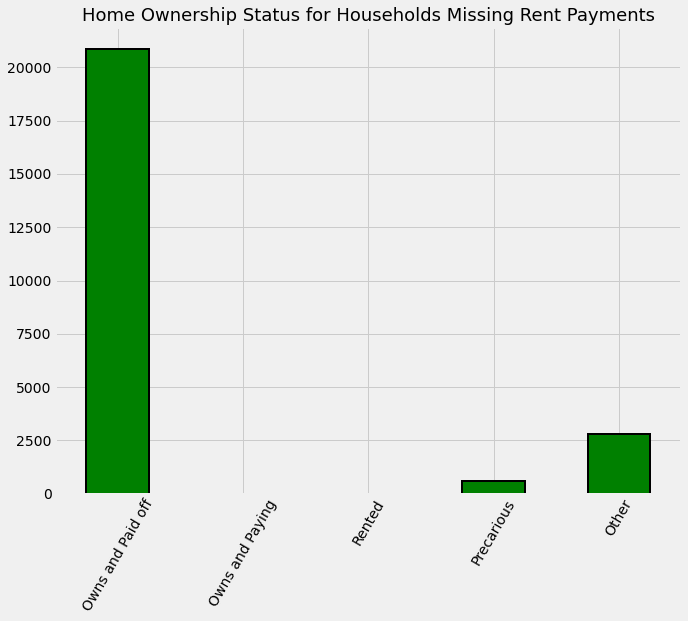

In [48]:
# Plot of the home ownership variables for home missing rent payments

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10,8), color = 'green', edgecolor = 'k', linewidth = 2)
plt.xticks([0,1,2,3,4], ['Owns and Paid off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation=60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size=18)
plt.show()

The meaning of the home ownership variables is below:

tipovivi1, = 1 own and fully paid house

tipovivi2, "=1 own, paying in installments"
tipovivi3, = 1 rented
tipovivi4, = 1 precarious
tipovivi5, "=1 other (assigned, borrowed)

We've solved the issue! Well, mostly: the households that do not have a monthly rent payment generally own their own home. In a few other situations, we are not sure of the reason for the missing information.

For the houses that are owned and have a missing monthly rent payment, we can set the value of the rent payment to zero. for the other homes, we can leave the missing values to be imputed but we;ll add a flag (Boolean) column indicating that these households had missing values.

In [49]:
# Fill in households that own the house with 0 rent payment

data.loc[(data['tipovivi1'] ==1), 'v2a1'] = 0

# Create missing rent payment column

data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

### rez_esc: years behind in school

The last column with a high % of missing values is rez_esc indicating years behind in school. For families with a null value, is possible that they have no children currently in school. Let's test this out by finding the ages of those who have a missing value in this column and the ages of those who do not have a missing value.

In [50]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

What this tells us is that the oldest age with a missing value is 17. For anyone older than this, maybe we can assume that they are siomply bot in school. Let's look at the ages of those who have a missing value.

In [51]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

If we read through some of the discussions for this competion, we learn that this variable is only defined for individuals between 7 and 19. Anyone younger or older than this range presumably has no years behind and therefore the value should be set to 0. For anyone alse, we'll leave the value to be imputed and add a boolean flag.

In [52]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0

data.loc[((data['age'] > 19) | (data['age'] < 7 )) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value

data['rez_esc-missing'] = data['rez_esc'].isnull()

There is also one outlier in the rez_esc column. Again, if we read through the competition discussion, we learn that the maximum value for this variable is 5. Therefore, any values above 5 should be set to 5.

In [53]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

## Plot Two Categorical Variables

To show how two categorical variables interact with one another, there are a number of plotting options: scatterplots, faceted bar plots, boxplots, etc. I wasn't satisfied with any of these choices so I wrote the function below, which essentially is a scatterplot of two categoricals where the size of the points represents the percentage of a given y-value represented by each x-value.

In [54]:
def plot_categoricals(x, y, data, annotate = True):
    """ Plot counts of two categoricals.
        Size is raw count for each grouping.
        Percentages are for a given value of y."""
    
    # Raw counts
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x:'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=True))
    
    # Rename the columns and reset the index
    counts = counts.rename(columns = {x:'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']

    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    # Plotting
    plt.figure(figsize=(14,10))
    plt.scatter(counts[x], counts[y], edgecolors= 'k', color = 'lightgreen', s = 100*np.sqrt(counts['raw_count']), marker = 'o', alpha=0.6, linewidth=1.5)
    
    if annotate:
        
        # Annotate the plot with text
        
        for i, row in counts.iterrows():
            
            # Put text with appropriate offset
            
            plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")
            
            # Set tick marks
            
            plt.yticks(counts[y].unique())
            plt.xticks(counts[x].unique())
            
            # Transform min and max to evenly space in square root domain 
            
            sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
            sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
            
            # 5 sizes for legend
            msizes = list(range(sqr_min, sqr_max, int((sqr_max-sqr_min)/5)))
            markers = []
            
            # Markers for legend
            
            for size in msizes:
                markers.append(plt.scatter([], [], s = 100 * size, label = f'{int(round(np.square(size) / 100) * 100)}', color = 'lightgreen', alpha=0.6, edgecolor='k', linewidth=1.5))
                
        # Legend and formatting
    
        plt.legend(handles=markers, title='Counts', labelspacing = 3, handletextpad = 2, fontsize = 16, loc = (1.10, 0.19))
        plt.annotate(f'* Size represents raw count while % is for a given y value.', xy = (0,1), xycoords = 'figure points', size=10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6/counts[x].nunique()), counts[x].max()+(6/counts[x].nunique())))
    plt.ylim((counts[y].min() - (4/counts[y].nunique()), counts[y].max()+(4/counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs {x}")

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


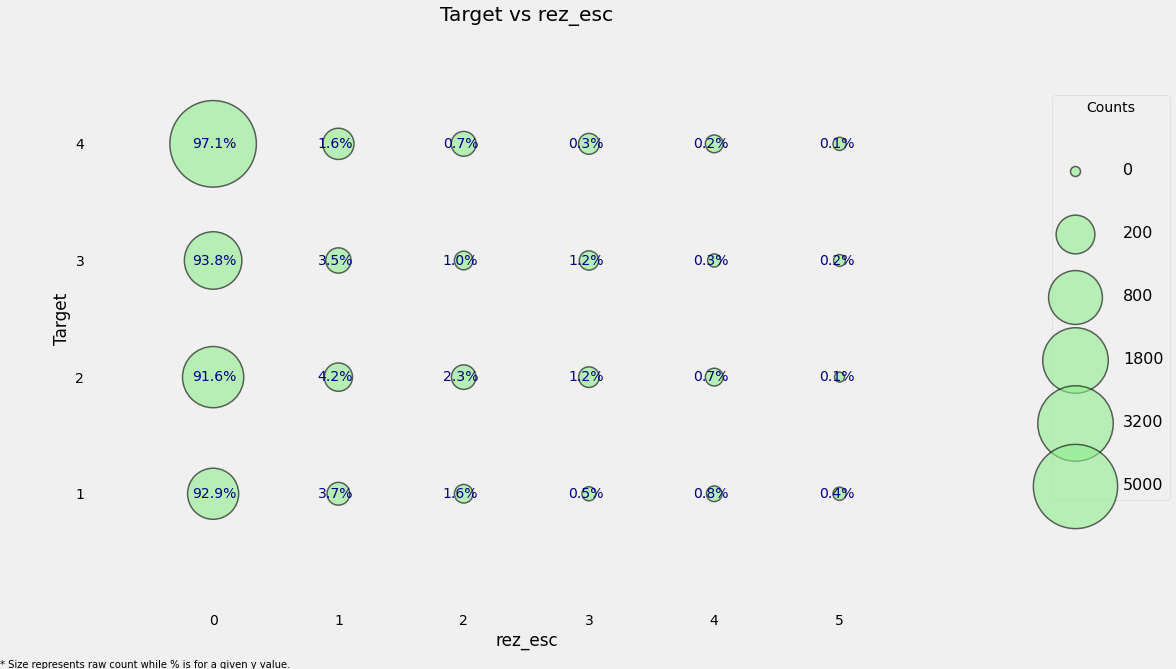

In [55]:
plot_categoricals('rez_esc', 'Target', data)

The size of the markers represents the raw count. To read the plot, choose a given y-value and then read across the row. For example, with a poverty level of 1, 93% of individuals have no years behind with a total count of around 800 individuals and about 0.4% of individuald are 5 years behind with about 50 total individuals in this category. This plot attemps to show both the overall counts and the within category prportion; it's not perfect, but I gave it a shot!

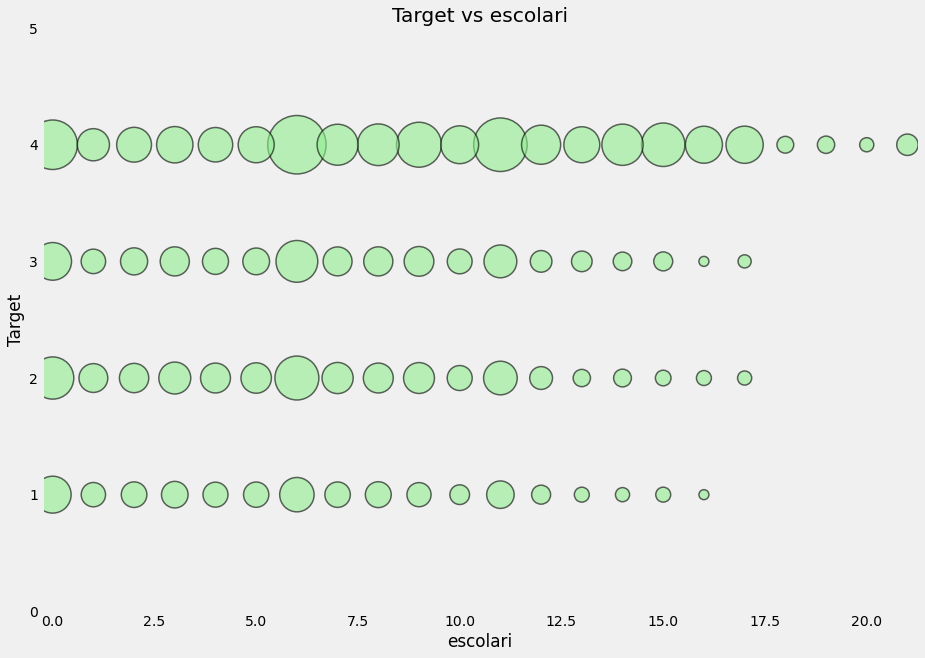

In [56]:
plot_categoricals('escolari', 'Target', data, annotate=False)

The remaining missing values in each column will be filled in, a process known as Imputation. There are several types of imputation commonly used, and one of the simplest and most effective methods is to fill in the missing values with the median of the column.

As a final step with the missing values, we can plot the distribution of target for the case where either of these values are missing.

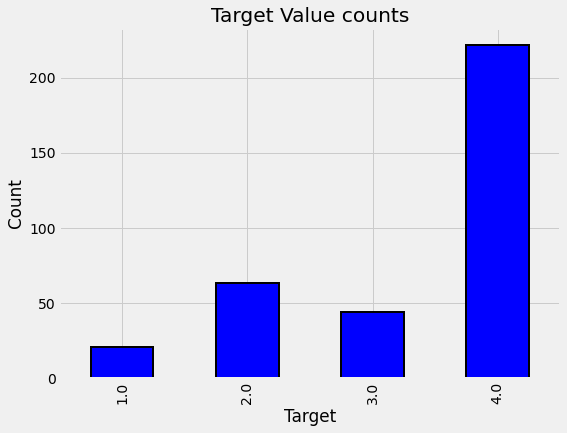

In [57]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

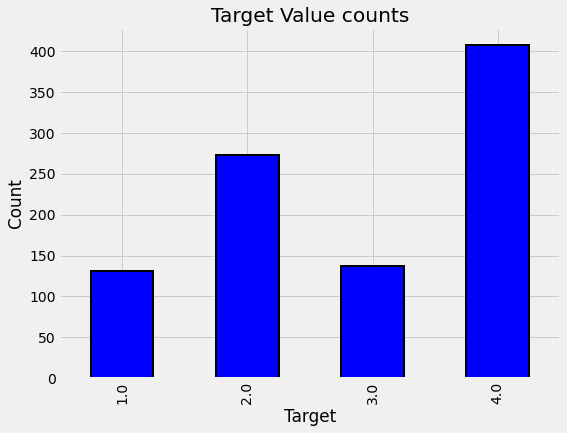

In [58]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

This looks like it could be an indicator of more poverty given the higher prevalence of 2: moderate poverty.

### This represents an important point:
sometimes the missing information is just as important as the information you are given.

## Feature Engineering

There is plenty more exploratory data analysis we can do, but first we should work on consolidating our data at a household level. We already have some of the information for each household, but for training, we will need all of the information summarized for each household. This means grouping the individuals in a house (groupby) and performing an aggregation (agg) of the individual variables. 

In another notebook, I show how we can use automated feature engineering to do this, and automated feature engineering should be a standard part of the machine learning workflow. Right now, we'll stick to doing this by hand, but definately take a look at automated feature engineering in Featuretoolds.

## Column Defintion 

Sometimes in data science we have to get our hands dirty digging through the data or do tedious tasks that take a lot of time. That is that part of the analysis: we have to define the columns that are at an individual level and at a household level using the data description. Except, I've already done this for you, so all you have to do is copy and paste!

We'll define different variables because we need to treat some of them in a different manner. once we have the variables defined on each level, we can work to start aggregating them as needed.

The process is as follows

1. Break variables into household level and individual level
   
2. Find suitable aggregations for the individual level data

   . Ordinal variables can use statistcal aggregation
   . Boolean variables can also be aggregated but with fewer stats
    
3. Join the individual aggregations to the household level data

## Define Variable Categories

There are several different categories of variables:

1. Individual Variables: there are charecteristics of each individual rather than the household
    
    . Boolean: Yes or No (0 or 1)
    . Ordered Discrete: Integers with an ordering
    
2. Household variables

    . Boolean: Yes or No
    . Ordered Discrete: Integers with an ordering 
    . Continuous numeric
    
3. Squared Variables: derived from squaring variables in the data

4. Id varables: identifies the data and should not be used as features

Below we manually define the variables in each category. This is a little tedious, but also necessary

    

In [59]:
id_ = ['Id', 'idhogar', 'Target']

In [60]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

In [61]:
ind_ordered = ['rez_esc', 'escolari', 'age']

In [62]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

In [63]:
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [64]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

Let's make sure we covered all of the variables and didn't repeat any

In [65]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

In [66]:
from collections import Counter
print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


### Squared Variables
First, the easiest step: we'll remove all of the squared variables. Sometimes variables are squared or transformed as part of feature engineering becuase it can help linear models learn relationships that are non-linear. However, since we will be using more complex models, these squared features are redundant. They are highly correlated with the non-squared version, and hence can actually hurt our model by adding irrelaevant information and slowing down training.

For an example, let's look at SQBage vs age.

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


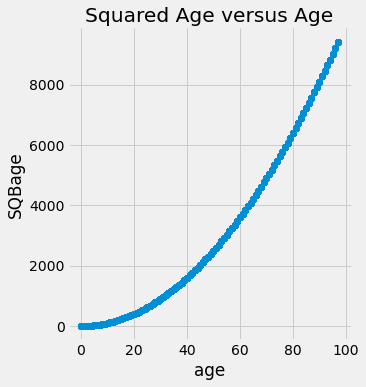

In [67]:
sns.lmplot('age', 'SQBage', data=data, fit_reg=False)
plt.title('Squared Age versus Age')
plt.show()

These variables are highly correlated, and we don't need to keep both in out data.

In [68]:
# Remove squared variables

data = data.drop(columns=sqr_)
data.shape

(33413, 136)

### Id Variables

These are pretty simple: they will be kep as is in the data since we need them for identification.

### Household Level Variables

First let's subset to the heads of household and then to the household level variables.

In [69]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

For most of the households level variables, we can simply keep them as is: since we want to make predictions for each households, we use these variables as features. However, we can also remove some redundant variables and also add in some more features derived from existing data.

### Redundant Household Variables

Let's take a look at the correlations between all of the household variables. If there are any that are too highly correlated, then we might want to remove one of the pair of highly correlated variables.

The following code identifies any variables with a greater than 0.95 absolute magnitude correlation.

In [70]:
# Create correlation matrix

corr_metrix = heads.corr()
corr_metrix

Target    hacdor    hacapo      v14a    refrig  paredblolad  \
Target        1.000000 -0.136275 -0.096313  0.068230  0.119607     0.254469   
hacdor       -0.136275  1.000000  0.593867 -0.086701 -0.066409    -0.113787   
hacapo       -0.096313  0.593867  1.000000 -0.123276 -0.075336    -0.094350   
v14a          0.068230 -0.086701 -0.123276  1.000000  0.145417     0.065795   
refrig        0.119607 -0.066409 -0.075336  0.145417  1.000000     0.128958   
...                ...       ...       ...       ...       ...          ...   
hogar_adul    0.127904  0.043431  0.046811  0.042932  0.095142     0.077227   
hogar_mayor  -0.025173 -0.058321 -0.043296  0.017662  0.019801     0.052410   
hogar_total  -0.111557  0.246793  0.195462  0.007458  0.056927    -0.033010   
bedrooms      0.135203 -0.189177 -0.126525  0.080487  0.137889     0.166149   
qmobilephone  0.168685  0.026514  0.036755  0.046128  0.134561     0.073779   

              paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
Target          -0.078851  -0.104545    -0.209131 -0.096893 -0.152979   
hacdor           0.026165   0.019816     0.110713  0.122610  0.068846   
hacapo           0.022254   0.007634     0.089127  0.134901  0.042265   
v14a             0.002527   0.007668    -0.020410 -0.128082 -0.068496   
refrig          -0.042125  -0.006812    -0.099088 -0.088633 -0.114895   
...                   ...        ...          ...       ...       ...   
hogar_adul      -0.024205  -0.050961    -0.071587 -0.019126 -0.029333   
hogar_mayor      0.017119  -0.086869    -0.078257 -0.019208  0.025679   
hogar_total     -0.010640   0.031997     0.041957  0.019260  0.000551   
bedrooms        -0.032534  -0.079613    -0.165024 -0.057864 -0.096135   
qmobilephone    -0.046875   0.010504    -0.078906 -0.023568 -0.079445   

              paredzinc  paredfibras  paredother  pisomoscer  pisoother  \
Target        -0.040128    -0.039861    0.005231    0.275452   0.016832   
hacdor         0.086632    -0.007015   -0.005960   -0.143259  -0.005960   
hacapo         0.118369    -0.005219   -0.004434   -0.120922  -0.004434   
v14a          -0.034484     0.003483    0.002960    0.094633   0.002960   
refrig        -0.049882    -0.013233    0.007742    0.184785   0.007742   
...                 ...          ...         ...         ...        ...   
hogar_adul    -0.004375    -0.003967    0.004132    0.082065   0.004132   
hogar_mayor   -0.030207     0.015424    0.003259    0.069048   0.007689   
hogar_total    0.044309    -0.006349    0.003235   -0.042462   0.015317   
bedrooms      -0.052869    -0.009185   -0.007966    0.199451   0.018329   
qmobilephone   0.000407    -0.016652   -0.005257    0.110785   0.004745   

              pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
Target        -0.054463    -0.114144   -0.103487   0.014357        0.032872   
hacdor         0.026892     0.116650    0.026372  -0.036627       -0.007641   
hacapo        -0.002458     0.115475    0.023931  -0.047382       -0.007023   
v14a          -0.057915    -0.140181   -0.076321   0.047145        0.012098   
refrig        -0.019392    -0.162552   -0.105376   0.016262        0.015251   
...                 ...          ...         ...        ...             ...   
hogar_adul    -0.005050    -0.013116   -0.026497   0.023670       -0.028640   
hogar_mayor    0.021459    -0.024801    0.012454  -0.002127        0.002354   
hogar_total    0.000119     0.038302   -0.011582   0.014178       -0.029371   
bedrooms      -0.017781    -0.090485   -0.053870   0.026258       -0.020845   
qmobilephone  -0.006242    -0.041059   -0.055693   0.016296       -0.011084   

              techocane  techootro  cielorazo  abastaguadentro  \
Target        -0.026240   0.031516   0.295249         0.062961   
hacdor        -0.008595  -0.006613  -0.148678        -0.036094   
hacapo        -0.006394  -0.004920  -0.131246        -0.038001   
v14a           0.004268   0.003284   0.087430         0.169428   
refrig    

In [71]:
# Select upper triangle of correlation matrix

upper = corr_metrix.where(np.triu(np.ones(corr_metrix.shape), k=1).astype(np.bool))
upper

<ipython-input-71-383b5ffc00ba>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_metrix.where(np.triu(np.ones(corr_metrix.shape), k=1).astype(np.bool))


Target    hacdor    hacapo      v14a    refrig  paredblolad  \
Target           NaN -0.136275 -0.096313  0.068230  0.119607     0.254469   
hacdor           NaN       NaN  0.593867 -0.086701 -0.066409    -0.113787   
hacapo           NaN       NaN       NaN -0.123276 -0.075336    -0.094350   
v14a             NaN       NaN       NaN       NaN  0.145417     0.065795   
refrig           NaN       NaN       NaN       NaN       NaN     0.128958   
...              ...       ...       ...       ...       ...          ...   
hogar_adul       NaN       NaN       NaN       NaN       NaN          NaN   
hogar_mayor      NaN       NaN       NaN       NaN       NaN          NaN   
hogar_total      NaN       NaN       NaN       NaN       NaN          NaN   
bedrooms         NaN       NaN       NaN       NaN       NaN          NaN   
qmobilephone     NaN       NaN       NaN       NaN       NaN          NaN   

              paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
Target          -0.078851  -0.104545    -0.209131 -0.096893 -0.152979   
hacdor           0.026165   0.019816     0.110713  0.122610  0.068846   
hacapo           0.022254   0.007634     0.089127  0.134901  0.042265   
v14a             0.002527   0.007668    -0.020410 -0.128082 -0.068496   
refrig          -0.042125  -0.006812    -0.099088 -0.088633 -0.114895   
...                   ...        ...          ...       ...       ...   
hogar_adul            NaN        NaN          NaN       NaN       NaN   
hogar_mayor           NaN        NaN          NaN       NaN       NaN   
hogar_total           NaN        NaN          NaN       NaN       NaN   
bedrooms              NaN        NaN          NaN       NaN       NaN   
qmobilephone          NaN        NaN          NaN       NaN       NaN   

              paredzinc  paredfibras  paredother  pisomoscer  pisoother  \
Target        -0.040128    -0.039861    0.005231    0.275452   0.016832   
hacdor         0.086632    -0.007015   -0.005960   -0.143259  -0.005960   
hacapo         0.118369    -0.005219   -0.004434   -0.120922  -0.004434   
v14a          -0.034484     0.003483    0.002960    0.094633   0.002960   
refrig        -0.049882    -0.013233    0.007742    0.184785   0.007742   
...                 ...          ...         ...         ...        ...   
hogar_adul          NaN          NaN         NaN         NaN        NaN   
hogar_mayor         NaN          NaN         NaN         NaN        NaN   
hogar_total         NaN          NaN         NaN         NaN        NaN   
bedrooms            NaN          NaN         NaN         NaN        NaN   
qmobilephone        NaN          NaN         NaN         NaN        NaN   

              pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
Target        -0.054463    -0.114144   -0.103487   0.014357        0.032872   
hacdor         0.026892     0.116650    0.026372  -0.036627       -0.007641   
hacapo        -0.002458     0.115475    0.023931  -0.047382       -0.007023   
v14a          -0.057915    -0.140181   -0.076321   0.047145        0.012098   
refrig        -0.019392    -0.162552   -0.105376   0.016262        0.015251   
...                 ...          ...         ...        ...             ...   
hogar_adul          NaN          NaN         NaN        NaN             NaN   
hogar_mayor         NaN          NaN         NaN        NaN             NaN   
hogar_total         NaN          NaN         NaN        NaN             NaN   
bedrooms            NaN          NaN         NaN        NaN             NaN   
qmobilephone        NaN          NaN         NaN        NaN             NaN   

              techocane  techootro  cielorazo  abastaguadentro  \
Target        -0.026240   0.031516   0.295249         0.062961   
hacdor        -0.008595  -0.006613  -0.148678        -0.036094   
hacapo        -0.006394  -0.004920  -0.131246        -0.038001   
v14a           0.004268   0.003284   0.087430         0.169428   
refrig         0.002038   0.0085

In [72]:
# Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

In [73]:
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

These show one out of each pair of correlated variables. To find the other pair, we can subset the corr_matrix.

In [74]:
corr_metrix.loc[corr_metrix['tamhog'].abs() > 0.9, corr_metrix['tamhog'].abs() > 0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

<AxesSubplot:>

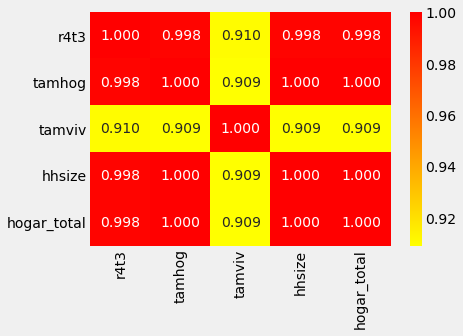

In [75]:
sns.heatmap(corr_metrix.loc[corr_metrix['tamhog'].abs() > 0.9, corr_metrix['tamhog'].abs() > 0.9], annot=True, cmap=plt.cm.autumn_r, fmt='0.3f')

There are several variables here having to do with the size of the house:

1. r4t3. Total persons in the household
2. tamhog, size of the household
3. tamviv, number of persons living in the household
4. hhsize, household size
5. hogar_total, # of total individuals in the household



There variables are highly correlated with one another. In fact, hhsize has a perfect correlation with tamhog and hogar total. we will remove these two variables becuase the information is redundant. we can also remove r4t3 because it has a near perfect correlation with hhsize.

tamviv is not necrssarilt the same as hhsize becuase there might be family members that are not living in the household. Let's visualize this difference in a scatterplot.

In [76]:
heads = heads.drop(columns=['tamhog', 'hogar_total', 'r4t3'])

In [77]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Household size vs number of persons living in the household')

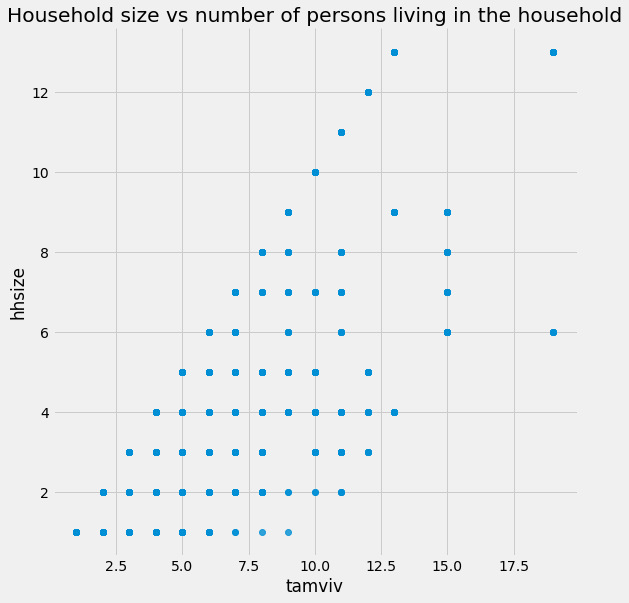

In [78]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size=8)
plt.title('Household size vs number of persons living in the household')

We see for a number of cases, there are more people living in the household than there are in family. This give us a good idea for new feature: the difference between these two measurements!

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


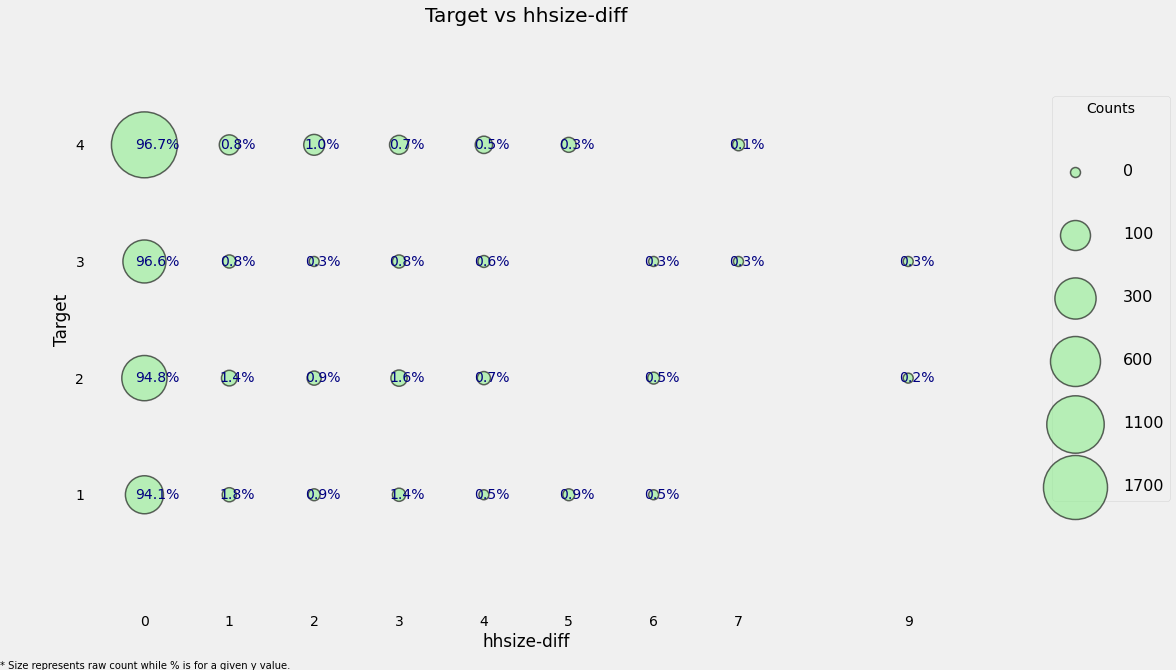

In [79]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

Even though most households do not have a difference, there are a few that have more people living in the household than are members of the household. 

Let's move on to other redundant variables. First we can look at coople.

In [80]:
corr_metrix.loc[corr_metrix['coopele'].abs() > 0.9, corr_metrix['coopele'].abs() > 0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

These variables indicate where the electricity in the home is coming from. There are four options, and the families that don't have one of these two options either have no electricity (noelec) or get it from a private plan (planpri).

### Creating Ordinal Variable

I'm going to compress these four variables into one by creating an ordinal variable. I'm goin to choose the mapping myself, based on the data description.

0: No electricity
1: Electricity from cooperative
2: Electricily from CNFL, ICA, ESPH/JASEC
3: Electricity from private plant

An ordered variable has an inherent ordering, and for this we choose our own based on the domain knowledge. After we create this new ordered variable, we can drop the four others. There are several households that do not have a variable here, so we will use a nan (which will be filled in during imputation) and add a Boolean column indicating there was no measure for this variable.

In [81]:
elec = []

# Assign values

for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(4)
        
# Record the new variable and missing flag

heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the ectricity colmns 
heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

In [82]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


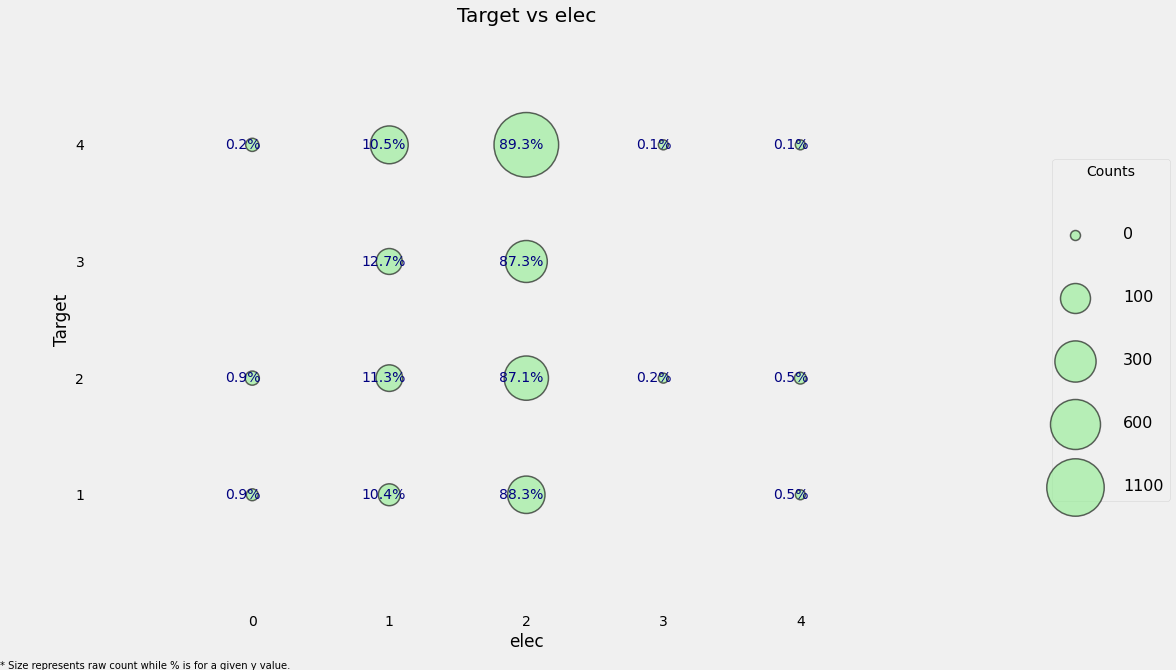

In [83]:
plot_categoricals('elec', 'Target', heads)

We can see that for every value of the Target, the most common source of electricity is from one the listed providers.

The final redundant column is area2. This means the house is in a rural zone, but it's redundant bacuase we have a column indicating if the house is in a urban zone. Therefore, we can drop this column.

In [84]:
heads = heads.drop(columns='area2')

In [85]:
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

It seems like households in an urban area (value of 1) are more likely to have lower poverty levels than households in a rural area (value of 0)

### Creating Ordinal Variables

For the walls, roof and floor of the house, there are three columns each: the first indicating 'bad', the second 'regular' and the third 'good'. We could leave the variables as booleans, but to me it makes more sense to turn them into ordinal variable becuase there is an inherent order: bad < regular < good. To do this, we can simply find whichever column is non-zero for each household using np.argmax.

Once we have created the ordinal variables, we are able to drop the original variables.

In [86]:
## Wall ordinal variable

heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis=1)

In [87]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


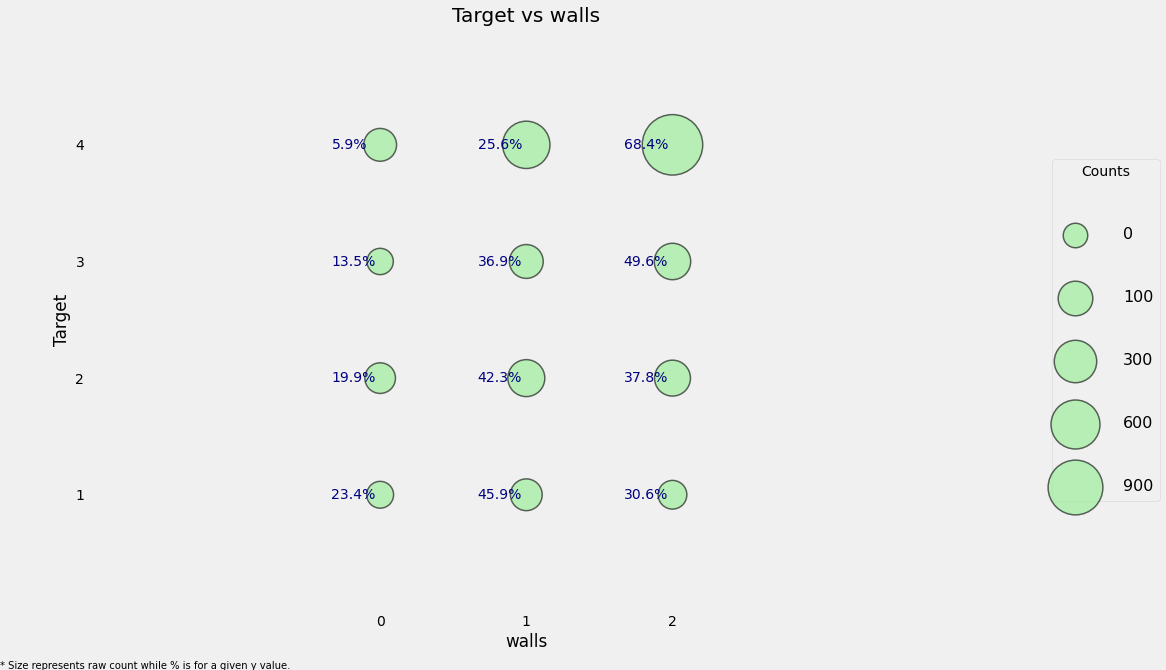

In [88]:
heads = heads.drop(columns=['epared1', 'epared2', 'epared3'])
plot_categoricals('walls', 'Target', heads)

In [89]:
# Roof ordinal variable

heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis=1)
heads = heads.drop(columns=['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis=1)
heads = heads.drop(columns=['eviv1', 'eviv2', 'eviv3'])

In [90]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

## Feature Constructions

In addition to mapping variables to ordinal features, we can also create entirely new features from existing data, known as feature construction. for example , we can add up the previous three features we just created to get an overall measure of the quality of the house's structure.

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


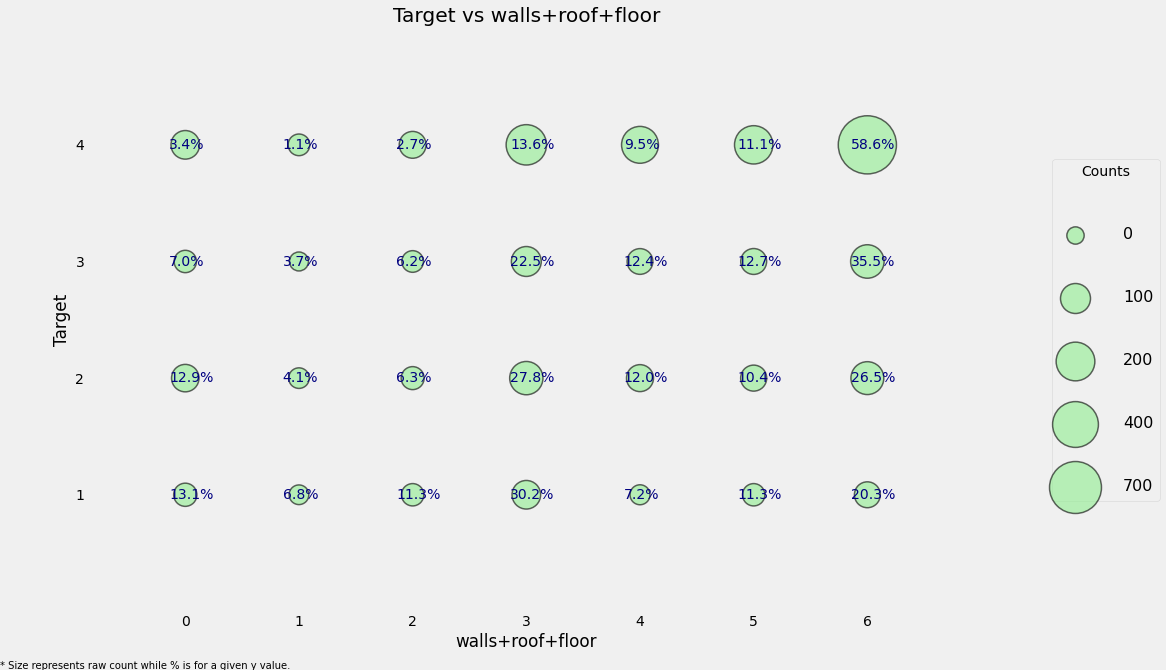

In [91]:
#Create new feature

heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=True)

This new feature may be useful because it seems like a Target of 4 (the lowest powerty level) tends to have higher values of the house quality variable. we can also look at this in a table to get the fine-grained details.

In [92]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize=True)).rename(columns={'Target': 'Normalized Count'}).reset_index()

In [93]:
counts

walls+roof+floor  Target  Normalized Count
0                  0     4.0          0.376404
1                  0     2.0          0.320225
2                  0     1.0          0.162921
3                  0     3.0          0.140449
4                  1     4.0          0.323529
5                  1     2.0          0.264706
6                  1     1.0          0.220588
7                  1     3.0          0.191176
8                  2     4.0          0.409449
9                  2     2.0          0.220472
10                 2     1.0          0.196850
11                 2     3.0          0.173228
12                 3     4.0          0.496269
13                 3     2.0          0.229478
14                 3     3.0          0.149254
15                 3     1.0          0.125000
16                 4     4.0          0.620805
17                 4     2.0          0.177852
18                 4     3.0          0.147651
19                 4     1.0          0.053691
20                 5     4.0          0.650602
21                 5     2.0          0.138554
22                 5     3.0          0.135542
23                 5     1.0          0.075301
24                 6     4.0          0.799163
25                 6     3.0          0.087866
26                 6     2.0          0.081590
27                 6     1.0          0.031381

The next variable will be a warning about the quality of the house. It will be a negative value, with -1 point each for no toilet, electricity, floor, water service, and ceiling.

In [94]:
# No toilet, no electricity, no floor, no water service, no ceiling 

heads['warning'] = 1 * (heads['sanitario1'] + (heads['elec'] == 0) + heads['pisonotiene'] + heads['abastaguano'] + (heads['cielorazo'] == 0))

In [95]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

We can keep using our plot_categoricals function to visualize these relationships, but sseaborn also has a numer of plotting options that can work with categoricals. One is the violinplot which shows the distribution of a variable on the y axis with the width of each plot showing the number of observations in that category.

Text(0.5, 1.0, 'Target vs Warning Variable')

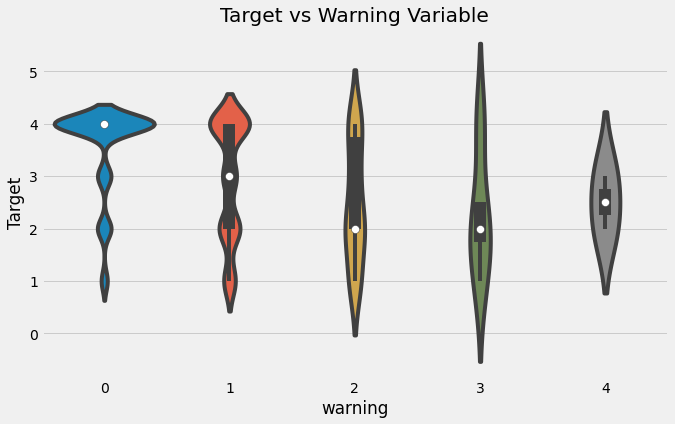

In [96]:
plt.figure(figsize=(10,6))
sns.violinplot(x='warning', y = 'Target', data=heads)
plt.title('Target vs Warning Variable')

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


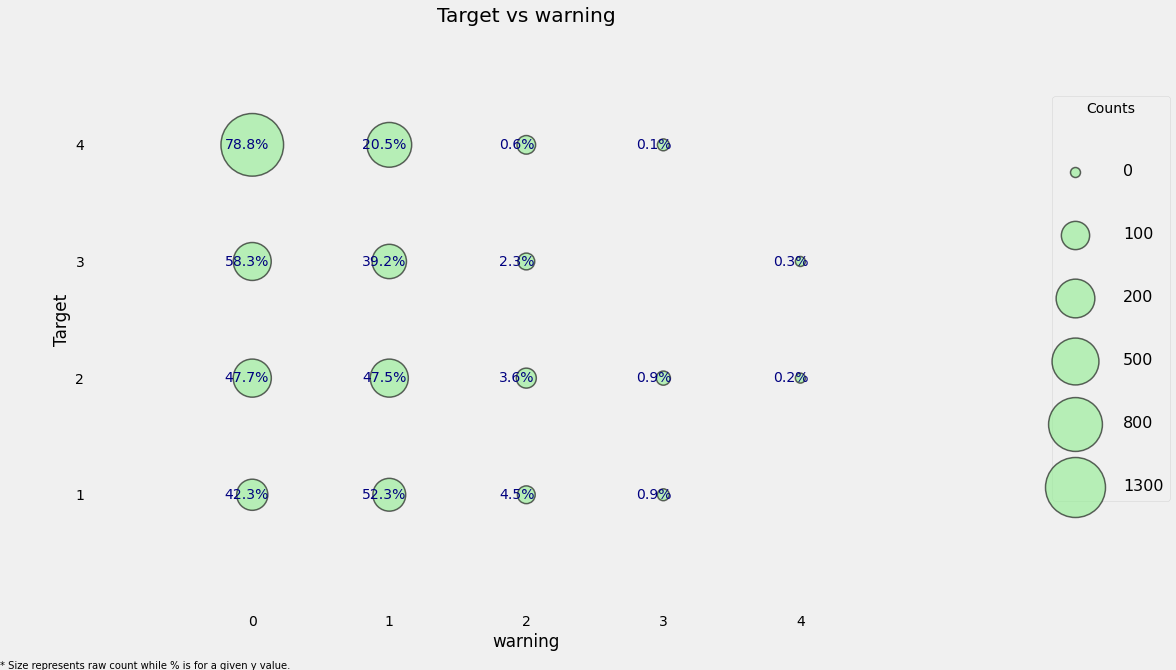

In [97]:
plot_categoricals('warning', 'Target', data=heads)

The violine plot is not great here because it smooths out the categorical variable with the effect that it looks as if the target can take on lesser and greater values than in reality. Nonetheless, we can see a high cocentration of households that have no warning signs and have the lowest level of poverty. It looks as if this may ne a useful feature, but we can't know for sure until we get to modelling!

The final household feature we can make for now is a bonus where a family gets a point for having a fridge, computer, tablet, or television.

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target vs Bonus variable')

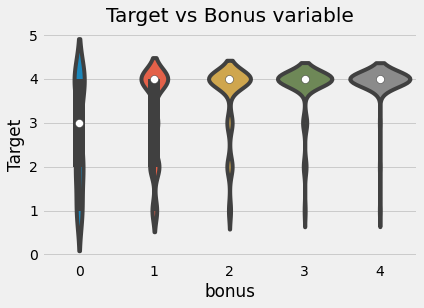

In [98]:
# Owns a refridge, computer, tablet, and television

heads['bonus'] = 1 * (heads['refrig'] + heads['computer'] + (heads['v18q1'] > 0) + heads['television'])

sns.violinplot('bonus', 'Target', data=heads, figsize=(10,6))

plt.title('Target vs Bonus variable')

### Per Capita Features

Additional features we can make calculate the number of certain measurements for each person in household

In [99]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

## Exploring household variables

After going to all the trouble of getting out features in order, now we can take a look at them in relation to the Target. we've already done a little of this, but now we can try to quanify relationships.

## Measuring relationship

There are many ways for reasuring relationaships between two variables. Here we will examine two of these:

1. The Pearson Correlation: from -1 to 1 measuring the linear relationship between two variables

2. The Spearman Correlation: from -1 to 1 measuring the monotonic relationship between two variables

The Spearman correlation is 1 if as one variable increases, the other does as well even if the relationship is not linear. On the other hand, the pearson correlation can only be one if the increases is exactly linear. These are best illustrated by example.

In [100]:
from scipy.stats import spearmanr

In [101]:
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation"""
    # Calculate correlation
    spr = spearmanr(x,y).correlation
    pcr = np.corrcoef(x,y)[0,1]
    
    # Scatter plot
    data = pd.DataFrame({'x':x, 'y':y})
    plt.figure(figsize=(6,4))
    sns.regplot('x', 'y', data=data, fit_reg=False)
    plt.title(f'Spearman: {round(spr,2)}; {round(pcr,2)}')

In [102]:
x = np.array(range(100))
y = x ** 2

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


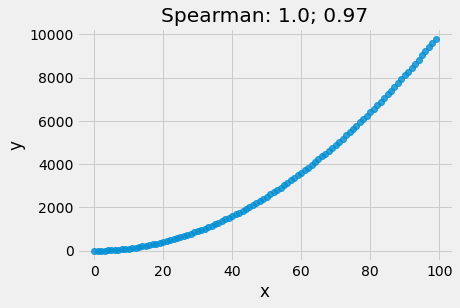

In [103]:
plot_corrs(x, y)

The spearman correlation is often considered to be better for ordinal variables such as the Target of the years of education. Most relationship in the real world aren't linear, and although the Pearson correlation can be an approximation of how related two variables are, it's inextact and not the best method of comparison.

In [104]:
x = np.array([1,1,1,2,3,3,4,4,4,5,5,6,7,8,8,9,9,9])
y = np.array([1,2,1,1,1,1,2,2,2,2,1,3,3,2,4,2,2,4])

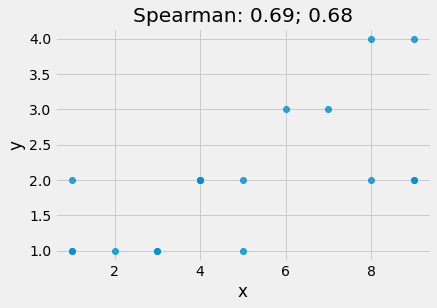

In [105]:
plot_corrs(x, y)

In most cases values are very similar

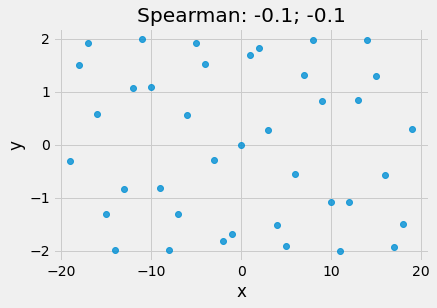

In [106]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)
plot_corrs(x, y)

First, we'll calculate the Pearson correlation of every variable with the Target.

In [107]:
# Use only training data

train_heads = heads.loc[heads['Target'].notnull(), :].copy()
pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target':'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns={'index':'feature'})
print('Most -vely correlated variables:')
print(pcorrs.head())
print('\nMost +vely correlated variables:')
print(pcorrs.dropna().tail())

Most -vely correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479

Most +vely correlated variables:
              feature     pcorr
86  phones-per-capita  0.299026
87              floor  0.307605
88   walls+roof+floor  0.332446
89           meaneduc  0.333652
90             Target  1.000000


For -ve correlation, as we increase the variable, the Target decreases indicating the poverty severity increases. Therefore, as the warning increases, the poverty level also increases which makes sense because this was meant to show potential bad signs about a house. The hogar_nin is the number of children 0-19 in the family which also makes sense: younger children can br financial source of stress on a family leading to higher levels of poverty. Or, damilies with lower socioeconomic status have more children in the hopes that one of them will be able to succeed. Whatever the explanation, there is a real link between family size and poverty.

One the other hand, for the positive correlation, a higher value means a highe value of target indicating the poverty severity decreases. The most highly correlated household level variable is meameduc, the average education level of the adults in the household. This relationship between education and poverty level makes sense: greater levels od education generally correlate with lower level of poverty. we don't necessarily know which causes which, but we do know these tend to move in the same direction.

The general guidelines for correlation values are below, but these will change depending on who you ask (source of these).

.00 - .19 "very week"
.20 - .39 "week"
.40 - .59 "moderate"
.60 - .79 "strong"
.80 - 1.0 "very strong"

What these correlations show is that there are some weak relationships that hopefully our model will be able to use to learn a mapping from the features to the Target.

Now we xcan move on to the Spearman correlation.

In [108]:
import warnings

In [109]:
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [110]:
feats = []
scorr = []
pvalues = []

# Iterate through each column

for c in heads:
    #Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)
        
scorrs = pd.DataFrame({'feature':feats, 'scorr':scorr, 'pvalue': pvalues}).sort_values('scorr')

In [111]:
scorrs

feature     scorr        pvalue
87          warning -0.307326  4.682829e-66
58       dependency -0.281516  2.792620e-55
75        hogar_nin -0.236225  5.567218e-39
70             r4t1 -0.219226  1.112230e-33
8       pisocemento -0.209387  8.270816e-31
..              ...       ...           ...
40        elimbasu5       NaN           NaN
57             v2a1       NaN           NaN
61         meaneduc       NaN           NaN
82     elec-missing       NaN           NaN
92  rent-per-capita       NaN           NaN

[93 rows x 3 columns]

The Spearman correlation coefficient calculation also comes with a pvalue indicating the significance level of the relationship. Any pvalue less than 0.05 is generally regarded as significant, although since we are doing multiple comparisons, we want to divide the p-value by the number of comparisons, a process kknow as Bonferroni correlation.

In [112]:
print('Most -ve spearman correlation:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most -ve spearman correlation:
        feature     scorr        pvalue
87      warning -0.307326  4.682829e-66
58   dependency -0.281516  2.792620e-55
75    hogar_nin -0.236225  5.567218e-39
70         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
85              floor  0.309638  4.466091e-67
89  phones-per-capita  0.337377  4.760104e-80
86   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


For the most part, the two methods of calculating correlation are in agreemant. Just out of curiocity, we can look for the values that are futhest apart.

In [113]:
corrs = pcorrs.merge(scorrs, on = 'feature')

In [114]:
corrs

feature     pcorr     scorr        pvalue
0            warning -0.301791 -0.307326  4.682829e-66
1          hogar_nin -0.266309 -0.236225  5.567218e-39
2               r4t1 -0.260917 -0.219226  1.112230e-33
3       overcrowding -0.234954 -0.206694  4.772392e-30
4               r4m1 -0.209479 -0.171953  3.649343e-21
..               ...       ...       ...           ...
88  walls+roof+floor  0.332446  0.338791  9.539346e-81
89          meaneduc  0.333652       NaN           NaN
90            Target  1.000000  1.000000  0.000000e+00
91         elimbasu5       NaN       NaN           NaN
92      elec-missing       NaN       NaN           NaN

[93 rows x 4 columns]

In [115]:
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
68    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
76               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
78  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
86   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [116]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
50    techozinc  0.014357  0.003404  8.528369e-01  0.010954
43  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
79       edjefe  0.235687  0.214736  2.367521e-32  0.020951
57       edjefa  0.052310  0.005114  7.804715e-01  0.047197
13   dependency -0.126465 -0.281516  2.792620e-55  0.155051

The largest discrepency in the correlations is dependency. We can make a scatterplot of the Target versus the dependency to visualize the relationship. We'll add a little jitter to the plot because these are both discrete variables.

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target vs Dependency')

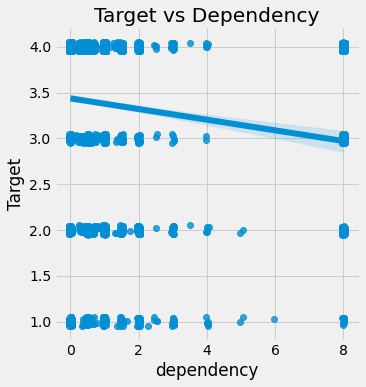

In [117]:
sns.lmplot('dependency', 'Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Dependency')

It's hard to see the relationship, but it's slightly negative: as the dependency increases, the value of the Target decreases. This makes sense: the dependency is the number of dependent individuls divided by the number of non-dependents. As we increase this value, the poverty severity tends to increase: having more dependent family members (who usually are non-workin) leads to higher levels of poverty becuase they must be supported by the non-dependent family members.

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target vs Rooms Per Capita')

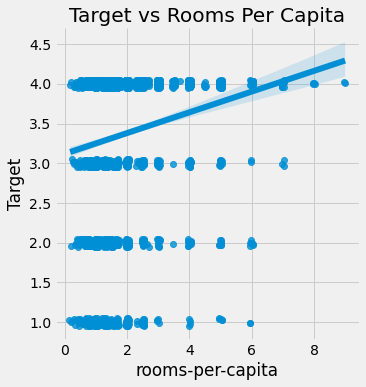

In [118]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Rooms Per Capita')

### Correlation Heatmap

One of my favorite plots is the correlation heatmap because it shows a ton of info in one image. For the heatmap, we'll pick 7 variables and show the correlations between themselves and with the target.

<AxesSubplot:>

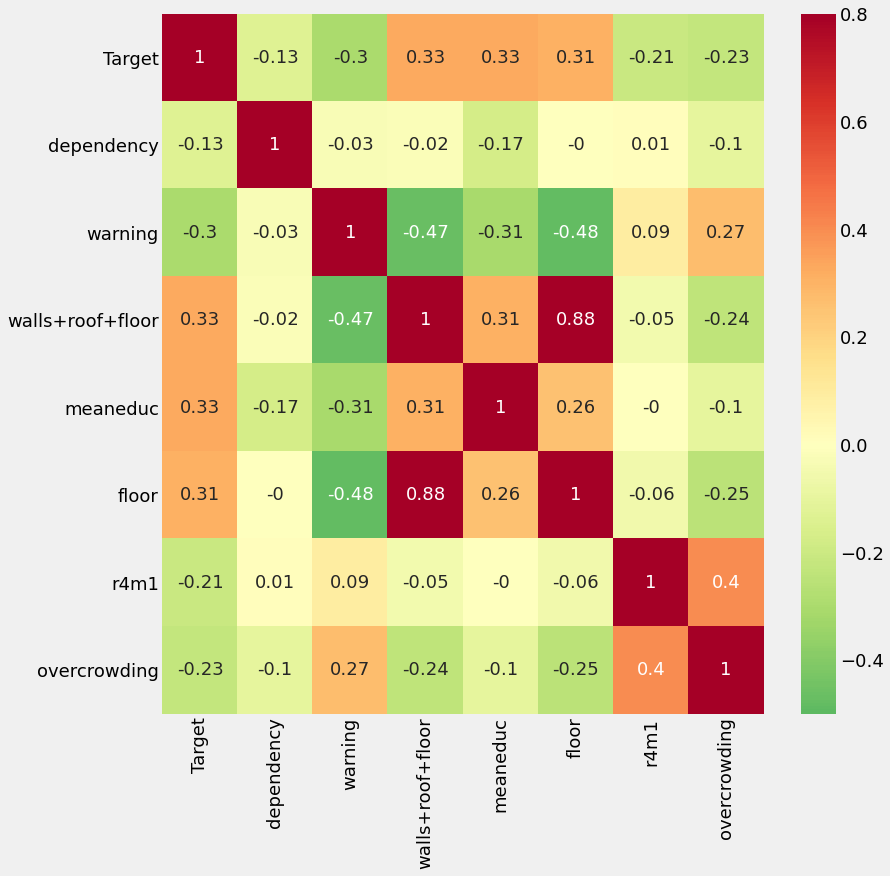

In [119]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc', 'floor', 'r4m1', 'overcrowding']

# Calculate the correlations

corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap

plt.rcParams['font.size'] = 18
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, vmin=-0.5, vmax=0.8, center=0, cmap=plt.cm.RdYlGn_r, annot=True)

This plot shows us that there are a number of variables that have a weak correlation with the Target. There are also high correlations between some variables (such as floor and walls+roof+floor) which could pose an issue because of collinearity.

## Features Plot

For the final exploration of the household level data, we can make a plot of some of the most correlated variables with the target. This shows scatterplots on the upper triangle, kernet density estimate (kde) plots on the diagonal, and 2D KDE plots on the lower triangle.

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:1135: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:1135: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:1135: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:1135: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:1135: UserWarning: cmap paramete

Text(0.5, 1.05, 'Feature Plots Colred By Target')

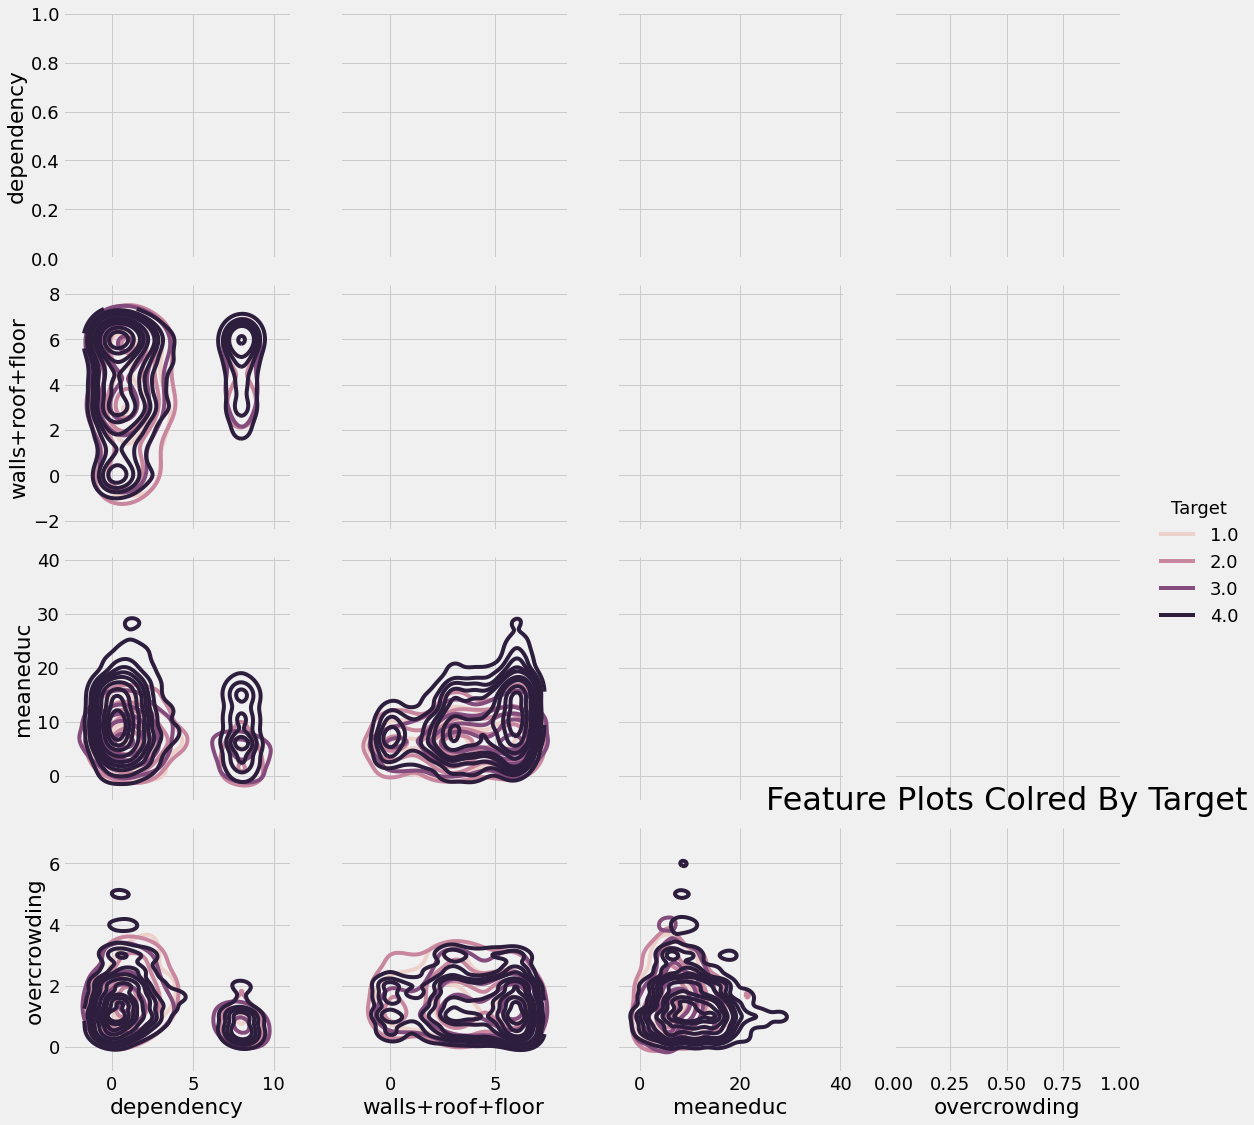

In [120]:
# Copy the data for plotting 

plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor', 'meaneduc', 'overcrowding']]

# Create the pairgrid object

grid = sns.PairGrid(data = plot_data, size=4, diag_sharey=False, hue = 'Target', hue_order=[4,3,2,1], vars=[x for x in list(plot_data.columns) if x!= 'Target'])

# Bottom is density plot

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

grid = grid.add_legend()
plt.title('Feature Plots Colred By Target', size=32, y=1.05)

We'll leave the feature engineering of the household variable for now. Later, we can come back to this step if we are not pleased with the model performance.

In [121]:
household_feats = list(heads.columns)

## Individual Level Variables

There are two types of individual level variables: Boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering)

In [122]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

## Redundant Individual Variables

We can do the same process we did with the household level variables to identify any redundant individual variables. we'll focus on any magnitude of the correlation cofficient greater than 0.95

In [123]:
# Create correlation matrix 

corr_matrix = ind.corr()

# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
 
# Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

<ipython-input-123-d746c788a08e>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['female']

This is simply opposite of male! We can remove the male flag.

In [124]:
ind = ind.drop(columns='male')

## Creating Ordinal Variables

Much as we did with the household level data, we can map existing columns to an ordinal variable. Here we will focus on the instlevel_ variables which indicate the amount of education an individual has from instlevel1: no level of education to instlevel9: postgraduate education.

To create the ordinal variable, for each individual, we will simply find which column is non-zero. The education has an inherent ordering (higher is better) so this conversion to an ordinal variable makes sense in the problem context.

In [125]:
ind[[c for c in ind if c.startswith('instl')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


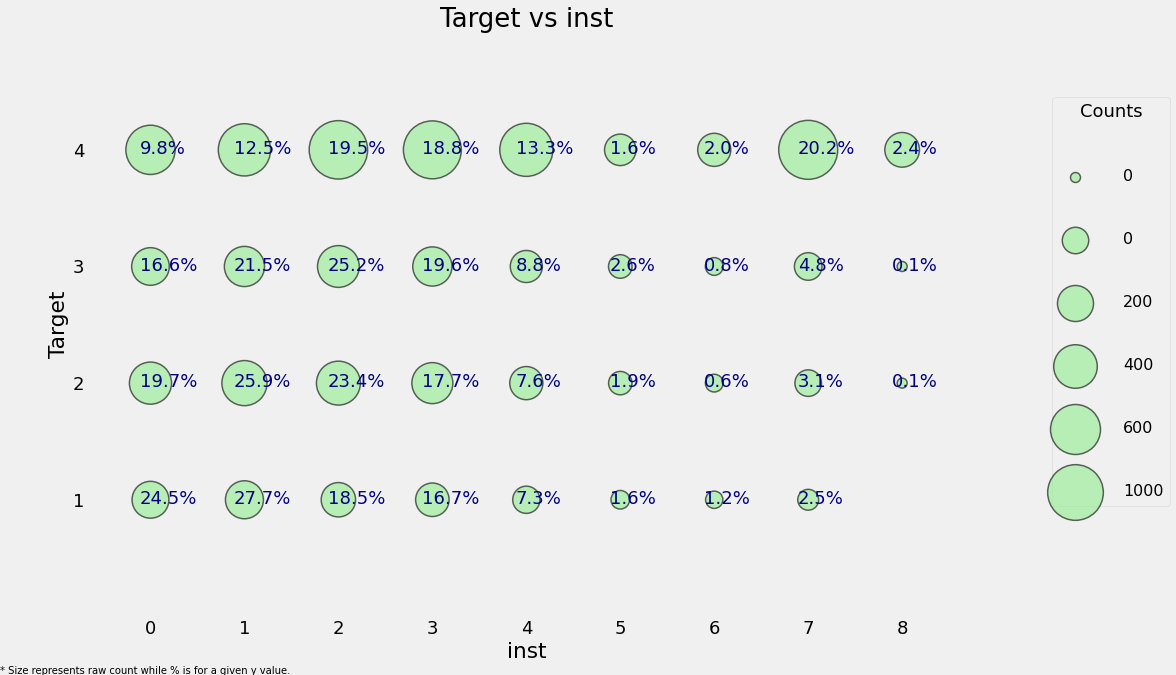

In [126]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis=1)
plot_categoricals('inst', 'Target', ind, annotate=True)

Higher levels of education seem to correspond to less extreme levels of poverty. We do need to keep in mind this is on an individual level though and we eventually will have to aggregate this data at household level.

Text(0.5, 1.0, 'Education Distribution by Target')

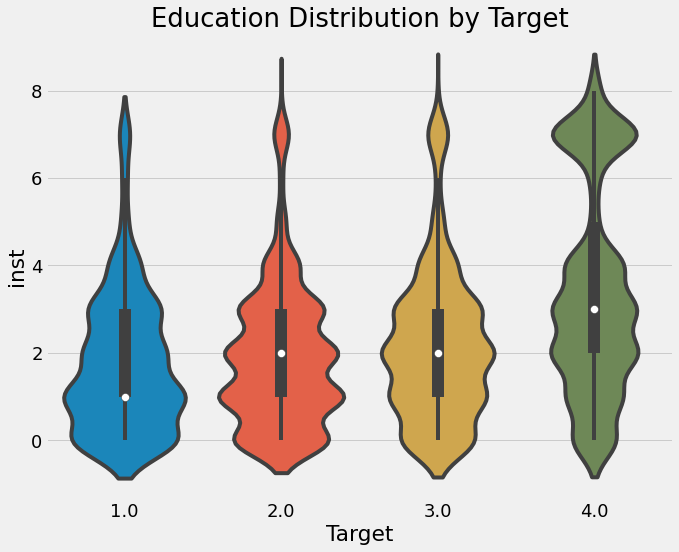

In [127]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Target', y='inst', data=ind)
plt.title('Education Distribution by Target')

In [128]:
# Drop the education columns

ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])

ind.shape

(33413, 31)

## Feature Construction

We can make a few features using the existing data. For example, we can divide the years of schooling by the age.

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='escolari/age'>

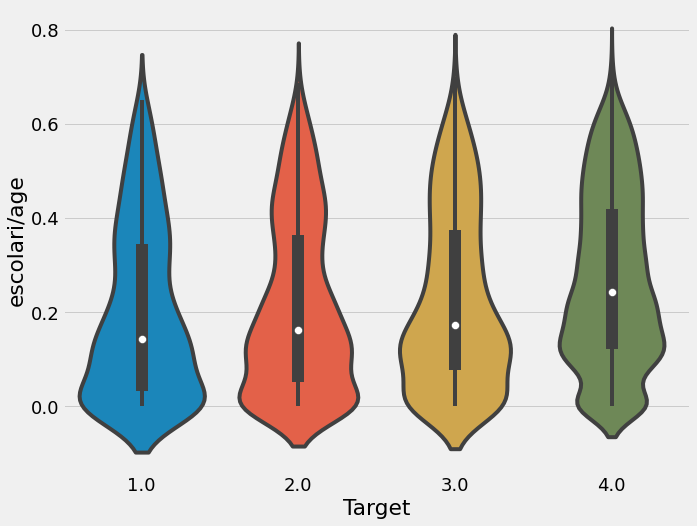

In [129]:
ind['escolari/age'] = ind['escolari'] / ind['age']
plt.figure(figsize=(10,8))
sns.violinplot('Target', 'escolari/age', data=ind)

We can also take our new variable, inst, and divide this ny the age. The final variable we'll name tech: this represents the combination of tablet and mobile phones.

In [130]:
ind['ind/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

### Feature Engineering through Aggregation

In order to incorporate the individual data into the household data, we need to aggregate it for each household. The simplest way to do this is to groupby the family id idhogar and then agg the data. For the aggregations for ordered or continuous variables, we can use six, five of which are built in to pandas, and one of which we define ourselved range_. The boolean aggregations can be the same, but this will create many redundant columns which we will then need to drop. For this case, we'll use the same aggregations and then go back and drop redundant columns.

In [131]:
# Define custom function

range_ = lambda x: x.max() - x.min()

range_.__name__ = 'range_'

# Group and aggregate

ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])

ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

With just that one line, we go from 30 features to 180. Next we can rename the columns to make it easier to keep track.

In [132]:
ind_agg.columns.levels[0]

Index(['v18q', 'dis', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3',
       'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7',
       'parentesco1', 'parentesco2', 'parentesco3', 'parentesco4',
       'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8',
       'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12',
       'mobilephone', 'rez_esc', 'escolari', 'age', 'inst', 'escolari/age',
       'ind/age', 'tech'],
      dtype='object')

In [133]:
ind_agg.columns.levels[1]

Index(['min', 'max', 'sum', 'count', 'std', 'range_'], dtype='object')

In [134]:
# Rename the colums

new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
ind_agg.columns = new_col
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2        0        0        0          4  0.000000           0   

           female-min  female-max  female-sum  female-count  female-std  \
idhogar                                                                   
000a08204           0           1           1             3    0.577350   
000bce7c4           0           1           1             2    0.707107   
001845fb0           0           1           2             4    0.577350   
001ff74ca           1           1           2             2    0.000000   
003123ec2           0           1           1             4    0.500000   

           female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                        
000a08204              1                 0                 1   
000bce7c4              1                 0                 0   
001845fb0              1                 0                 0   
001ff74ca              0                 0                 1   
003123ec2              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 0                   2           0.00000   
003123ec2                 2                   4           0.57735   

           estadocivil2-range_  estadocivil3-min  estadocivil3-max  \
idhogar                                                              
000a08204                    1                 0                 0   
000bce7c4                    0                 1                 1   
001845fb0                    1                 0                 0   
001ff74ca                    0                 0                 0   
003123ec2                    1                 0                 0   

           estadocivil3-sum

In [135]:
ind_agg.iloc[:,[0,1,2,3,4,5,6,7,8,9]].head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count  
idhogar                                          
000a08204        0        0        0          3  
000bce7c4        0        1        1          2  
001845fb0        0        0        0          4  
001ff74ca        0        0        0          2  
003123ec2        0        0        0          4

## Feature Selection

As a first round of feature selection, we can remove one out of every pair of variables with a correlation greater than 0.95.

In [136]:
# Create correlation matrix

corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 85 correlated columns to remove.


<ipython-input-136-3a6e5d17593b>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


We'll drop the column and then merge with the heads data to create a final dataframe.

In [137]:
ind_agg = ind_agg.drop(columns=to_drop)

ind_feats = list(ind_agg.columns)

In [138]:
# Merge on the household id

final = heads.merge(ind_agg, on='idhogar', how='left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 190)


In [139]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
3            0           0           1          0          0            0   
4            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  sanitario1  sanitario2  \
0                1               0            0           0           1   
1                1               0            0           0           1   
2                1               0            0           0           1   
3                1               0            0           0           1   
4                1               0            0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              0   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0          0          0   
4              1              0          1          0          0          0   

   elimbasu5  elimbasu6  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          1          0          0          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   tipovivi5  computer  television  lugar1  lugar2  lugar3  lugar4  lugar5  \
0          0         0           0       1       0       0       0       0   
1          0         0           0       1       0       0       0       0   
2          0         0           0       1       0       0       0       0   
3          0         0           0       1       0       0       0   

## Final Data Exploration

We'll do a little bit of exploration

In [140]:
corrs = final.corr()['Target']

In [141]:
corrs

Target            1.000000
hacdor           -0.136275
hacapo           -0.096313
v14a              0.068230
refrig            0.119607
                    ...   
ind/age-range_    0.013067
tech-min          0.244016
tech-sum          0.065668
tech-std               NaN
tech-range_            NaN
Name: Target, Length: 188, dtype: float64

In [142]:
corrs.sort_values().head()

warning            -0.301791
hogar_nin          -0.266309
r4t1               -0.260917
estadocivil1-sum   -0.239130
overcrowding       -0.234954
Name: Target, dtype: float64

In [143]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

We can see some of the variables that we made are highly correlated with the Target. Whether these variables are actually useful will be determined in the modelling stage.

<ipython-input-54-00739bea964c>:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color='navy', s = f"{round(row['percent'], 1)}%")


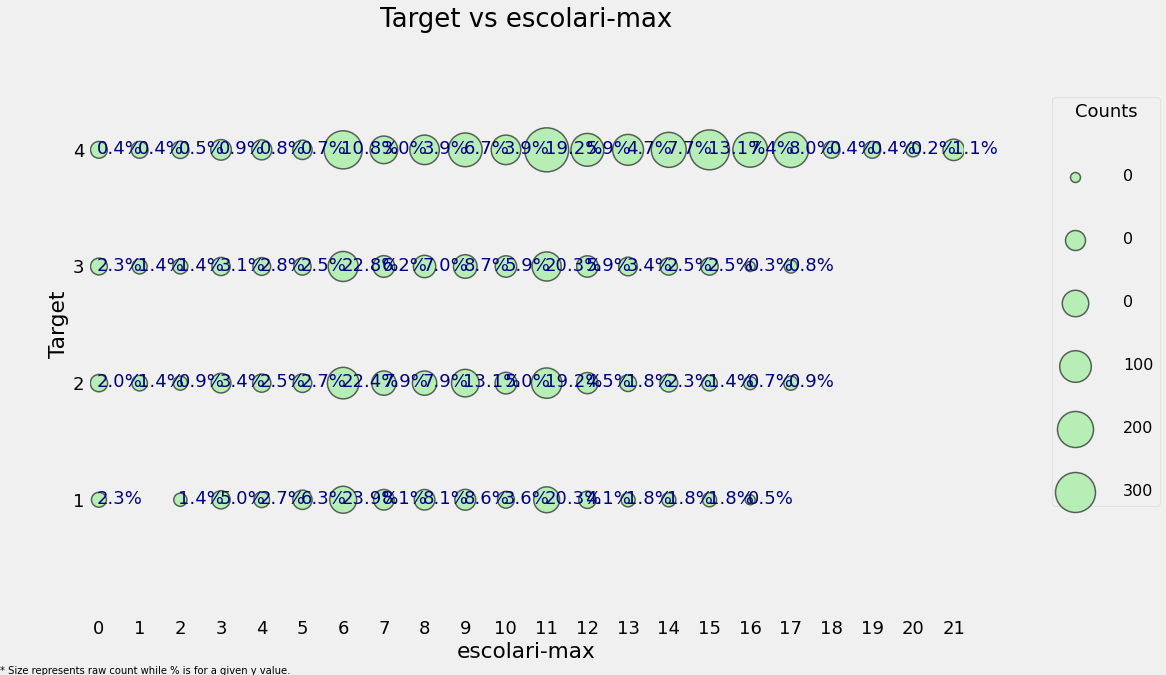

In [144]:
plot_categoricals('escolari-max', 'Target', final)

Text(0.5, 1.0, 'Max Schooling by Target ')

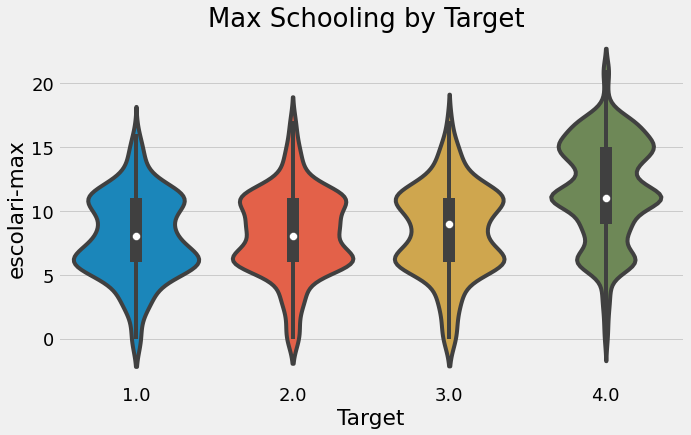

In [145]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Target', y = 'escolari-max', data=final)
plt.title('Max Schooling by Target ')

Text(0.5, 1.0, 'Max Schooling by Target')

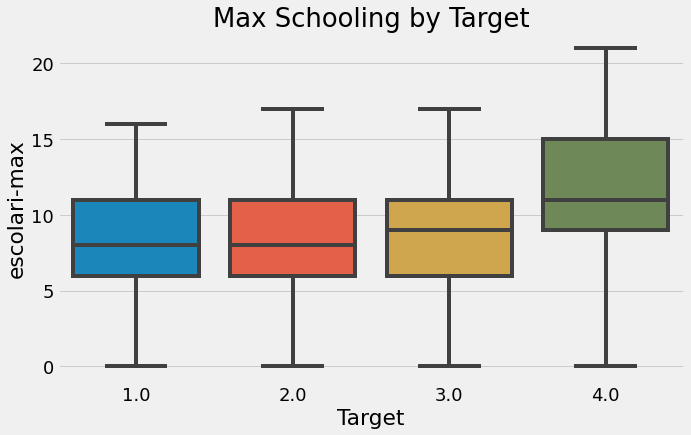

In [146]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y = 'escolari-max', data=final)
plt.title('Max Schooling by Target')

Text(0.5, 1.0, 'Average Schooling by Target')

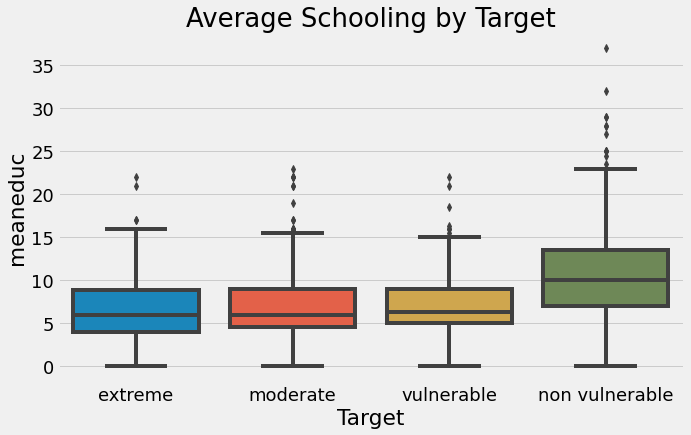

In [147]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y='meaneduc', data=final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.title('Average Schooling by Target')

Text(0.5, 1.0, 'Overcrowding by Target')

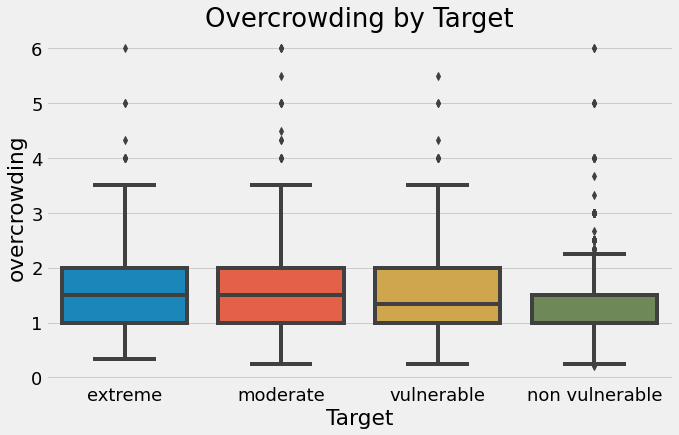

In [148]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y = 'overcrowding', data=final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.title('Overcrowding by Target')

One other feature that might be useful is the gender of the head of household.Since we aggregated the data . we'll have to go back to the individual level data and find the gender for the head of household.

In [149]:
head_gender = ind.loc[ind['parentesco1'] ==1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how='left').rename(columns={'female':'female-head'})

In [150]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

It looks like households where the head is female are slightly mpre likely to have a severe level of poverty.

Text(0.5, 1.0, 'Target by Female Head of Household')

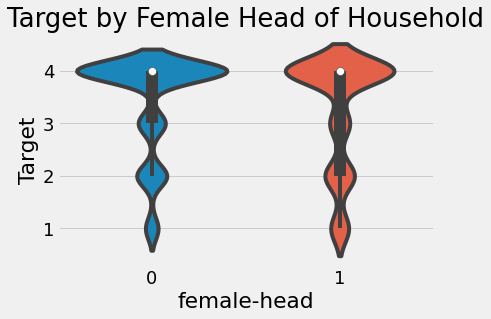

In [151]:
sns.violinplot(x='female-head', y = 'Target', data=final)
plt.title('Target by Female Head of Household')

We can also look at the difference in average education by whether or not the family has a female head of household.

Text(0.5, 1.0, 'Average Education by Target and Female Head of Household')

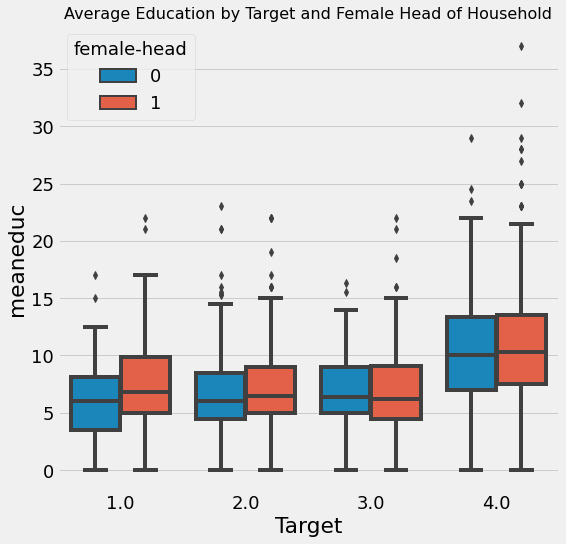

In [152]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Target', y = 'meaneduc', hue='female-head', data=final)
plt.title('Average Education by Target and Female Head of Household', size=16)

It looks like at every value of the Target, households with female heads have higher levels of education. Yet, we saw that overall, households with female heads are more likely to have severe poverty.

In [153]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

Overall, the average education of households with female heads is slightly higher than those with male heads. I'm not too sure what to make of this, but it seems right to me.

## Machine Learning Modeling 

Once feature engineering/construction is done, we can get started with the machine learning! All of our data (both training and testing) is aggregated for each household and so can be directly used in a model. To first show the process of modelling, we'll use the capable Random Forest Classifier in Scikit Learn. This probably won't get us to the top of the leaderboard, but it will allow us to establish abaseline. Later we;ll try several other models including the poerful Gradient Boosting Machine.

To assess our model, we'll use 10-fold cross validation on the training data. This will essentially train and test the model 10 times using different splits of the training data. 10-fold cross validation is an effective method for estimating the performance of a model on the test set. We want to look at the average performance in cross validation as well as the standard deviation to see how much scores changes between folds. We use the F1 Macro measure to evaluate performance.


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [155]:
# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average='macro')

In [156]:
# Labels for training

train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

In [157]:
# Extract training data

train_set = final[final['Target'].notnull()].drop(columns=['Id','idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns=['Id', 'idhogar', 'Target'])

In [158]:
# Submission base which is used for making submissions to the competition 

submission_base = test[['Id', 'idhogar']].copy()

Because we are going to be comparing different models, we want to scale the faetures (limit the range of each column to between 0 and 1). For many ensemble models this is not necessary, but when we use models that depend on a distance metric, such as KNearest Neighbours or the Support Vector Machine, feature scaling is an absolute necessity. when comparing different models, it's always safest to scale the features. We also impute the missing values with the median of the feature.

For imputing missing values and scaling the features in one step, we can make a pipeline. This will be fit on the training data and used to transform the training and test data.



In [159]:
features = list(train_set.columns)
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])

In [160]:
# Fit and transform training data

train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

The data has no missing values and is scaled between zero and one. This means it can directly used in any Scikit-Learn model.

In [161]:
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)

In [162]:
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv=10, scoring=scorer)

In [163]:
print(f'10 fold cross validation F1 score = {round(cv_score.mean(),4)} with std = {round(cv_score.std(),4)} ')

10 fold cross validation F1 score = 0.3408 with std = 0.0436 


That score is not great, but it will serve as a baseline and leaves us plenty of room to improve!

## Feature Importances

With a tree-based model, we can look at the feature importances which show a relative ranking of the usefulness of features in the model. These represent the sum of the reduction in impurity at nodes that used the variable for splitting, but we don't have to pay much attention to the absolute value. Instead we'll focus on relative scores.

If we want to view the feature importances, we'll have to train a model on the whole training set. Cross validation does not return the feature importances.


In [164]:
model.fit(train_set, train_labels)

RandomForestClassifier(n_jobs=-1, random_state=10)

In [165]:
# Feature importances into a dataframe

feature_importances = pd.DataFrame({'feature':features, 'importance':model.feature_importances_})

In [166]:
feature_importances.head()

feature  importance
0       hacdor    0.000824
1       hacapo    0.000376
2         v14a    0.000312
3       refrig    0.001608
4  paredblolad    0.006892

Below is short function we'll use to plot the feature importances. I use this function a lot and often copy and paste it between scripts. I hope documentation makes sense!

In [167]:
def plot_feature_importances(df, n=10, threshold=None):
    """Plots n most important features. 
    Also plots the cimulative importances if threshold is sopecified 
    and prints the number of features needed to reach threshold cumulative importance.
    
    Args:
        df(dataframe): Dataframe of feature importances. Columns must be "feature" and importances.
        
        n(int): Number of most important features to plot. Default is 15.
        
        threshold (float): Rhreshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
        Returns:
            df(Dataframe): Daraframe ordered by feature importances with a normalized column (sums to 1) and a cumulative importance column
 
         Note:
         
         * Normalization in this case means sum to 1
         * Cumulative importance is calculated by summing features from most to least important
         * A threshold of 0.9 will show the important features needed to reach 90% of cumulative importance
 """ 
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    
    df = df.sort_values('importance', ascending=False).reset_index(drop=True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importances
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most importsnt features
    
    df.loc[:n, :].plot.barh(y = 'importance_normalized', x = 'feature', color='darkgreen', edgecolor = 'k', figsize = (12,8), legend = False, linewidth=2)
    
    plt.xlabel('Normalized Importance', size=18)
    
    plt.ylabel('')
    
    plt.title(f'{n} Most Important Features', size=18)
    
    plt.gca().invert_yaxis()
   
    if threshold:
        
        # Cumulative importance plot
        
        plt.figure(figsize=(8,6))
        
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        
        plt.xlabel('Number of Features', size=16)
        
        plt.ylabel('Cumulative Importance', size=18)
        
        plt.title('Cumulative feature importance', size=18)
        
        # Number of features needed for threshold cumulative importance
        
        # This is the index (will need to add 1 for the actual number)
        
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Ass vertical line to plot
        
        plt.vlines(importance_index+1, ymin=0, ymax=1.05, linestyles='--', colors='red')
        
        plt.show()
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index+1, 100*threshold))
        
        return df

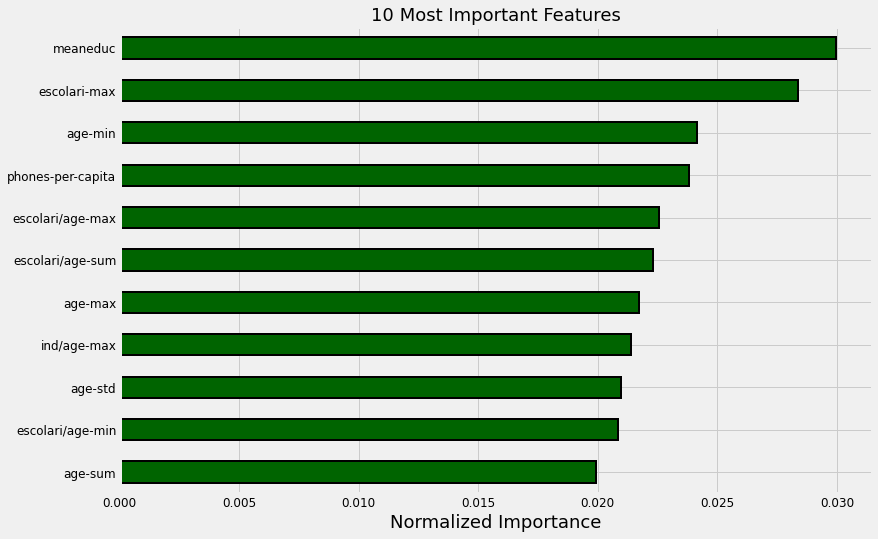

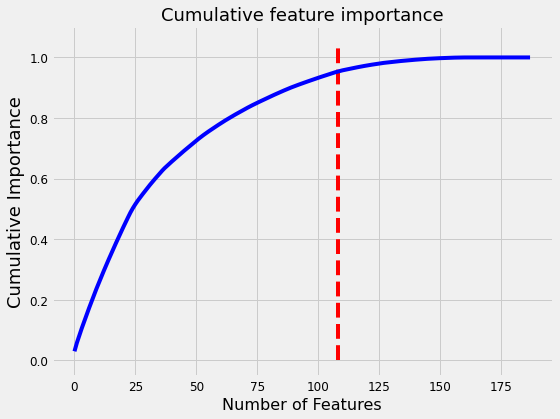

108 features required for 95% of cumulative importance.


In [168]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)


In [169]:
feature_importances

feature  importance
0         hacdor    0.000824
1         hacapo    0.000376
2           v14a    0.000312
3         refrig    0.001608
4    paredblolad    0.006892
..           ...         ...
183     tech-min    0.003716
184     tech-sum    0.007481
185     tech-std    0.000000
186  tech-range_    0.000000
187  female-head    0.004018

[188 rows x 2 columns]

### Education reigns supreme!

The most important variable is the average amount of education in the household, followed by the maximum education of anyone in the hoiusehold. I have suspicion these variables are highly correlated (collinear) which means we may want to remove one of them from the data. The other most important features are a combination of variables we created and variables that were already present in the data.

It's intresting that we only need 106 of the ~180 features to account for 90% of the importance. This tells us that we may be able to remove some of the features. However, feature importances don't tell us which direction of the feature is important (for example, we can't use these to tell whether ,ore or less education leads to more severe poverty) they only tell us which features the model considred relevent.

In [170]:
def kde_target(df, variable):
    """Plots the distribution of 'variable' in 'df' colored by the 'Target' column"""
    colors = {1: 'red', 2:'orange', 3:'blue', 4:'green'}
    plt.figure(figsize=(12,8))
    df = df[df['Target'].notnull()]
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), label=f'Poverty Level: {level}', color=colors[int(subset['Target'].unique())])
        plt.xlabel(variable)
        plt.ylabel('Density')
        plt.title('{} Distribution'.format(variable.capitalize()))

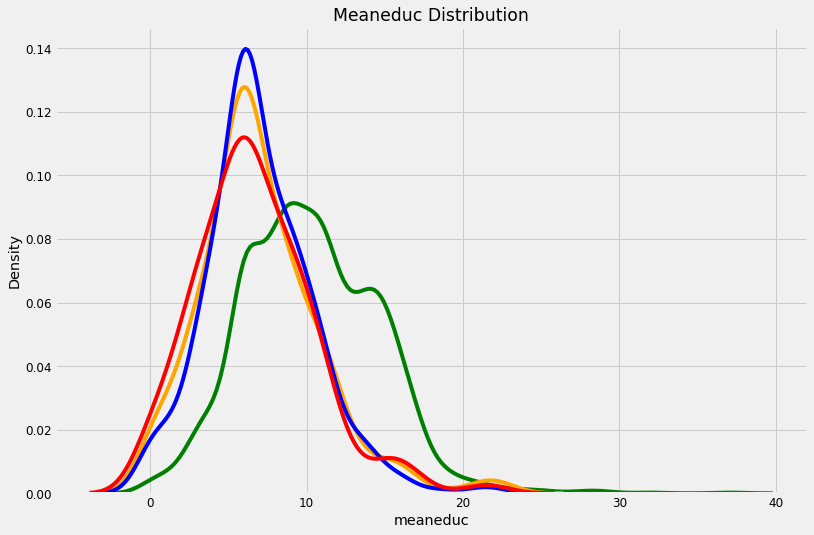

In [171]:
kde_target(final, 'meaneduc')

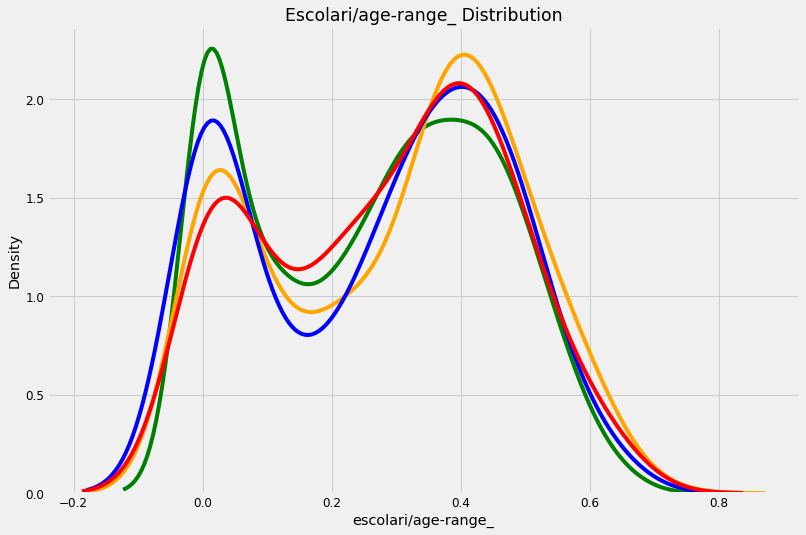

In [172]:
kde_target(final, 'escolari/age-range_')

## Model Selection

Now that we have a good set of features, it's time to get into the modelling. We already tried one basic model. the random Fortest Classifier which a best macro F1 of 0.35. Howevever, in machine learning, there is no way to know ahead of time which model will work best for a given datasety. The following plot shows that there are some problems where even Gaussian Naive Bayes will outperform a gradient boosting machine. This is from an excellent paper by Randal Olson that discusses many points of machine learning. 

What this plot tells us thay we have to try out a number of different models to see which is optimal. This will be pretty simple since we already write most of code. In addition to the Random Forest Classifier, we'll try eight other Scikit-Learn models. Luckily this dataset is relatively small and we can rapidly iterate through the models. We will make a dataframe to hold the results and the function will add a row to the dataframe for each model.

In [173]:
# Model imports

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [174]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models

warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Dataframe to hold results

model_results = pd.DataFrame(columns=['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    
    """Perform 10 fold cross validation of a model"""
    cv_scores = cross_val_score(model, train, train_labels, cv=10, scoring=scorer, n_jobs=-1)
    print(f'10 fold CV Score: {round(cv_scores.mean(),5)} with std: {round(cv_scores.std(),5)}')
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model':name, 'cv_mean':cv_scores.mean(), 'cv_std':cv_scores.std()}, index=[0]), ignore_index=True)
        return model_results
    

In [175]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 'LSVC', model_results)

10 fold CV Score: 0.27684 with std: 0.0409


That's one model to cross off the list (altough we didn't perform hyperparameter tuning so the actual performance could possibly be improved) 

In [176]:
model_results = cv_model(train_set, train_labels, GaussianNB(), 'GNB', model_results)

10 fold CV Score: 0.21036 with std: 0.04864


That performance is very poor, I don't think we need to revisit the Gaussian Naive Bayes method (although there are problems on which it can outperform the Gradient Boosting Machine).

In [177]:
model_results = cv_model(train_set, train_labels, MLPClassifier(hidden_layer_sizes=(32, 6, 4, 128, 64, 32)), 'MLP', model_results)

10 fold CV Score: 0.31391 with std: 0.06405


The multi-layer perceptron (a deep neural network) has decent performance. This might be an option if we are able to hyperparameterr tune the network. However, the limited amount of data could be an issue with a neural network as these generally require hundreds of thousands of examples to learn effectively.

In [178]:
model_results = cv_model(train_set, train_labels, LinearDiscriminantAnalysis(), 'LDA', model_results)

10 fold CV Score: 0.30937 with std: 0.05932


If you run LinearDiscriminantAnalysis without filtering out the UserWarnings, you get many messages saying Variables are collinear". This might give us a hint that we want to remove some collinear features! We might want to try this model again after removing the collinear variables becuase the score is coparable to random forest.

In [179]:
model_results = cv_model(train_set, train_labels, RidgeClassifierCV(), 'RIDGE', model_results)

10 fold CV Score: 0.27817 with std: 0.0289


The linear model (with ridge regularization) does surprisingly well. This might indicate that a simple model can go a long way in this problem (although we'll probably end up using a more powerful method).

In [180]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, KNeighborsClassifier(n_neighbors=n), f'knn-{n}', model_results)


KNN with 5 neighbors

10 fold CV Score: 0.31806 with std: 0.02473

KNN with 10 neighbors

10 fold CV Score: 0.29477 with std: 0.03907

KNN with 20 neighbors

10 fold CV Score: 0.27032 with std: 0.02286


As one more attempt, we'll consider the ExtraTreesCalssifier, a variant on the random forest using ensemble of decision trees as well.

In [181]:
from sklearn.ensemble import ExtraTreesClassifier

In [182]:
model_results = cv_model(train_set, train_labels, ExtraTreesClassifier(n_estimators=10), 'EXT', model_results)

10 fold CV Score: 0.33038 with std: 0.04064


## Comparing model performance

With the modelling resuls in a dataframe, we can plot them to see which model does the best.

In [183]:
model_results = cv_model(train_set, train_labels, RandomForestClassifier(100, random_state=10), 'RF', model_results)

10 fold CV Score: 0.3408 with std: 0.04358


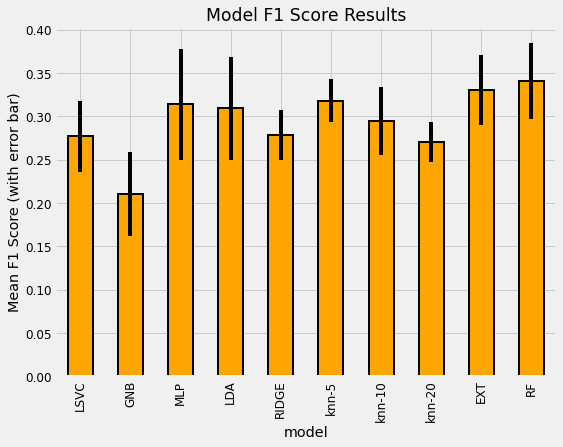

In [184]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6), yerr = list(model_results['cv_std']), edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

The most likely candidate seems to be the Random Forest because it does best right out of box. While we didn't tune any of the hyperparameters so the comparison between models is not perfect, these results reflect those of many other Kagglers finding that tree based ensemble methods (including the Gradient Boosting Machine) perform very well on structured dataset. Hyperparameter performance does improve the performance of machine learning models, but we don't have time to try all possible cobinations of settings for all models. The graph below (from the paper by Randal Olson) shows the effect of hyperparameter tuning versus the default values in Scikit-Learn.

In most of the cases the accuracy gain is less than 10% so the worst model is probably not suddenly going to become the best model through tuning.

For now we'll say the random forest does the best. Later we'll look at using the Gradient Voostiung Machine, although not implemented in Scikit Learn. nstead we'll be using the more powerful LightGBM version. Now, lety's turn to making a submission using the random forest.

## Making a submission

In order to make a submission, we need the test data. Fortunately, we have the test data formatted in exactly the same manner as the train data. 

The format of a testing submission is shown below. Although we are making predictions for each household, we actually need one row per individual (identified by Id) but only the prediction for each head of household is scored.

The submission base will have all the idividuals from test set since we have to have prediction for each individuals while the test ids will only have idhogar from head of household. when pdedicting, we only predict for each household and then we merge prediction dataframe with all of the individuals on the household id (idhogar). This will set Target to same value for each individual in a household. For the test household where is no head of household, we will set Target to 4 since they will not be scored.

In [185]:
test_ids = list(final.loc[final.Target.isnull(), 'idhogar'])

In [186]:
test_ids

['72958b30c',
 '5b598fbc9',
 '1e2fc704e',
 '8ee7365a8',
 'ff69a6fc8',
 'b61e2bb92',
 'a499b6c30',
 'f751b9e44',
 'ba1262b51',
 'd5a0a19d8',
 '23eb5e435',
 '8f4413ade',
 '304cd179b',
 '23f963963',
 '9538b192e',
 '0e00a3d3c',
 '384d00976',
 'c2174ada3',
 'a6af97626',
 '06ee76de7',
 'fe781ab4c',
 'a4093ed71',
 '8dbe90b40',
 '69347139f',
 '636f92294',
 'b2c65951a',
 '3a6ca02dd',
 'e1a795190',
 '055160255',
 '150fd037a',
 'e05a21cb5',
 '137122662',
 '6a2dfa0e3',
 'a82d6563d',
 '93ff04f7c',
 '0646ee008',
 'b0be92660',
 '3b7f14c45',
 'bbfbe0339',
 'ececa23e7',
 'cab4344e7',
 '832e39d14',
 '5fcfd9b47',
 'ef21f7423',
 'e071f34e4',
 '60c675743',
 'f6712efb7',
 '676124a21',
 '3ad7d0b26',
 'e4257bac8',
 'ee160f6a6',
 'f8af35afb',
 '781c59a43',
 '6544d3fe3',
 'c91689078',
 '184b7d1d3',
 'd6012cdec',
 'a5bd9acb7',
 'e98eb08d6',
 '393be4647',
 '75fcd5a5b',
 '667fcb6ec',
 '9f9318174',
 'ed2da70ca',
 '9e971cf5c',
 '29d9abb38',
 '1aef961bf',
 'd9b880f3f',
 '09bf160e0',
 'd135757d1',
 '340ece49b',
 '8586

The function below takes a model, traning set, test set and performs below operation.

1. Trains the model on traning set using fit

2. Makes predictions on test data using predict

3. Creates a submission dataset which can be saved and uploaded to competition

In [187]:
def submit(model, train, train_labels, test, test_ids):
    """Train and testa model on dataset"""
    #Train on data
    model.fit(train,train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar':test_ids, 'Target':predictions})
    # Make a submission dataframe
    submission = submission_base.merge(predictions, on='idhogar', how='left').drop(columns=['idhogar'])
    
    # FIll in household missing a target
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    return submission
    

Let's make submission throgh random forest

In [188]:
rf_submission = submit(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=10), train_set, train_labels, test_set, test_ids)
rf_submission.to_csv('rf_submission.csv', index=False)

These predictions sore 0.37 when submitted to competition

## Feature Selection

One potential method for modrl performance improvement is feature selection. This is the process where we try to keep only important feature of model.Most useful can mean manything and there are many important heuristic to select most important features. for feature selection in this notebook we will remove features with correlation greater than 0.95 (we already did some of these during feature engineering) and then we'll apply recursive feature elimination using sckit learn library.

First up correlation .95 is an arbitary threshold, feel free to change threshold and see how performance changes!

In [189]:
train_set = pd.DataFrame(train_set, columns=features)

In [190]:
train_set

hacdor  hacapo  v14a  refrig  paredblolad  paredzocalo  paredpreb  \
0        0.0     0.0   1.0     1.0          1.0          0.0        0.0   
1        0.0     0.0   1.0     1.0          0.0          0.0        0.0   
2        0.0     0.0   1.0     1.0          0.0          0.0        0.0   
3        0.0     0.0   1.0     1.0          1.0          0.0        0.0   
4        1.0     0.0   1.0     1.0          1.0          0.0        0.0   
...      ...     ...   ...     ...          ...          ...        ...   
2968     0.0     0.0   1.0     0.0          0.0          1.0        0.0   
2969     0.0     0.0   0.0     0.0          0.0          0.0        0.0   
2970     0.0     0.0   1.0     1.0          0.0          0.0        0.0   
2971     0.0     0.0   1.0     1.0          1.0          0.0        0.0   
2972     0.0     0.0   1.0     1.0          1.0          0.0        0.0   

      pisocemento  pareddes  paredmad  paredzinc  paredfibras  paredother  \
0             0.0       0.0       0.0        0.0          0.0         0.0   
1             0.0       0.0       1.0        0.0          0.0         0.0   
2             0.0       0.0       1.0        0.0          0.0         0.0   
3             0.0       0.0       0.0        0.0          0.0         0.0   
4             0.0       0.0       0.0        0.0          0.0         0.0   
...           ...       ...       ...        ...          ...         ...   
2968          1.0       0.0       0.0        0.0          0.0         0.0   
2969          0.0       0.0       1.0        0.0          0.0         0.0   
2970          1.0       0.0       1.0        0.0          0.0         0.0   
2971          0.0       0.0       0.0        0.0          0.0         0.0   
2972          1.0       0.0       0.0        0.0          0.0         0.0   

      pisomoscer  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  \
0            1.0        0.0        0.0          0.0         0.0        0.0   
1            0.0        0.0        0.0          0.0         1.0        1.0   
2            1.0        0.0        0.0          0.0         0.0        1.0   
3            1.0        0.0        0.0          0.0         0.0        1.0   
4            1.0        0.0        0.0          0.0         0.0        1.0   
...          ...        ...        ...          ...         ...        ...   
2968         0.0        0.0        0.0          0.0         0.0        1.0   
2969         0.0        0.0        0.0          0.0         1.0        1.0   
2970         0.0        0.0        0.0          0.0         0.0        1.0   
2971         1.0        0.0        0.0          0.0         0.0        1.0   
2972         0.0        0.0        0.0          0.0         0.0        1.0   

      techoentrepiso  techocane  techootro  cielorazo  abastaguadentro  \
0                1.0        0.0        0.0        1.0              1.0   
1                0.0        0.0        0.0        1.0              1.0   
2                0.0        0.0        0.0        1.0              1.0   
3                0.0        0.0        0.0        1.0              1.0   
4                0.0        0.0        0.0        1.0              1.0   
...              ...        ...        ...        ...              ...   
2968             0.0        0.0        0.0        0.0              0.0   
2969             0.0        0.0        0.0        0.0              0.0   
2970             0.0        0.0        0.0        0.0              1.0   
2971             0.0        0.0        0.0        1.0              1.0   
2972             0.0        0.0        0.0        1.0              1.0   

      abastaguafuera  abastaguano  sanitario1  sanitario2  sanitario3  \
0                0.0          0.0         0.0         1.0         0.0   
1                0.0          0.0         0.0         1.0         0.0   
2                0.0          0.0         0.0         1.0         0.0   
3                0.0          0.0         0.0         1.0     

In [191]:
# Create correlation matrix

corr_matrix = train_set.corr()

In [192]:
corr_matrix

hacdor    hacapo      v14a    refrig  paredblolad  paredzocalo  \
hacdor       1.000000  0.624324 -0.143713 -0.055073    -0.105112     0.053262   
hacapo       0.624324  1.000000 -0.154749 -0.062110    -0.092562     0.036795   
v14a        -0.143713 -0.154749  1.000000  0.192954     0.075308    -0.011317   
refrig      -0.055073 -0.062110  0.192954  1.000000     0.132905    -0.047555   
paredblolad -0.105112 -0.092562  0.075308  0.132905     1.000000    -0.358036   
...               ...       ...       ...       ...          ...          ...   
tech-min    -0.059901 -0.041400  0.065646  0.129736     0.179573    -0.077028   
tech-sum     0.100484  0.104126  0.043316  0.102734     0.081922    -0.050385   
tech-std          NaN       NaN       NaN       NaN          NaN          NaN   
tech-range_       NaN       NaN       NaN       NaN          NaN          NaN   
female-head  0.016057  0.012082  0.015084 -0.002732    -0.013794    -0.036984   

             paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
hacdor       -0.021422     0.060396  0.139910  0.072131   0.101985   
hacapo       -0.020661     0.062616  0.124520  0.066715   0.111904   
v14a          0.001342    -0.015043 -0.188425 -0.057004   0.007657   
refrig        0.019826    -0.077232 -0.135424 -0.134043  -0.056640   
paredblolad  -0.584424    -0.250219 -0.113595 -0.442534  -0.124543   
...                ...          ...       ...       ...        ...   
tech-min     -0.073617    -0.142979 -0.072924 -0.098768  -0.002590   
tech-sum     -0.024652    -0.053752 -0.031418 -0.053704   0.033984   
tech-std           NaN          NaN       NaN       NaN        NaN   
tech-range_        NaN          NaN       NaN       NaN        NaN   
female-head   0.031713     0.032627  0.039403 -0.007834   0.015616   

             paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
hacdor         -0.006039   -0.005401   -0.130923  -0.003818   0.068883   
hacapo         -0.004544   -0.004064   -0.124567  -0.002873  -0.003519   
v14a            0.003113    0.002784    0.098117   0.001968  -0.138091   
refrig          0.009158    0.008190    0.169081   0.005789  -0.042751   
paredblolad    -0.050630   -0.045277    0.402022  -0.005486  -0.039205   
...                  ...         ...         ...        ...        ...   
tech-min        0.001806   -0.013726    0.172976   0.017407  -0.011885   
tech-sum       -0.007583   -0.005347    0.067552   0.026656  -0.006701   
tech-std             NaN         NaN         NaN        NaN        NaN   
tech-range_          NaN         NaN         NaN        NaN        NaN   
female-head     0.034383    0.008184   -0.024048  -0.020798   0.017941   

             pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
hacdor          0.191171    0.045614  -0.037777       -0.021824  -0.008108   
hacapo          0.206423    0.032552  -0.048015       -0.016422  -0.006101   
v14a           -0.070795   -0.105688   0.085378        0.011248   0.004179   
refrig         -0.115489   -0.125656   0.029148        0.022193   0.012295   
paredblolad    -0.140360   -0.255672  -0.004830        0.058654   0.007123   
...                  ...         ...        ...             ...        ...   
tech-min       -0.048807   -0.059689   0.034144       -0.007034   0.004984   
tech-sum        0.015039   -0.043998   0.044261       -0.045167   0.009929   
tech-std             NaN         NaN        NaN             NaN        NaN   
tech-range_          NaN         NaN        NaN             NaN        NaN   
female-head     0.000828   -0.010201  -0.039462        0.028323   0.006013   

             techootro  cielorazo  abastaguadentro  abastaguafuera  \
hacdor       -0.007148  -0.134352        -0.051855        0.058215   
hacapo       -0.005379  -0.125825        -0.048910        0.054289   
v14a          0.003684   0.084577         0.186949       -0.173224   
refrig        0.010840   0.162789         0.137173       -0.093677   
paredblolad  -0.003178   

In [193]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [194]:
upper

hacdor    hacapo      v14a    refrig  paredblolad  paredzocalo  \
hacdor          NaN  0.624324 -0.143713 -0.055073    -0.105112     0.053262   
hacapo          NaN       NaN -0.154749 -0.062110    -0.092562     0.036795   
v14a            NaN       NaN       NaN  0.192954     0.075308    -0.011317   
refrig          NaN       NaN       NaN       NaN     0.132905    -0.047555   
paredblolad     NaN       NaN       NaN       NaN          NaN    -0.358036   
...             ...       ...       ...       ...          ...          ...   
tech-min        NaN       NaN       NaN       NaN          NaN          NaN   
tech-sum        NaN       NaN       NaN       NaN          NaN          NaN   
tech-std        NaN       NaN       NaN       NaN          NaN          NaN   
tech-range_     NaN       NaN       NaN       NaN          NaN          NaN   
female-head     NaN       NaN       NaN       NaN          NaN          NaN   

             paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
hacdor       -0.021422     0.060396  0.139910  0.072131   0.101985   
hacapo       -0.020661     0.062616  0.124520  0.066715   0.111904   
v14a          0.001342    -0.015043 -0.188425 -0.057004   0.007657   
refrig        0.019826    -0.077232 -0.135424 -0.134043  -0.056640   
paredblolad  -0.584424    -0.250219 -0.113595 -0.442534  -0.124543   
...                ...          ...       ...       ...        ...   
tech-min           NaN          NaN       NaN       NaN        NaN   
tech-sum           NaN          NaN       NaN       NaN        NaN   
tech-std           NaN          NaN       NaN       NaN        NaN   
tech-range_        NaN          NaN       NaN       NaN        NaN   
female-head        NaN          NaN       NaN       NaN        NaN   

             paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
hacdor         -0.006039   -0.005401   -0.130923  -0.003818   0.068883   
hacapo         -0.004544   -0.004064   -0.124567  -0.002873  -0.003519   
v14a            0.003113    0.002784    0.098117   0.001968  -0.138091   
refrig          0.009158    0.008190    0.169081   0.005789  -0.042751   
paredblolad    -0.050630   -0.045277    0.402022  -0.005486  -0.039205   
...                  ...         ...         ...        ...        ...   
tech-min             NaN         NaN         NaN        NaN        NaN   
tech-sum             NaN         NaN         NaN        NaN        NaN   
tech-std             NaN         NaN         NaN        NaN        NaN   
tech-range_          NaN         NaN         NaN        NaN        NaN   
female-head          NaN         NaN         NaN        NaN        NaN   

             pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
hacdor          0.191171    0.045614  -0.037777       -0.021824  -0.008108   
hacapo          0.206423    0.032552  -0.048015       -0.016422  -0.006101   
v14a           -0.070795   -0.105688   0.085378        0.011248   0.004179   
refrig         -0.115489   -0.125656   0.029148        0.022193   0.012295   
paredblolad    -0.140360   -0.255672  -0.004830        0.058654   0.007123   
...                  ...         ...        ...             ...        ...   
tech-min             NaN         NaN        NaN             NaN        NaN   
tech-sum             NaN         NaN        NaN             NaN        NaN   
tech-std             NaN         NaN        NaN             NaN        NaN   
tech-range_          NaN         NaN        NaN             NaN        NaN   
female-head          NaN         NaN        NaN             NaN        NaN   

             techootro  cielorazo  abastaguadentro  abastaguafuera  \
hacdor       -0.007148  -0.134352        -0.051855        0.058215   
hacapo       -0.005379  -0.125825        -0.048910        0.054289   
v14a          0.003684   0.084577         0.186949       -0.173224   
refrig        0.010840   0.162789         0.137173       -0.093677   
paredblolad  -0.003178   0.372710         0.125

In [195]:
# Find index of feature columns with index greater than .95

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

In [196]:
to_drop

['v18q-count', 'female-sum']

In [197]:
train_set = train_set.drop(columns=to_drop)

In [198]:
train_set

hacdor  hacapo  v14a  refrig  paredblolad  paredzocalo  paredpreb  \
0        0.0     0.0   1.0     1.0          1.0          0.0        0.0   
1        0.0     0.0   1.0     1.0          0.0          0.0        0.0   
2        0.0     0.0   1.0     1.0          0.0          0.0        0.0   
3        0.0     0.0   1.0     1.0          1.0          0.0        0.0   
4        1.0     0.0   1.0     1.0          1.0          0.0        0.0   
...      ...     ...   ...     ...          ...          ...        ...   
2968     0.0     0.0   1.0     0.0          0.0          1.0        0.0   
2969     0.0     0.0   0.0     0.0          0.0          0.0        0.0   
2970     0.0     0.0   1.0     1.0          0.0          0.0        0.0   
2971     0.0     0.0   1.0     1.0          1.0          0.0        0.0   
2972     0.0     0.0   1.0     1.0          1.0          0.0        0.0   

      pisocemento  pareddes  paredmad  paredzinc  paredfibras  paredother  \
0             0.0       0.0       0.0        0.0          0.0         0.0   
1             0.0       0.0       1.0        0.0          0.0         0.0   
2             0.0       0.0       1.0        0.0          0.0         0.0   
3             0.0       0.0       0.0        0.0          0.0         0.0   
4             0.0       0.0       0.0        0.0          0.0         0.0   
...           ...       ...       ...        ...          ...         ...   
2968          1.0       0.0       0.0        0.0          0.0         0.0   
2969          0.0       0.0       1.0        0.0          0.0         0.0   
2970          1.0       0.0       1.0        0.0          0.0         0.0   
2971          0.0       0.0       0.0        0.0          0.0         0.0   
2972          1.0       0.0       0.0        0.0          0.0         0.0   

      pisomoscer  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  \
0            1.0        0.0        0.0          0.0         0.0        0.0   
1            0.0        0.0        0.0          0.0         1.0        1.0   
2            1.0        0.0        0.0          0.0         0.0        1.0   
3            1.0        0.0        0.0          0.0         0.0        1.0   
4            1.0        0.0        0.0          0.0         0.0        1.0   
...          ...        ...        ...          ...         ...        ...   
2968         0.0        0.0        0.0          0.0         0.0        1.0   
2969         0.0        0.0        0.0          0.0         1.0        1.0   
2970         0.0        0.0        0.0          0.0         0.0        1.0   
2971         1.0        0.0        0.0          0.0         0.0        1.0   
2972         0.0        0.0        0.0          0.0         0.0        1.0   

      techoentrepiso  techocane  techootro  cielorazo  abastaguadentro  \
0                1.0        0.0        0.0        1.0              1.0   
1                0.0        0.0        0.0        1.0              1.0   
2                0.0        0.0        0.0        1.0              1.0   
3                0.0        0.0        0.0        1.0              1.0   
4                0.0        0.0        0.0        1.0              1.0   
...              ...        ...        ...        ...              ...   
2968             0.0        0.0        0.0        0.0              0.0   
2969             0.0        0.0        0.0        0.0              0.0   
2970             0.0        0.0        0.0        0.0              1.0   
2971             0.0        0.0        0.0        1.0              1.0   
2972             0.0        0.0        0.0        1.0              1.0   

      abastaguafuera  abastaguano  sanitario1  sanitario2  sanitario3  \
0                0.0          0.0         0.0         1.0         0.0   
1                0.0          0.0         0.0         1.0         0.0   
2                0.0          0.0         0.0         1.0         0.0   
3                0.0          0.0         0.0         1.0     

In [199]:
test_set =  pd.DataFrame(test_set, columns=features)

In [200]:
test_set.shape

(7334, 188)

In [201]:
train_set, test_set = train_set.align(test_set, axis=1, join='inner')

In [202]:
test_set.shape, train_set.shape

((7334, 186), (2973, 186))

In [203]:
features = list(train_set.columns)

In [204]:
features

['hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pisocemento',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'tipovivi1',
 'tipovivi2',
 'tipovivi3',
 'tipovivi4',
 'tipovivi5',
 'computer',
 'television',
 'lugar1',
 'lugar2',
 'lugar3',
 'lugar4',
 'lugar5',
 'lugar6',
 'area1',
 'v2a1-missing',
 'v2a1',
 'dependency',
 'edjefe',
 'edjefa',
 'meaneduc',
 'overcrowding',
 'rooms',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'v18q1',
 'tamviv',
 'hhsize',
 'hogar_n

## Recursive feature elimination with Random Forest

The RFECV in sklearn stands for Recursive Feature Elimination with Cross Validation. The selector operates with a feature in iterative manner. At each iteration it removes a fraction of features ot a set number of features. The iterations continues until cross validation score no longer improves. 

To create a selector object we pass in a model, the number of features to remove at each iteration, the cross validation fold, out custom scorer, and any other parameters to guide selection.

In [205]:
from sklearn.feature_selection import RFECV

In [206]:
# Create a model for feature selection

estimator = RandomForestClassifier(random_state=10, n_estimators=100 , n_jobs=-1 )

In [207]:
# create the object

selector = RFECV(estimator, step=1, cv=3,scoring=scorer, n_jobs=-1)

Then we fit selector on the training data as with other sklearn model. this will continue feature selection until cross validation score does not improve.

In [208]:
selector.fit(train_set, train_labels)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

We can investigate the object to see training accuracy of each iteration. The following code will plot the validation score versus number of features selected for training.

In [209]:
selector.grid_scores_

array([0.23345444, 0.24793416, 0.26625159, 0.29557257, 0.30511925,
       0.30743549, 0.30275409, 0.30590529, 0.31827596, 0.31850599,
       0.3190952 , 0.32120738, 0.3104973 , 0.31722428, 0.31305583,
       0.30836954, 0.3102667 , 0.32130255, 0.32301622, 0.32449014,
       0.31614341, 0.32495855, 0.32476026, 0.32270227, 0.32013113,
       0.33123444, 0.32961102, 0.31716422, 0.32986824, 0.32734505,
       0.31914944, 0.32082108, 0.32881814, 0.32908174, 0.31830935,
       0.31559877, 0.320933  , 0.32218465, 0.32620751, 0.32092313,
       0.32184564, 0.3304741 , 0.32937414, 0.33408705, 0.33900355,
       0.32250168, 0.32745267, 0.3222697 , 0.32805193, 0.33108903,
       0.32679452, 0.33741347, 0.33903865, 0.33066956, 0.33992614,
       0.32851855, 0.3385001 , 0.33351781, 0.33376909, 0.32770764,
       0.33339306, 0.33338737, 0.33905936, 0.32820232, 0.33472505,
       0.33390253, 0.33361484, 0.32940868, 0.34399619, 0.33336897,
       0.32470142, 0.34586955, 0.32849375, 0.34039187, 0.32606

72

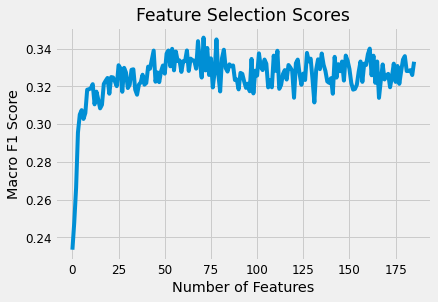

In [210]:
plt.plot(selector.grid_scores_)
plt.xlabel('Number of Features')
plt.ylabel('Macro F1 Score')
plt.title('Feature Selection Scores')
selector.n_features_

As we can see scores improves as we add features up until 96 features. According to the selector this is the optimal number of features. 

The ranking of each feature can be inspected using trained object. This essentially represents the importance of features averaged over the iteration. Features can share same ranking and only features with rank of 1 are retained.

In [211]:
rankings = pd.DataFrame({'features':list(train_set.columns), 'rank':list(selector.ranking_)}).sort_values('rank')

In [212]:
rankings

features  rank
101        female-std     1
116  estadocivil5-sum     1
105  estadocivil1-sum     1
82              walls     1
48             lugar1     1
..                ...   ...
149  parentesco11-min   111
40          elimbasu6   112
144   parentesco9-min   113
126   parentesco2-min   114
135   parentesco5-min   115

[186 rows x 2 columns]

Finally, we select features and then evaluate cross validation

In [213]:
train_selected = selector.transform(train_set)

In [214]:
test_selected = selector.transform(test_set)

In [215]:
train_selected.shape, test_selected.shape

((2973, 72), (7334, 72))

In [216]:
# Convert back to dataframe

selected_features = train_set.columns[np.where(selector.ranking_==1)]

In [217]:
selected_features

Index(['paredblolad', 'paredpreb', 'pisomoscer', 'cielorazo', 'energcocinar2',
       'energcocinar3', 'lugar1', 'area1', 'v2a1', 'dependency', 'edjefe',
       'edjefa', 'meaneduc', 'overcrowding', 'rooms', 'r4h2', 'r4h3', 'r4m1',
       'r4m2', 'r4m3', 'r4t1', 'r4t2', 'tamviv', 'hhsize', 'hogar_nin',
       'hogar_adul', 'bedrooms', 'qmobilephone', 'walls', 'roof', 'floor',
       'walls+roof+floor', 'warning', 'bonus', 'phones-per-capita',
       'tablets-per-capita', 'rooms-per-capita', 'rent-per-capita', 'dis-max',
       'dis-sum', 'female-std', 'estadocivil1-sum', 'estadocivil5-sum',
       'estadocivil7-sum', 'estadocivil7-std', 'parentesco1-std',
       'parentesco2-std', 'parentesco3-sum', 'rez_esc-max', 'escolari-min',
       'escolari-max', 'escolari-sum', 'escolari-std', 'escolari-range_',
       'age-min', 'age-max', 'age-sum', 'age-std', 'age-range_', 'inst-max',
       'inst-std', 'inst-range_', 'escolari/age-min', 'escolari/age-max',
       'escolari/age-sum', 'escolar

In [218]:
train_selected = pd.DataFrame(train_selected, columns=selected_features)
test_selected = pd.DataFrame(test_selected, columns=selected_features)

In [219]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 fold CV Score: 0.35458 with std: 0.04355


In [220]:
model_results

model   cv_mean    cv_std
0     LSVC  0.276842  0.040896
1      GNB  0.210355  0.048641
2      MLP  0.313909  0.064045
3      LDA  0.309372  0.059324
4    RIDGE  0.278168  0.028898
5    knn-5  0.318062  0.024728
6   knn-10  0.294769  0.039073
7   knn-20  0.270316  0.022861
8      EXT  0.330382  0.040642
9       RF  0.340803  0.043577
10  RF-SEL  0.354584  0.043549

In [221]:
model_results.set_index('model', inplace=True)

In [222]:
model_results

cv_mean    cv_std
model                     
LSVC    0.276842  0.040896
GNB     0.210355  0.048641
MLP     0.313909  0.064045
LDA     0.309372  0.059324
RIDGE   0.278168  0.028898
knn-5   0.318062  0.024728
knn-10  0.294769  0.039073
knn-20  0.270316  0.022861
EXT     0.330382  0.040642
RF      0.340803  0.043577
RF-SEL  0.354584  0.043549

Text(0, 0.5, 'Mean F1 Score (with error bar)')

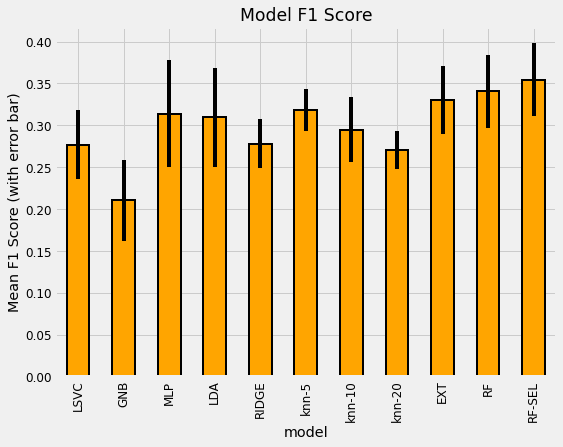

In [223]:
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6), yerr=list(model_results['cv_std']), edgecolor='k', linewidth=2)
plt.title('Model F1 Score')
plt.ylabel('Mean F1 Score (with error bar)')


In [224]:
model_results.reset_index(inplace=True)

In [225]:
model_results

model   cv_mean    cv_std
0     LSVC  0.276842  0.040896
1      GNB  0.210355  0.048641
2      MLP  0.313909  0.064045
3      LDA  0.309372  0.059324
4    RIDGE  0.278168  0.028898
5    knn-5  0.318062  0.024728
6   knn-10  0.294769  0.039073
7   knn-20  0.270316  0.022861
8      EXT  0.330382  0.040642
9       RF  0.340803  0.043577
10  RF-SEL  0.354584  0.043549

The model with selected features does slightly better in cross validation. We can keep both set of features for for next model Gradient Boosting Machine.

## Upgrading our model: Gradient Boosting Machine

After using Random Forest and getting decent score, it's time to step up and gradient boosting machine. If you spend time on kaggle you will notice that GBM wins a high percentage of competition where data is structured (in tables) and number of records are not that large (less than a million observation).

I will not go in too much detail, but instead focus on implementation. We'll use GBM in LightGBM, although there are options in scikit-learn XGBOOST, CATBOOST. The first set of parameters we will use were bsed on those I have found have worked well for other problems. 


### Choosing number of estimators using early stopping

To choose number of estimators (number of trees in ensemble, called n_estimator or num boost rounds) we'll use early stopping with 5 fold cross validation. This will keep adding estimators until the performance as measured by Macro F1 Score does not increase for 100 training rounds. To use this metric, we will have to define a custom metric.


In [226]:
def macro_f1_score(labels, predictions):
    # Reshape the predictions as needed
    
    predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis=0)
    metric_value = f1_score(labels, predictions, average='macro')
    # Return name, value, is_higher better
    return 'macro_f1', metric_value, True

## Light GBM implementation

The function below implements training gradient bossting machine with Stratified KFold validation and early stopping to prevent overfitting to training data (though it can still occur). The function performs training with cross validation and records predictiins in probability for each fold. To see how this works, we can return predictions from each fold and then we will return a submission to upload to competition.

Choosing hyperparameter for gradient boost can be tough and generally done through model optimization. In this notebook we will use set of parameters works well with previous problem statement (although they will not necessaroly traslate to this problem ststement). 

We set the n_estimators to 10000 but dont actually reach to this number because we are using early stopping which will quit training estimators when cross validation metric does not improve for early_stopping_rounds. There is lot going in this function, and read through it carefully to make sure you have it all! I have tried to make comments and code srrightforward. (The display is used to show custom information during in comination with %%capture so don't have to see all the LightGBM infomation during the training).

In [227]:
from sklearn.model_selection import StratifiedKFold


In [228]:
!pip install lightgbm
import lightgbm as lgb

In [229]:
from IPython.display import display

In [230]:
def model_gbm(features, labels, test_features, test_ids, nfolds=5, return_preds=False, hyp=None):
    """Model using GBM and cross validation.
        Trains with early stopping on each fold.
        Hyperparameters probably needs to be tuned.
    """
    feature_names = list(features.columns)
    # OPtion for user hyperparameter
    if hyp is not None:
        # Using early stopping so do not need of number of estimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
        
    else:
        # Model hyperparameters
        params = {'boosting_type':'dart', 'colsample_bytree':0.88, 'learning_rate':0.028, 'min_child_samples':10, 'num_leaves':36, 'reg_alpha':0.76, 'reg_lambda':0.43, 'subsample_for_bin':40000, 'subsample':0.54,'class_weight':'balanced'}
        
    # Build model
    model = lgb.LGBMClassifier(**params, objective='multiclass', n_jobs=-1, n_estimators=10000, random_state=10)
    
    # Using stratified KFold cross validation
    
    strkfokd = StratifiedKFold(n_splits=nfolds, shuffle=True)
    
    # Hold all predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
     
    # Covert to array for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1))
    
    valid_scores = []
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfokd.split(features, labels)):
        # Dataframe for fold prediction
        fold_predictions = pd.DataFrame()
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds=100, 
                  eval_metric = macro_f1_score,
                  eval_set=[(X_train, y_train),(X_valid, y_valid)], eval_names = ['train', 'valid'], verbose=200)
        
        # Record validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        # Make predictiions from fold as probability
        fold_probability = model.predict_proba(test_features)
        
        # Record each preiction for each class in a separate column'
        for j in range(4):
            fold_predictions[(j+1)] = fold_probability[:,j]
            
        # Add needed information for prediction
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        # Add predictions as a new row to existing prediction
        predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds
        
        # Display fold informationfe
        display(f'Fold {i+1}, Validation Score: {round(valid_scores[i],5)}, Estimators Trained: {model.best_iteration_}')
        
    # Feature importances Dataframe
    feature_importances = pd.DataFrame({'feature':feature_names, 'importance':importances})
    
    valid_scores = np.array(valid_scores)
    
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(),5)} with std: {round(valid_scores.std(),5)}.')
    
    # If we want to examine predictions do not average over folds
    
    if return_preds:
        predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis=1)
        predictions['confidence'] = predictions[[1,2,3,4]].max(axis=1)
        return predictions, feature_importances
    
    # Average Predictions over folds
    
    predictions = predictions.groupby('idhogar', as_index=False).mean()
    
    # Find the class and associated probability
    
    predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis=1)
    predictions['confidence'] = predictions[[1,2,3,4]].max(axis=1)
    predictions = predictions.drop(columns=['fold'])

    # Merge with base to have one prediction for each individual
    
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on='idhogar', how='left').drop(columns=['idhogar'])
    
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # Return the submission and feature importances along with validation scores
    
    return submission, feature_importances, valid_scores
    

### Cross Validation with Early Stopping Notes

Cross Validation with Early stopping is one of the most effective method for preventing overfitting on training data because it prevents us from continuing to add model complexity once it's clear that validation scores are not improving. REpeating this process across multiple folds helps to reduce bias that comes from using a single fold. Early stopping also helps us to train model much quicker. overall, early stopping with cross validation is best method to select number of estimators in GBM and should be our default technique when we design an implementation.

In [231]:
%%capture --no-display


predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

'Fold 1, Validation Score: 0.39874, Estimators Trained: None'

'Fold 2, Validation Score: 0.42448, Estimators Trained: None'

'Fold 3, Validation Score: 0.35952, Estimators Trained: None'

'Fold 4, Validation Score: 0.38656, Estimators Trained: None'

'Fold 5, Validation Score: 0.38275, Estimators Trained: None'

'5 cross validation score: 0.39041 with std: 0.02125.'

Power of GBM can be seen here. cross validation blows away anthing with previously did.

Let's take a look at the predictions to understand what is going on with with predictions in each fold.


In [232]:
predictions.head()

1         2         3         4    idhogar  fold  Target  confidence
0  0.000293  0.000235  0.003176  0.996296  72958b30c     1       4    0.996296
1  0.045455  0.002926  0.001577  0.950041  5b598fbc9     1       4    0.950041
2  0.005763  0.090717  0.052399  0.851121  1e2fc704e     1       4    0.851121
3  0.000730  0.000803  0.000489  0.997978  8ee7365a8     1       4    0.997978
4  0.004068  0.006367  0.008344  0.981221  ff69a6fc8     1       4    0.981221

For each fold, 1, 2, 3, 4 columns represent the probability for each Target. The Target is maximum of these with confidence the probability. we've the predictions for all 5 folds, so we can plot the confidence in each target for the different folds.

Text(0.5, 1.05, 'Distribution of confidence by Fold and Target')

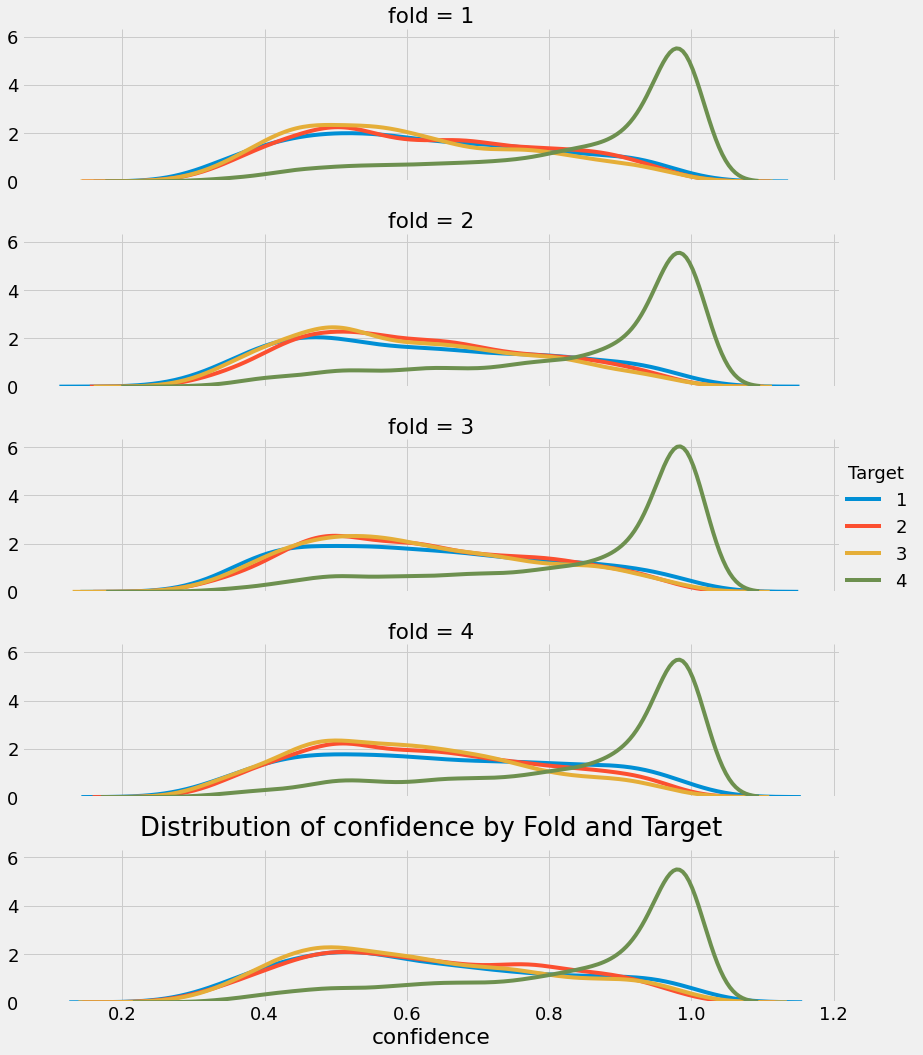

In [233]:
plt.rcParams['font.size'] = 18

# KDEPlot

g = sns.FacetGrid(predictions, row='fold', hue='Target', size=3, aspect=4)
g.map(sns.kdeplot,'confidence')
g.add_legend()
plt.title('Distribution of confidence by Fold and Target', y=1.05)


In [234]:
gbm_fi

feature  importance
0         hacdor       331.6
1         hacapo        17.0
2           v14a         8.0
3         refrig       480.6
4    paredblolad      3635.0
..           ...         ...
181     tech-min       205.0
182     tech-sum      5685.6
183     tech-std         0.0
184  tech-range_         0.0
185  female-head       213.8

[186 rows x 2 columns]

What we see here is that the confidence of each class is relatively low. It does appear that modrl has greater confidence in target = 4 predictions. which makes sense because  of the class imbalance and the high prevalance of this label. 

Another way to look at this information is as violinplot. This shows the same information, with the number of observations related to the width of plot.

<AxesSubplot:xlabel='Target', ylabel='confidence'>

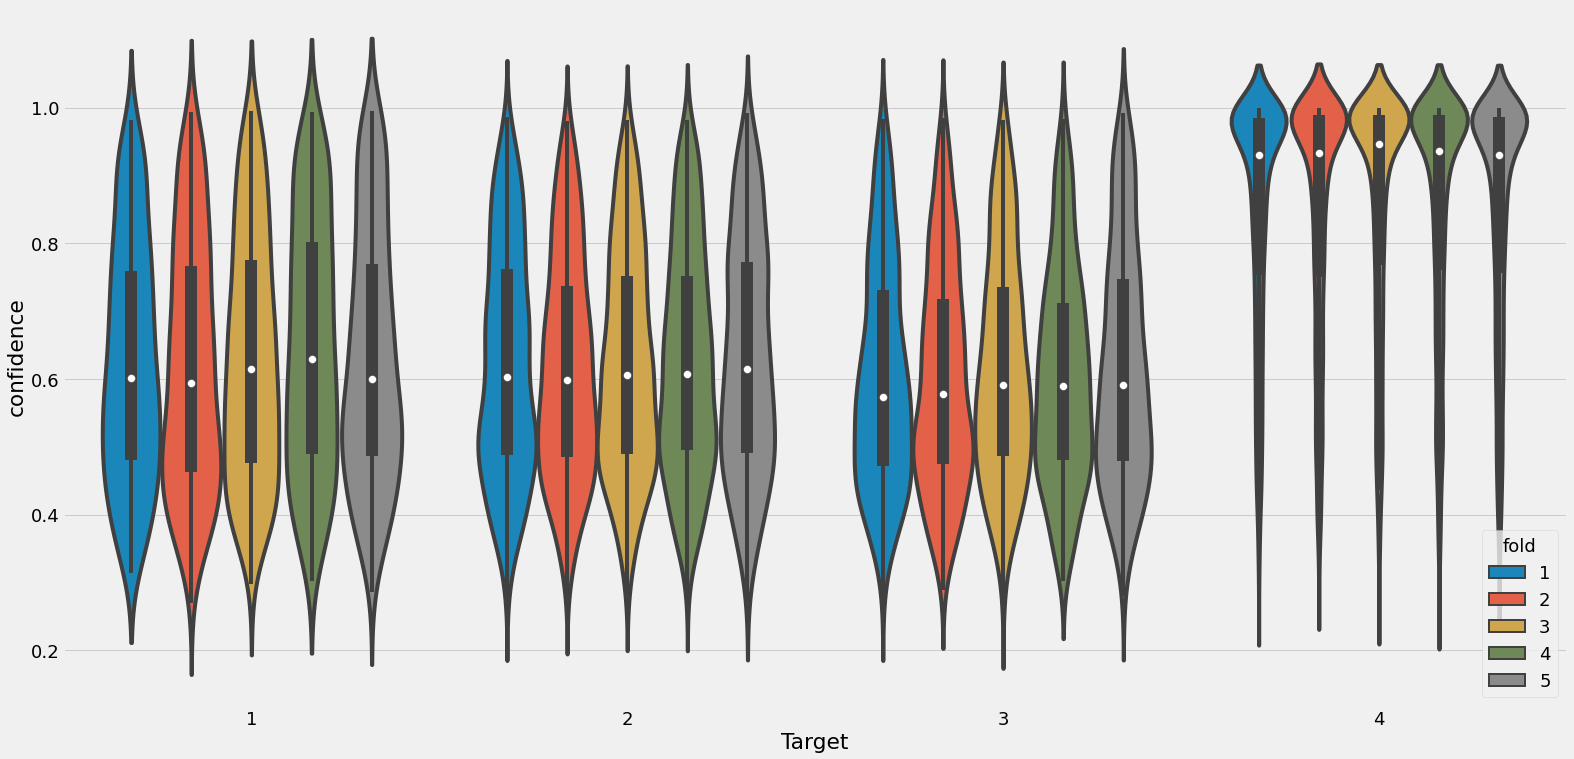

In [235]:
plt.figure(figsize=(24,12))
sns.violinplot(x='Target', y='confidence', hue='fold', data=predictions)

Overall, these results show the issues with imbalanced class problem: our model can not distinguish very well between the classes that are underrepresented. later we'll look at predtictions themselves to understand where our model is confused. for now we can generate a submission file and submit it to competition. 

When we actually make prediction for each household, we average predictions from each folds. Therefore we are essentially using different models since each one is trained on essentially different fold of data. GBM is already an ensemble learning model, and now we are using it as almost meta-ensemble model by averaging predictions from several GBMs.

This process is shown in below code.

Text(0.5, 1.0, 'Confidence by Target')

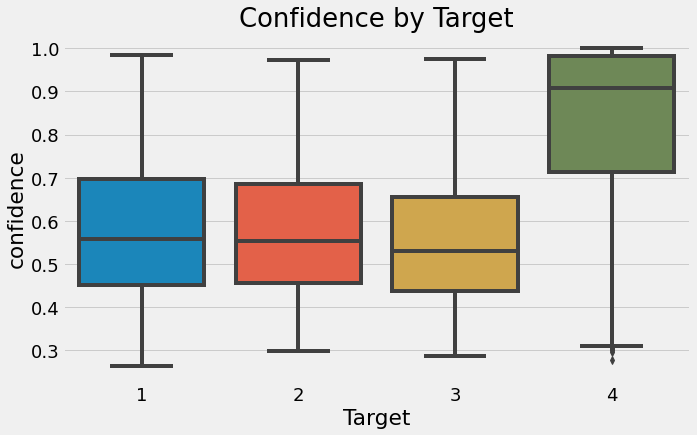

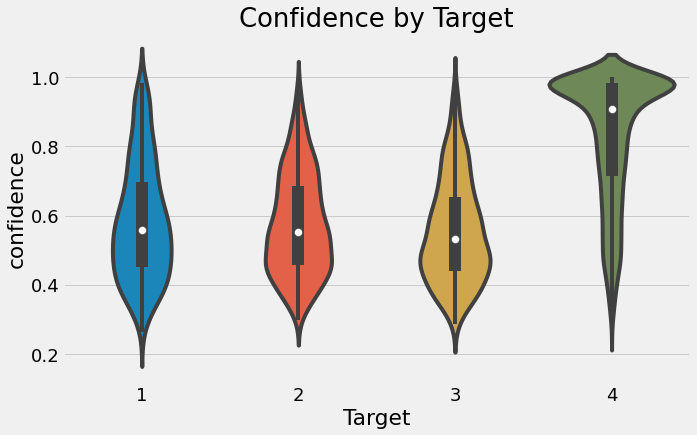

In [236]:
# Average the prediction over fold

predictions = predictions.groupby('idhogar', as_index=False).mean()

# Find the class and associated probability

predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis=1)
predictions['confidence'] = predictions[[1,2,3,4]].max(axis=1)
predictions = predictions.drop(columns=['fold'])

# Plot confidence by each target

plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y='confidence', data=predictions)
plt.title('Confidence by Target')

plt.figure(figsize=(10,6))
sns.violinplot(x='Target', y='confidence', data=predictions)
plt.title('Confidence by Target')


we can return the function instead return actual submission file. This takes the average predictions across the five folds, in effectm combining 5 different models, each one trained on a slightly different subset of data.



In [237]:
submission = submission_base.merge(predictions[['idhogar', 'Target']], on='idhogar', how='left').drop(columns=['idhogar'])
    

In [238]:
submission.to_csv('gbm_baseline.csv')

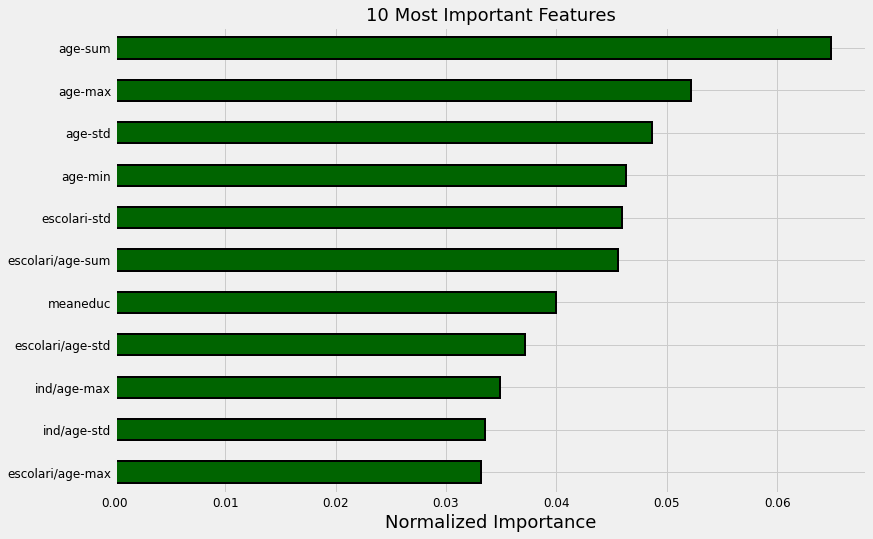

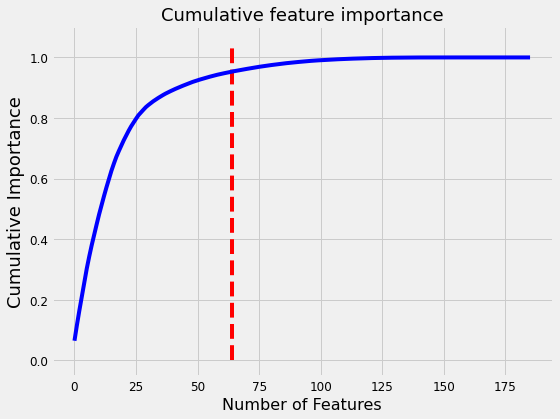

64 features required for 95% of cumulative importance.


In [239]:
_ = plot_feature_importances(gbm_fi, threshold=0.95)

GBM seems to think most impoortant features are those derived from ages. Educaton variables also show in most important features. 

### Try selected features

The next step with lightGBM is to try features selected through recursive feature elimination.

%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids)

In [240]:
%%capture --no-display
submission_1, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=False)

'Fold 1, Validation Score: 0.3651, Estimators Trained: None'

'Fold 2, Validation Score: 0.39925, Estimators Trained: None'

'Fold 3, Validation Score: 0.41676, Estimators Trained: None'

'Fold 4, Validation Score: 0.39744, Estimators Trained: None'

'Fold 5, Validation Score: 0.42073, Estimators Trained: None'

'5 cross validation score: 0.39986 with std: 0.01968.'

In [245]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids, return_preds=False)

'Fold 1, Validation Score: 0.43323, Estimators Trained: None'

'Fold 2, Validation Score: 0.40709, Estimators Trained: None'

'Fold 3, Validation Score: 0.37996, Estimators Trained: None'

'Fold 4, Validation Score: 0.39471, Estimators Trained: None'

'Fold 5, Validation Score: 0.38624, Estimators Trained: None'

'5 cross validation score: 0.40025 with std: 0.01883.'

In [246]:
submission.to_csv('gbm_baseline_sel.csv')

In [247]:
model_results = model_results.append(pd.DataFrame({'model':['GBM', 'GBM-SEL'], 'cv_mean':[valid_scores.mean(), valid_scores_selected.mean()], 'cv_std':[valid_scores.std(), valid_scores_selected.std()]}), sort=True)


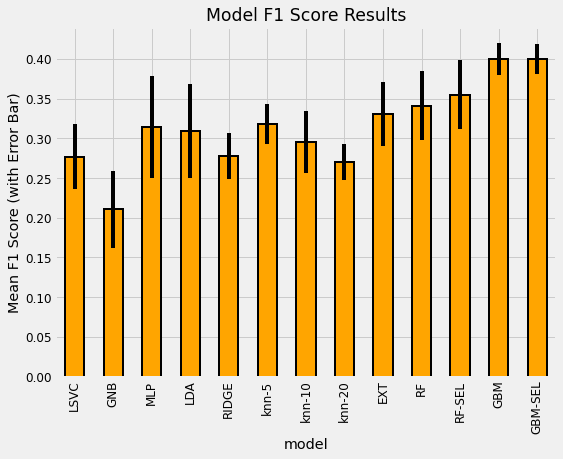

In [248]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6), yerr=list(model_results['cv_std']), edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with Error Bar)')
model_results.reset_index(inplace=True)

Massive advantages of gradient boosting machine is on display here. For a final step let's try using 10 folds with both sets and add them to the plot. 

In [249]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, nfolds=10, return_preds=False)

In [250]:
submission.to_csv('gbm_10fold.csv', index=False)

In [251]:
%%capture
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids, nfolds=10, return_preds=False)

In [252]:
submission.to_csv('gbm_10fold_selected.csv', index=False)

In [253]:
model_results = model_results.append(pd.DataFrame({'model':['GBM_10FOLD', 'GBM_10FOLD_SEL'], 'cv_mean':[valid_scores.mean(), valid_scores_selected.mean()], 'cv_std':[valid_scores.std(), valid_scores_selected.std()]}), sort=True)

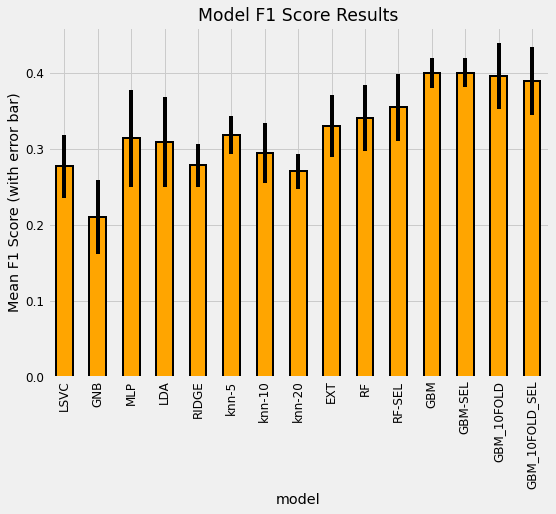

In [254]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6), edgecolor='k', linewidth=2, yerr=list(model_results['cv_std']))
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

The best model seems to be GBM trained with 10 folds on the selected features. this model has not yet been optimized, but we might be able to get a little more performance through optimization.

In [255]:
print(f"There are {gbm_fi_selected[gbm_fi_selected['importance']==0].shape[0]} features with no importance.")

There are 0 features with no importance.


Well that should make us feel better! All of the features we are using have some importance to GBM model. It might be good idea to go back and retry feature selection but with the GBM since that is the model we are using.

The next step to take is model optimization, the proces of getting most from a machine learning model.

## Model optimization

Model optimization is process of extracting best performance from a machine learning model by tuning the hyperparameters through cross validation. This is necessary because best model hyperparameters are different for each dataset.

In this notebook we wont go too far in model tuning, but there are multiple options.
1. Manual
2. Grid Search
3. Random Search
4. Automated Optimization

We'll stick to 4. because it is generally most efficient method and can be easily implemented in a number of libraries, including hyperopt, which uses a modified version of Bayasian Optimization with the Tree Parzen Estimator.

### Model tuning with Hyperopt

Bayesian optimization requires 4 Parts:

1. Objective function: what we want to maximize (or minimize)
2.  Domain Space: region over which to serach
3. Algorith for choosing next hyperparameters
4. Result History: Saves the past result

I have written previously about hyperopt so here we will stick to implementation.

In [256]:
!pip install hyperopt

In [257]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample
import csv
import ast
from timeit import default_timer as timer


### 1. Objective function:

This takes in model hyperparameters and returns associated validation score. Hyperopt needs a score to minimize, so we retuen 1-Macro F1 Score.

In [300]:
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""
    # Keep track of levels
    global ITERATION
    ITERATION += 1
    
    # Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    boosting_type = hyperparameters['boosting_type']['boosting_type']
    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
        
    #Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type
    
    #Whether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
        
    #Make sure integers that are need to be integers are integers
    for parameter in ['max_depth', 'num_leaves', 'subsample_for_bin', 'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter] = int(hyperparameters[parameter])
        
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
        
    # Using stratified k-fold cross validation
    strkfold = StratifiedKFold (n_splits = nfolds, shuffle=True)
    
    # Convert to array for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1))
    
    valid_scores = []
    best_estimators = []
    run_times = []
    
    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced', n_jobs=-1, metric=None, n_estimators=10000)
    
    # Iterate through folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        start = timer()
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = macro_f1_score, eval_set = [(X_train, y_train),(X_valid, y_valid)], eval_names = ['train', 'valid'], verbose=400)
        
        end = timer()
        # Record validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(0 if model.best_iteration_ is None else model.best_iteration_)
        
        run_times.append(end-start)
        
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score
    
    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    # Write to a csv file (a means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()
    
    # Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score:{round(score,4)}.')
        
    return {'loss':loss, 'hyperparameters':hyperparameters, 'iteration':ITERATION, 'time':run_time, 'time_std':run_time_std, 'status':STATUS_OK, 'score':score, 'score_std':score_std}



### 2. Search Space

The domain is entire range of values over which we want to search. The only difficult part is subsample ratio which must be st to 1.0 if the boosting type = "gross". Feel free to play around values here. 

In [301]:
# Define the search space

space = {
    'boosting_type':hp.choice('boosting_type', 
                              [{'boosting_type':'gbdt', 
                                'subsample':hp.uniform('gbdt_subsample', 0.5, 1), 
                                'subsample_freq':hp.quniform('gbdt_subsample_freq', 1, 10, 1)}, 
                               {'boosting_type':'dart', 
                                'subsample':hp.uniform('dart_subsample', 0.5,1),
                                'subsample_freq':hp.quniform('dart_subsample_freq', 1, 10, 1), 
                                'drop_rate':hp.uniform('dart_drop_rate', 0.1,0.5)}, 
                               {'boosting_type':'goss', 
                                'subsample':1.0, 
                                'subsample_freq':0}]), 
    'limit_max_depth':hp.choice('limit_max_depth',[True, False]), 
    'max_depth':hp.quniform('max_depth', 1, 40, 1), 
    'num_leaves':hp.quniform('num_leaves', 3,50,1),
    'learning_rate':hp.loguniform('learning_rate',
                                  np.log(0.025),
                                  np.log(0.25)), 
                                 'subsample_for_bin':hp.quniform('subsamples_for_bin',2000, 100000, 2000), 
                                 'min_child_samples':hp.quniform('min_child_samples' ,5, 80, 5), 
                                'reg_alpha':hp.uniform('reg_alpha',0.0,1.0), 
                                'reg_lambda':hp.uniform('reg_lambda', 0.0, 1.0), 
                                'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1.0)}

In [302]:
sample(space)

{'boosting_type': {'boosting_type': 'goss',
  'subsample': 1.0,
  'subsample_freq': 0},
 'colsample_bytree': 0.9866397074161553,
 'learning_rate': 0.06494406767762761,
 'limit_max_depth': True,
 'max_depth': 15.0,
 'min_child_samples': 15.0,
 'num_leaves': 47.0,
 'reg_alpha': 0.8914861586834377,
 'reg_lambda': 0.5440011978089685,
 'subsample_for_bin': 54000.0}

### 3. Algorithm

The algorithm for choosing next value is the Tree Parzen Estimator which uses Bayes rule for constructing a surrogate model of objective function. Instead of maximizing the objective function, the algirithm maximizes the expected improvement of surrogate model.

In [303]:
algo = tpe.suggest

In [304]:
algo

<function hyperopt.tpe.suggest(new_ids, domain, trials, seed, prior_weight=1.0, n_startup_jobs=20, n_EI_candidates=24, gamma=0.25, verbose=True)>

### 4. Results History

We'll use two different methods for recording results

1. Trials Object: Stores everything returned from the objective function
2. Write to a csv file on every iteration

I like using multiple methods of tracking progress because it means redundancy. One way may fail but hopefully both will not! the csv file can be used to monitor the method while it's running and the Trails object can be saved and then reloaded to resume optimization. 

In [305]:
# Record results

trials = Trials()

# Create a file and open a connection

OUT_FILE = 'optimization.csv'

of_connection = open(OUT_FILE, 'w')

writer = csv.writer(of_connection)

MAX_EVALS = 100

PROGRESS = 10

N_FOLDS = 5

ITERATION = 0

# Write column names

headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']

writer.writerow(headers)

of_connection.close()


In [306]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

#Run Optimization

best = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals = MAX_EVALS)

'Running Optimization for 100 Trials.'

'Iteration: 10, Current Score:0.4279.'

'Iteration: 20, Current Score:0.396.'

'Iteration: 30, Current Score:0.4306.'

'Iteration: 40, Current Score:0.425.'

'Iteration: 50, Current Score:0.433.'

'Iteration: 60, Current Score:0.4313.'

'Iteration: 70, Current Score:0.4307.'

'Iteration: 80, Current Score:0.4346.'

'Iteration: 90, Current Score:0.4294.'

'Iteration: 100, Current Score:0.4417.'

To resume training we can pass in same trials object and increase the max number of iterations. for later use trials can be saved as json



In [307]:
# Save the trials result

import json

with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

## Using optimized model

Once optimization procedure is finished, we can use best results for modelling.


In [308]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending=True).reset_index()
results.head()

index      loss                                    hyperparameters  \
0     84  0.552742  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
1     65  0.553935  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
2     94  0.555805  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
3     66  0.555840  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
4     99  0.558316  {'boosting_type': 'gbdt', 'colsample_bytree': ...   

   iteration   runtime     score       std  
0         85  1.788584  0.447258  0.024389  
1         66  1.447677  0.446065  0.018320  
2         95  1.248357  0.444195  0.021662  
3         67  1.541744  0.444160  0.020701  
4        100  1.618820  0.441684  0.019751

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x1a4b48cc910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

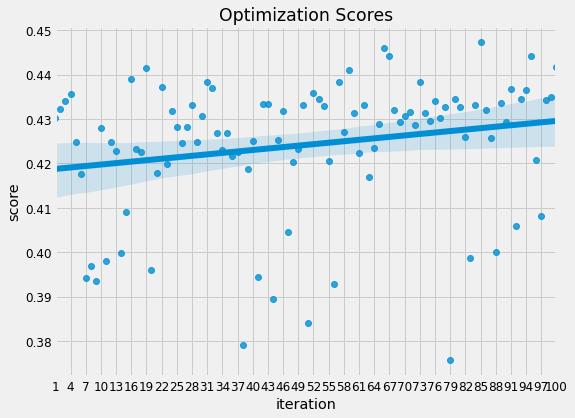

In [309]:
plt.figure(figsize=(8,6))
sns.regplot('iteration', 'score', data=results)
plt.title("Optimization Scores")
plt.xticks(list(range(1, results['iteration'].max()+1, 3)))

In [310]:
best_hyp = ast.literal_eval(results.loc[0,'hyperparameters'])
best_hyp

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7363299127227394,
 'learning_rate': 0.038314314380705934,
 'limit_max_depth': False,
 'max_depth': -1,
 'min_child_samples': 40,
 'num_leaves': 26,
 'reg_alpha': 0.5432545621297583,
 'reg_lambda': 0.3169981069702933,
 'subsample_for_bin': 68000,
 'subsample': 0.6452297901123012,
 'subsample_freq': 9,
 'n_estimators': 108}

In [311]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_selected, train_labels, test_selected, test_ids, nfolds=10, return_preds=False)

In [312]:
model_results = model_results.append(pd.DataFrame({'model':"GBM_OPT_10FOLD_SEL", 'cv_mean': [valid_scores.mean()], 'cv_std':[valid_scores.std()]}), sort=True).sort_values('cv_mean', ascending=False)

In [313]:
model_results.head()

cv_mean    cv_std               model
12  0.400247  0.018833             GBM-SEL
11  0.399857  0.019677                 GBM
13  0.395485  0.043439          GBM_10FOLD
0   0.391746  0.024660  GBM_OPT_10FOLD_SEL
14  0.389254  0.045126      GBM_10FOLD_SEL

In [315]:
submission.to_csv('gbm_opt_10fold_selected.csv', index=False)


At this point, to improve our performance, we can continue with optimization. try more feature engineering, stack or ensemble additional models, or look at more experimental methods such as dimension reduction, oversampling. however scores we are getting is fairly good and I am going to move on to a crucial part of machine learning: investigating the predictions where our model is wrong. While Kaggle is great in presenting realistic datasets, the methods needed to get to the top of leaderboard are not generally used in leaderboard. Past some level of performance, accuracy takes a back seat to interpretibility. People want to know why a model makes the prediction it does, much as they would want a human to be able to explain her decisions. we could work on squeezing some more performance from our model, but right now, our energy is better investigating our model. 

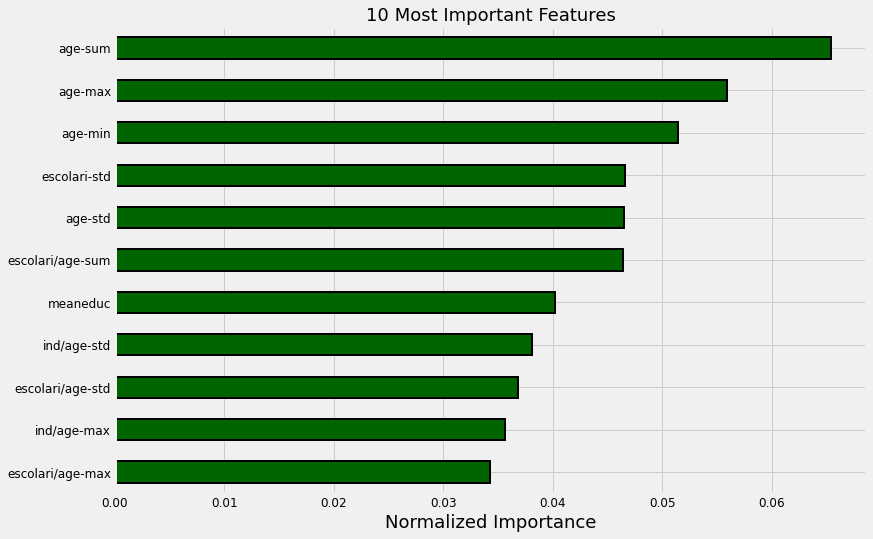

In [316]:
    _ = plot_feature_importances (gbm_fi)

## Investigate Predictions:

As a first attempt at looking into our model, we can visualize the distribution of predicted labels on the test data. We would expect these to show same distribution as training data. Since we are concerned with household predictions, we will look at only the predictions for each house and compare it with that in training data.

The following histograms are normalize meaning that they show the relative frequency instead of absolute counts. This is necessary because the raw counts differ in training and testing data.


Text(0.5, 1.0, 'Predicted Label Distribution')

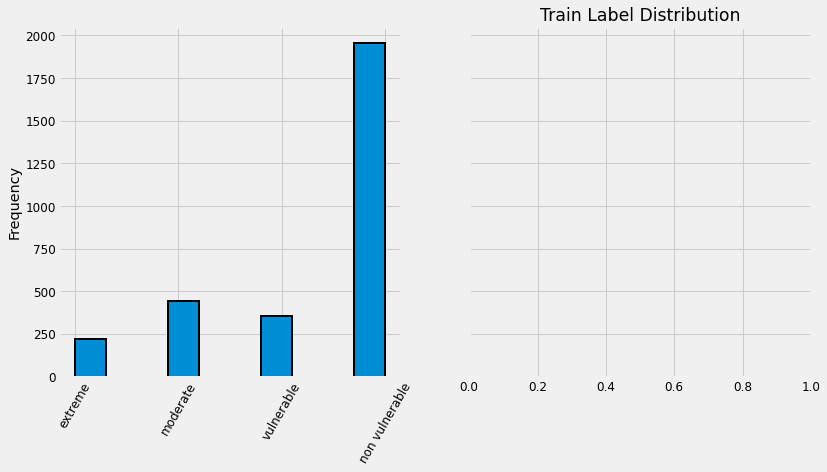

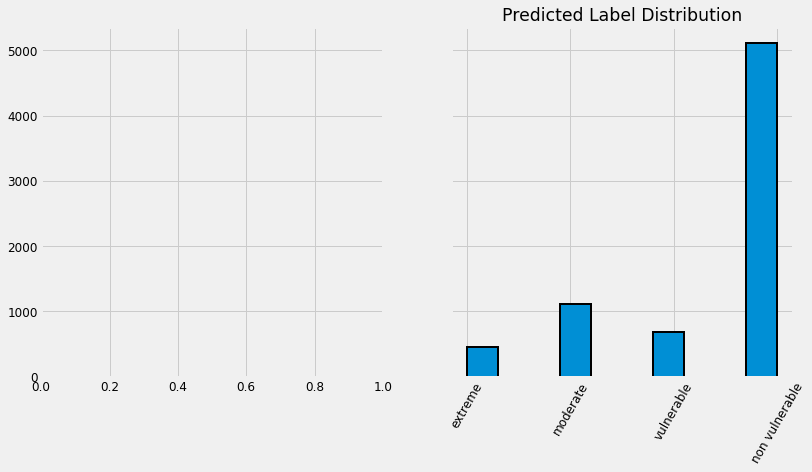

In [324]:
preds = submission_base.merge(submission, on='Id', how='left')
preds = pd.DataFrame(preds.groupby('idhogar')['Target'].mean())

# Plot the training labels distribution

fig, axes = plt.subplots(1,2, sharey=True, figsize=(12,6))
heads['Target'].sort_index().plot.hist( edgecolor=r'k', linewidth=2, ax=axes[0])
axes[0].set_xticks([1,2,3,4])
axes[0].set_xticklabels(poverty_mapping.values(), rotation=60)
# plt.subplots_adjust()
plt.title('Train Label Distribution')

fig, axes = plt.subplots(1,2, sharey=True, figsize=(12,6))
preds['Target'].sort_index().plot.hist( edgecolor='k', linewidth=2, ax=axes[1])
axes[1].set_xticks([1,2,3,4])
axes[1].set_xticklabels(poverty_mapping.values(), rotation=60)
plt.subplots_adjust()
plt.title('Predicted Label Distribution')



In [325]:
heads['Target'].value_counts()

4.0    1954
2.0     442
3.0     355
1.0     222
Name: Target, dtype: int64

In [326]:
preds['Target'].value_counts()

4    5109
2    1117
3     676
1     450
Name: Target, dtype: int64

Predicted distribution looks closer to training distribution although there are some differences. Depending on run of notebook, the results you see may change, but for this edition the 4s are underrepresented in prediction and 3s are overrepresented.

One potential method for dealing with imbalanced classification problem is oversampling the minority class, which is easy to do in python using imbalanced learn library. We wont explore that option here. 

## Validation

For the test predictions, we can only compare the distribution with that found on training data. If we want to compare predictions to actual answers, we will have to split the training data into a separate validation set. we will use 1000 examples for testing and then we can do operations like make the confusion matrix because we have the right answer. 

In [329]:
from sklearn.model_selection import train_test_split

# Split into validation set

X_train, X_valid, y_train, y_valid = train_test_split(train_selected, train_labels, test_size=1000, random_state=10)

# Create model and train

model = lgb.LGBMClassifier(**best_hyp, class_weight='balanced', random_state=10)

model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: limit_max_depth


LGBMClassifier(class_weight='balanced', colsample_bytree=0.7363299127227394,
               learning_rate=0.038314314380705934, limit_max_depth=False,
               min_child_samples=40, n_estimators=108, num_leaves=26,
               random_state=10, reg_alpha=0.5432545621297583,
               reg_lambda=0.3169981069702933, subsample=0.6452297901123012,
               subsample_for_bin=68000, subsample_freq=9)

In [330]:
# Make validation prediction

valid_preds = model.predict_proba(X_valid)

preds_df = pd.DataFrame(valid_preds, columns=[1,2,3,4])

# Convert into predictions

preds_df['prediction'] = preds_df[[1,2,3,4]].idxmax(axis=1)

preds_df['confidence'] = preds_df[[1,2,3,4]].max(axis=1)

preds_df.head()

1         2         3         4  prediction  confidence
0  0.113214  0.033850  0.051489  0.801446           4    0.801446
1  0.008638  0.009474  0.005041  0.976848           4    0.976848
2  0.012985  0.088584  0.503216  0.395214           3    0.503216
3  0.209095  0.435491  0.275646  0.079769           2    0.435491
4  0.029673  0.258948  0.637612  0.073767           3    0.637612

In [331]:
print('F1 Score', round(f1_score(y_valid, preds_df['prediction'], average='macro'),5))

F1 Score 0.42847


Let's use out predictions to plot confusion metrix. This let's us see where model is confused by showing diffrence between predicted snd true values. Thw code for this confusion matrix is adapted from:

In [340]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    
    """
        This prints and plots confusion matrix.
        Normalization can be applied by setting normalize = True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confustion Matrix")
    else:
        print('Confusion matrix, without normalization.')
        
    print(cm)
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title,size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)
    
    fmt = '.2f' if normalize else 'd'
    thres = cm.max() / 2.
    
    # Labeling the plot
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt), fontsize=20, horizontalalignment="center", color="white" if cm[i,j]>thres else "black")
    
    plt.grid(None)
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    
    

In [341]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

Confusion matrix, without normalization.
[[ 25  26  10  19]
 [ 25  53  34  27]
 [  9  31  36  37]
 [ 20  68  79 501]]


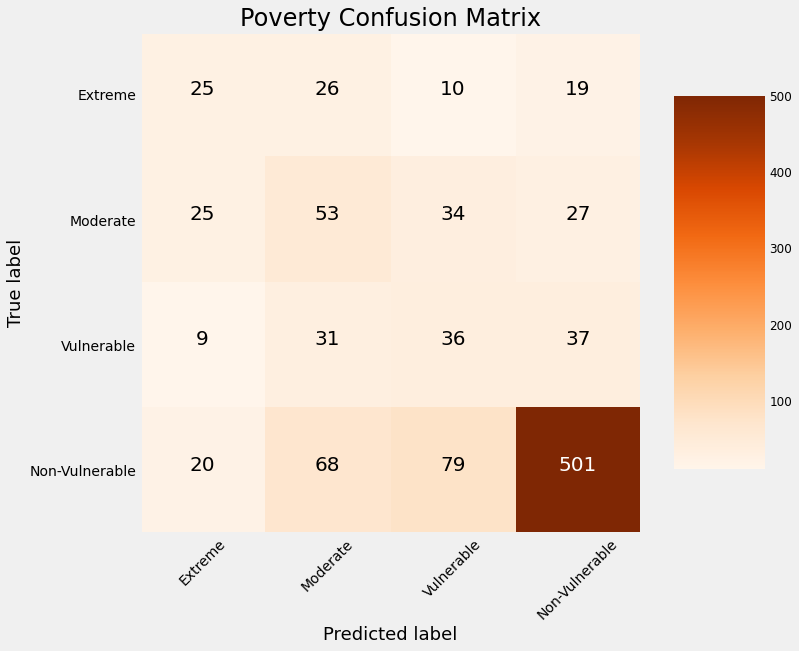

In [342]:
plot_confusion_matrix(cm, classes=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'], title='Poverty Confusion Matrix')

Here is how to read confusion matrix: any of the values on the diagonal, the model got correct because the predicted value matches the true value. Anything not on diagonal our model got wrong which we can assess by looking at the predicted values vs the actual value. 

Normalized Confustion Matrix
[[0.3125     0.325      0.125      0.2375    ]
 [0.17985612 0.38129496 0.24460432 0.1942446 ]
 [0.07964602 0.27433628 0.31858407 0.32743363]
 [0.02994012 0.10179641 0.11826347 0.75      ]]


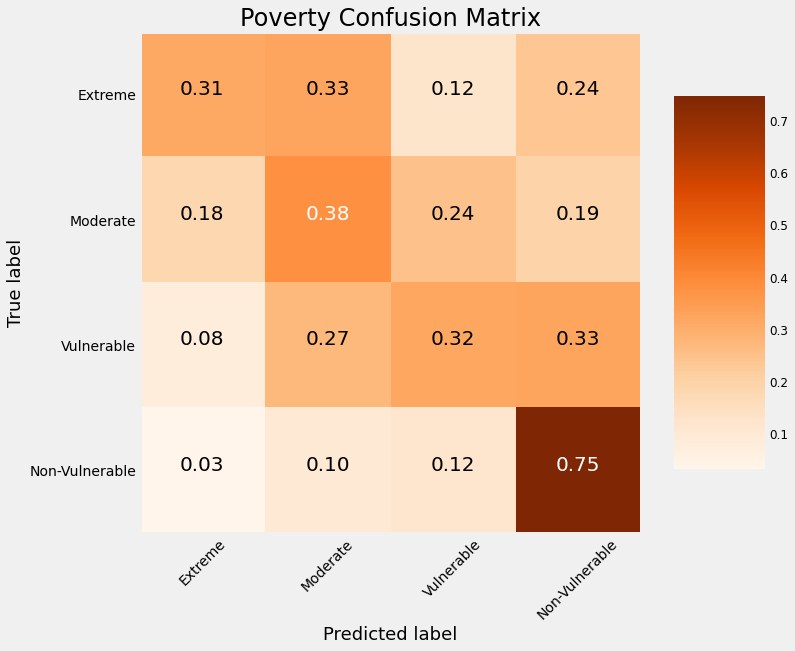

In [343]:
plot_confusion_matrix(cm, normalize=True, classes=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'], title='Poverty Confusion Matrix')

Now we can see our model really does not do that well for classes other than Non Vulnerable. It only correctly identifies  %15 of vulnerable households, classifying more of them as non vulnerable or moderate. overall these results show that imbalanced claasification problems with relatively few observations are very difficult. There are some methods we can take to try and counter this such as oversampling or training multiple models on different set of data, but at the end of day the most eefective way would be to gather more data.

## Dimension Reduction

As a final exploration of problem, we can apply a few different dimension reductions methods to selected dataset. These methods can be used for visualization or as a preprocessing method of machine learning. we'll look at four different methvely new ods:

1. PCA: Principal component analysis - Finds the dimension of greatest variations in data
2. ICA: Independent Components Annalysis - Attempts to separate a multivarate signal into independent signals
3. TSNE: T-Distributed Stochasting Neighbour Embedding - Maps high dimensional data to low dimension manifold attempting to maintain local structure in data. It is a non linear technique and generally used for data visualization
4. UMAP: Uniform manifold approximation and projection: A relatively new technique that also maps data to a low dimensional manifolt but tries to preserve more global structure than TSNE

All four of these methods are relatively simple to implement inpython. We will map the selected features down to 3 dimension for visualization and then also use PCA, ICA, and UMAP as features for modelling (TSNE has no transform method and hence can not be used for preprocessing!).

In [345]:
!pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=a8b4b0fb19226c9dc7de56a348785cf491d06028afa27004547221035959dcb9
  Stored in directory: c:\users\bkumarsingh\appdata\local\pip\cache\wheels\d4\13\91\2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [346]:
from umap import UMAP
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
n_components = 3

umap = UMAP(n_components=n_components)
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
tsne = TSNE(n_components=n_components)



ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\bkumarsingh\Anaconda3\lib\site-packages\umap\__init__.py)

In [ ]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method, name in zip([umap, pca, ica, tsne], [['umap', 'pca', 'ica', 'tsne']]):
    # TSNE has no transform method
    if name == 'tsne':
        start = timer()
        reduction = method.fit_tranform(train_selected)
        end = timer()
    else:
        start = timer()
        reduction = method.fit_tranform(train_selected)
        end = timer()
        
        test_reduction = method.transform(test_selected)
        
        # Add components to test data
        test_df['%s_c1' % name] = test_reduction[:,0]
        test_df['%s_c2' % name] = test_reduction[:,1]
        test_df['%s_c3' % name] = test_reduction[:,2]
        
    # Add components to training data for visualization and modelling

    train_df['%s_c1' % name] = test_reduction[:,0]
    train_df['%s_c2' % name] = test_reduction[:,1]
    train_df['%s_c3' % name] = test_reduction[:,2]    
         
    print(f'Method: {name} {round(end-start,2)} seconds elapsed.')
    
    

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create a N-bin discrete colormap from the specified input map"""
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0,1,N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = discrete_cmap(4, base_cmap=plt.cm.RdYlBu)

train_df['label'] = train_labels


In [ ]:
# Plot each method

for method, name in zip([umap, pca, ica, tsne], [['umap', 'pca', 'ica', 'tsne']]):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    p=ax.scatter(train_df['%s_c1' %  name], train_df['%s_c2' % name], train_df['%s_c3' % name], c=train_df['label'].astype(int), cmap=cmap)
    plt.title(f'{name.capitalize()}', size=22)
    fig.colorbar(p, aspect=4, ticks=[1,2,3,4])

It's difficult to see clustering in these plot. which indicates that separating poverty level is very hard given the available data. Machine learning models are as effective as the data given to them and sometimes there is no enough data provided. 

As a final step, we can train a model using the added reductions from PCA, ICA, UMAP. we will use the same LightGBM hyperparameters from the optimization.

In [ ]:
train_df, test_df = train_df.align(test_df,axis=1, join='inner')
train_df, test_df

In [ ]:
%%capture

submission, gbm_fi, valid_scores = model_gbm(train_df, train_labels, test_df, test_ids, nfolds=10, hyp=best_hyp)


In [ ]:
submission.to_csv('gbm_opt_10fold_dr.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame('model':['GBM_OPT_10FOLD_DR'], 'cv_mean':[valid_scores.mean()], 'cv_std':valid_scores.std()), sort=True)

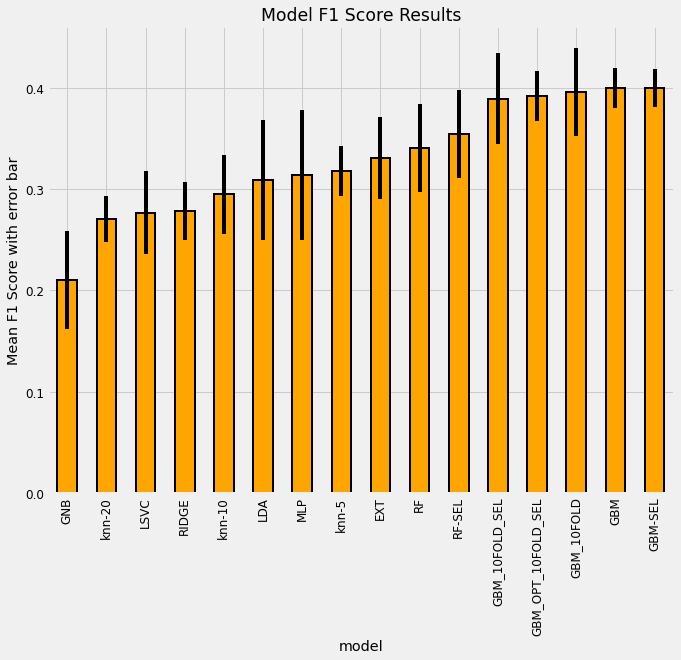

In [347]:
model_results = model_results.sort_values('cv_mean')
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(10,8), edgecolor='k', linewidth=2, yerr=list(model_results['cv_std']))
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score with error bar')
model_results.reset_index(inplace=True)


The dimensionality reduction components slightly hurt the overall score of model. It's possile that they only lead to overfitting on training data. 

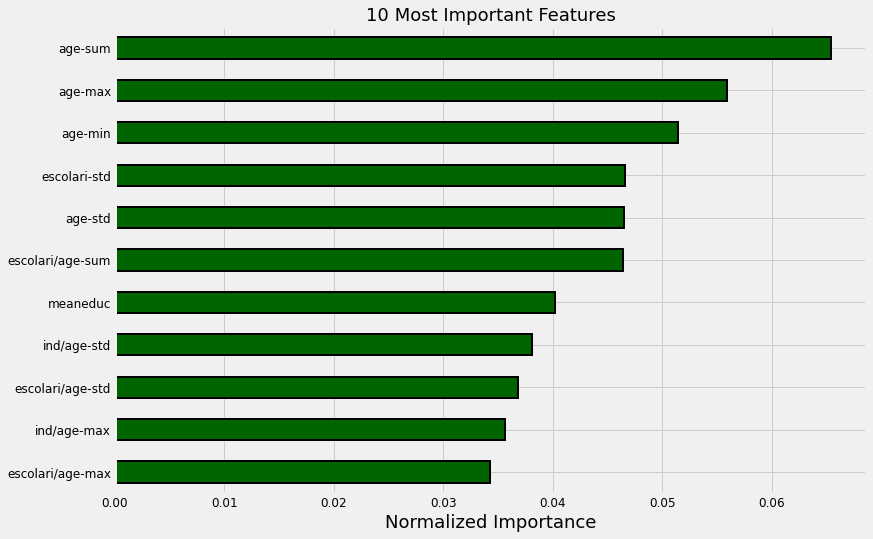

In [348]:
_ = plot_feature_importances(gbm_fi)

Given the high importance of the dimension reduction components, it looks like they may be causing overfitting. The dimension reduction methods are not using any of the label information, which means they might not neccesarily have any useful information for the model.

## Visualize single decision tree

As a final step, we can look at single decision tree in the random forest. First we will limit the max depth for visibility, and then we will expand the tree all the way.

The first step is simply to train a random forest and extract one tree (we could also train a single decision tree).

In [349]:
model = RandomForestClassifier(max_depth=3, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=6832964)

We take trained tree and export it as .dot file using export_graphviz.

In [351]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names=train_selected.columns, class_names=['extreme', 'moderate', 'vulnerable', 'non-vulnerable'], rounded=True, proportion=False, precision=2, filled=True)

Next we use system command to convert dot file to png

In [358]:
!"C:\Program Files\Graphviz\bin\dot.exe" -Tpng tree_limited.dot -o tree_limited.png

Finally, we can view the tree in ajupyter notebook using Ipython.display (this is the nicest way to render image. it also happens to be quite simple.

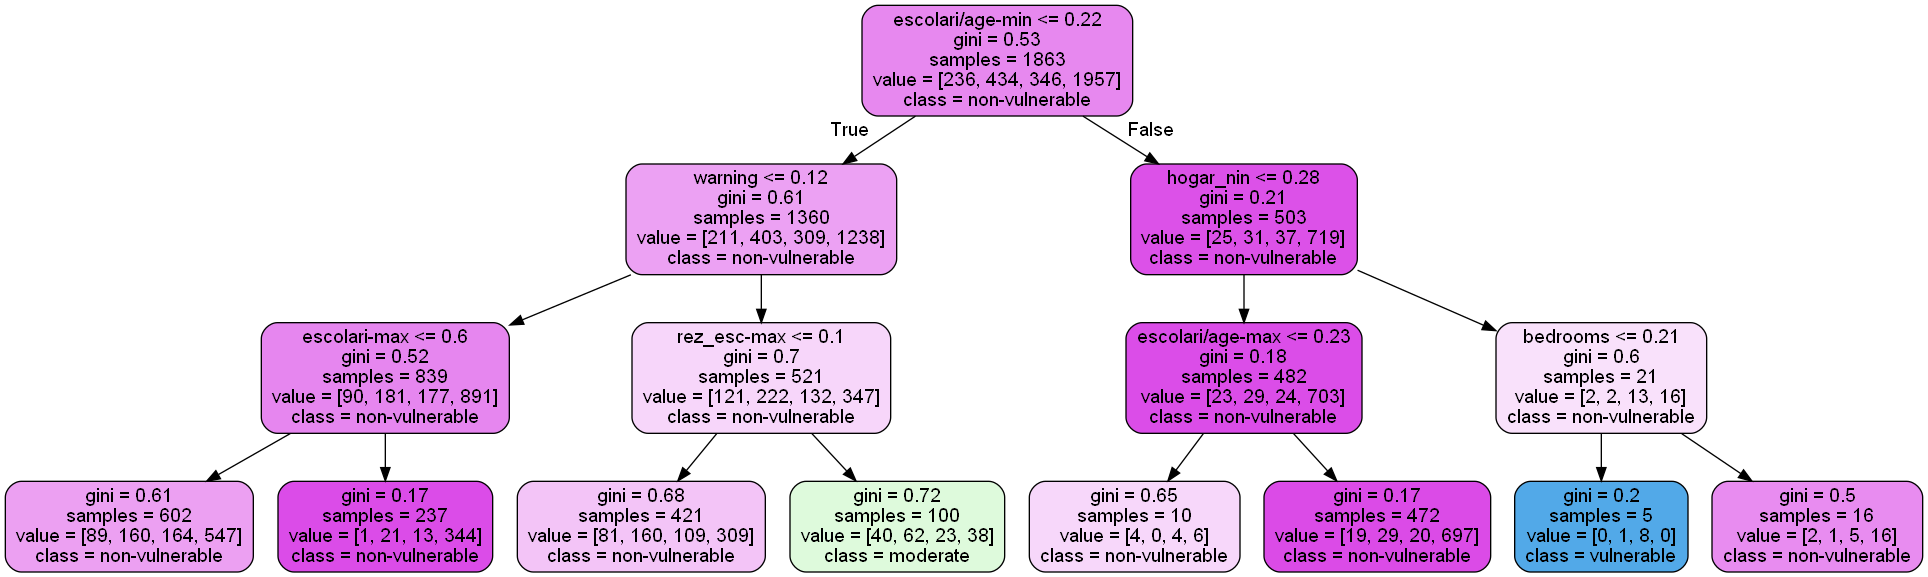

In [359]:
# Disply in jupyter notebook

from IPython.display import Image
Image(filename='tree_limited.png')

### Visualize Tree with no max depth

When we don't limit the depth, the tree grow extremely deep! It's therefore useful to do some limitation (unless you just like look of large tree).



In [360]:
# No maximum depth

model = RandomForestClassifier(max_depth=None, n_estimators=10)

model.fit(train_selected, train_labels)

estimator_nonlimited = model.estimators_[5]

export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names=train_selected.columns, class_names=['extreme', 'moderate', 'vulnerable', 'non-vulnerable'], rounded=True, proportion=False, precision=2)

In [361]:
!"C:\Program Files\Graphviz\bin\dot.exe" -Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.120644 to fit


In [362]:
Image('tree_nonlimited.png')

# Conclusions

In this notebook we went through step by step implementation of an entire data science solution to a real world problem. Machine learning is really just a series of steps, each simple by themselves, with overall result often extremely poweful.

Our path was as follows:

1. Understand the problem

2. Exploratory data analysis
    . Deal with data issues
    . Fill in missing values
    
3. Feature Engineering
    . Aggregate data
    . Feature selection in stages
    
4. Model Selection
    . Try many different models to see which one is more promising
    . Feature selection can also come into play
  
5. Model Optimization
    . Choose best performing model and tune
    
6. Implementing best model

7. Investigate predictions
    . Identify model shortcomings
    
8. Try new techniques
    . Experiment and learn!
    
    
As stated in introduction, these steps do have a general order, there is nothing preventing from us from repeating them based on subsequent work. for exmple, we often go to feature engineering / selection if we are not satisfied with model performance. After investigating predictions, we might return to modelling stagge and re-think our approach. 

It's also important to note that machine learning is largely imperical: there are few established best practices so you need  to constantly experiment to determine what works best. That's why we tried two new methods and even if they don't pay off for this project, they may be useful in future. As a data scientist we need to constantly learning to do our work more effectively with the best tool possible.

Our final model does well compared with others in the competition, but overall is not extremely accurate.  There might be ways to improve perfoance, but overall no enough data for a exception performance metrics. That's an important point to remember : at the end of day sucess or failure of a data science project will rest on quality and quantity of available data. We have solved problem of classifying household poverty in PortoRica as well as we can do with available tools , and the next process would be if we are in charge would be tofigure out what additional data we can collect to yield a better solution. 

## Next steps

Although we tried many possible approaches , there are still some methods that we did not implement but might prove useful:

. Further hyperparameter tuning: we did not spend much time optimizing model, and there are other packages for optimization that we could try. 

. Further feature selection: we probably do not need toretain all features to attain same performance

. Oversampling minority class / undersampling majority class: an advance technique that might improve performance 

. Ensembling or stacking multiple models: We could train models on different sections of the data and then combine their predictions to try and better separate the classes. it might also be worthwhile to include models other than GBM
